In [1]:
#=======================================
## DNN - Concrete
#=======================================

# Need compile Create_DNN_model.

#----------------------------------------
# Set random seed.

seed = 543
from numpy import random
random.seed(seed)
from tensorflow import set_random_seed
set_random_seed(seed)

#----------------------------------------
# Import classes and functions.

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt


C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#----------------------------------------
# Load the dataset.

dataset = np.loadtxt("CONCRETE-Training-Data.txt")

print(dataset.shape)

index = [0, 3, 7]

X = dataset[:, index]
Y = dataset[:, 8]


(1030, 9)


In [3]:
#----------------------------------------
# Standardize the input and output data.

X_sample_mean = np.mean(X, axis = 0)
print(np.round(X_sample_mean, 4))

X_sample_std = np.std(X, axis = 0, ddof = 1)
print(np.round(X_sample_std, 4))

Y_sample_mean = np.mean(Y, axis = 0)
print(np.round(Y_sample_mean, 4))

Y_sample_std = np.std(Y, axis = 0, ddof = 1)
print(np.round(Y_sample_std, 4))

standardize = lambda x:(x - np.mean(x, axis = 0))/np.std(x, axis = 0, ddof = 1)

X_train = standardize(X)
Y_train = standardize(Y)

print(np.round(np.mean(X_train, axis = 0), 4))
print(np.round(np.std(X_train, axis = 0, ddof = 1), 4))

print(np.round(np.mean(Y_train, axis = 0), 4))
print(np.round(np.std(Y_train, axis = 0, ddof = 1), 4))


[281.1679 181.5673  45.6621]
[104.5064  21.3542  63.1699]
35.818
16.7057
[-0. -0.  0.]
[1. 1. 1.]
0.0
1.0


In [4]:
#----------------------------------------
# Define 10-fold cross validation test index sets.

fold_num = 10

L = len(X_train)

quotient = L // fold_num
remainder = L % fold_num

fold_length = np.array([quotient]*fold_num)
if remainder > 0:
    fold_length[0:remainder] = fold_length[0:remainder] + 1

index_begin = np.zeros(fold_num, dtype = int)
index_begin[0] = 0

for j in range(1, fold_num):
    index_begin[j] = index_begin[j-1] + fold_length[j-1]

index = np.random.choice(np.arange(L), size = L, replace = False)


In [5]:
## Create DNN model

def create_DNN_model(nodes, drop, kernel, act):
  model = Sequential()
  # Build input_layer & first_hidden_layer
  if drop[0] > 0:
    model.add(Dropout(rate = drop[0], input_shape = (nodes[0], )))
    model.add(Dense(units = nodes[1], kernel_initializer = kernel[0], activation =act[0]))
    if drop[1] > 0:
      model.add(Dropout(rate = drop[1]))
  else:
    model.add(Dense(units = nodes[1], input_dim = nodes[0], kernel_initializer = kernel[0], activation =act[0]))
    if drop[1] > 0:
      model.add(Dropout(rate = drop[1]))
  # Build other_hidden_layer
  for i in range(2, len(nodes) - 1):
    model.add(Dense(units = nodes[i], kernel_initializer = kernel[i-1], activation =act[i-1]))
    if drop[i] > 0:
      model.add(Dropout(rate = drop[i]))
  # Build output_layer
  model.add(Dense(units = nodes[len(nodes)-1], kernel_initializer = kernel[len(kernel) - 1], activation = act[len(act) - 1]))
  return model


In [6]:
#----------------------------------------
# Create the DNN_model

input_dim = X.shape[1]

nodes = [input_dim, 9, 9, 8, 1]
	# first component: number of input nodes
	# last component: number of output nodes

drop = [0, 0.2, 0.2, 0.2]
	# len(dropout_rate) = len(node) - 1
	# first component: dropout rate for the input layer
	# other components: dropout rates for the hidden layers
	# Dropout rate is not used in the output layer.

#dropout_rate = [0]*(len(node)-1)
#dropout_rate = [0] + [0.2]*(len(node)-2)

kernel = ['uniform', 'uniform', 'uniform', 'uniform']

act = ['relu', 'relu', 'relu', 'linear']


In [7]:
#----------------------------------------
# 10-fold cross validation

cv_mse = []
cv_mae = []

for k in range(fold_num):
    # Create the DNN_model.
    model = create_DNN_model(nodes, drop, kernel, act)
    # Compile the model.
    model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mae'])
    # Select index sets.
    seq_index = range(index_begin[k], (index_begin[k] + fold_length[k]))
    test_index = index[seq_index]
    train_index = np.delete(index, seq_index)
    # Fit the model.
    history = model.fit(X_train[train_index], Y_train[train_index], epochs = 1000, validation_split = 0.2, batch_size = 20, verbose = 1)
    # Evaluate the model.
    scores = model.evaluate(X_train[test_index], Y_train[test_index], verbose = 1)
    print("%s: %.4f" % (model.metrics_names[0], scores[0]))
    print("%s: %.4f" % (model.metrics_names[1], scores[1]))
    cv_mse.append(scores[0])
    cv_mae.append(scores[1])


Train on 741 samples, validate on 186 samples
Epoch 1/1000
741/741 [==============================] - 1s 1ms/step - loss: 0.9750 - mean_absolute_error: 0.7899 - val_loss: 1.1723 - val_mean_absolute_error: 0.9082
Epoch 2/1000
741/741 [==============================] - 0s 177us/step - loss: 0.9736 - mean_absolute_error: 0.7896 - val_loss: 1.1703 - val_mean_absolute_error: 0.9078
Epoch 3/1000
741/741 [==============================] - 0s 161us/step - loss: 0.9540 - mean_absolute_error: 0.7820 - val_loss: 1.1297 - val_mean_absolute_error: 0.8924
Epoch 4/1000
741/741 [==============================] - 0s 160us/step - loss: 0.8591 - mean_absolute_error: 0.7453 - val_loss: 0.9801 - val_mean_absolute_error: 0.8351
Epoch 5/1000
741/741 [==============================] - 0s 160us/step - loss: 0.7403 - mean_absolute_error: 0.6942 - val_loss: 0.9086 - val_mean_absolute_error: 0.8066
Epoch 6/1000
741/741 [==============================] - 0s 149us/step - loss: 0.7129 - mean_absolute_error: 0.6804 -

741/741 [==============================] - 0s 178us/step - loss: 0.5240 - mean_absolute_error: 0.5723 - val_loss: 0.4831 - val_mean_absolute_error: 0.5844
Epoch 50/1000
741/741 [==============================] - 0s 145us/step - loss: 0.4948 - mean_absolute_error: 0.5609 - val_loss: 0.4828 - val_mean_absolute_error: 0.5856
Epoch 51/1000
741/741 [==============================] - 0s 150us/step - loss: 0.4930 - mean_absolute_error: 0.5545 - val_loss: 0.4807 - val_mean_absolute_error: 0.5830
Epoch 52/1000
741/741 [==============================] - 0s 199us/step - loss: 0.4924 - mean_absolute_error: 0.5555 - val_loss: 0.4742 - val_mean_absolute_error: 0.5792
Epoch 53/1000
741/741 [==============================] - 0s 229us/step - loss: 0.4649 - mean_absolute_error: 0.5437 - val_loss: 0.4801 - val_mean_absolute_error: 0.5799
Epoch 54/1000
741/741 [==============================] - 0s 158us/step - loss: 0.4691 - mean_absolute_error: 0.5484 - val_loss: 0.4607 - val_mean_absolute_error: 0.5709


741/741 [==============================] - 0s 202us/step - loss: 0.4589 - mean_absolute_error: 0.5382 - val_loss: 0.4437 - val_mean_absolute_error: 0.5561
Epoch 98/1000
741/741 [==============================] - 0s 191us/step - loss: 0.4622 - mean_absolute_error: 0.5397 - val_loss: 0.4404 - val_mean_absolute_error: 0.5543
Epoch 99/1000
741/741 [==============================] - 0s 203us/step - loss: 0.4791 - mean_absolute_error: 0.5443 - val_loss: 0.4305 - val_mean_absolute_error: 0.5499
Epoch 100/1000
741/741 [==============================] - 0s 175us/step - loss: 0.4607 - mean_absolute_error: 0.5357 - val_loss: 0.4439 - val_mean_absolute_error: 0.5550
Epoch 101/1000
741/741 [==============================] - 0s 196us/step - loss: 0.4631 - mean_absolute_error: 0.5406 - val_loss: 0.4320 - val_mean_absolute_error: 0.5504
Epoch 102/1000
741/741 [==============================] - 0s 219us/step - loss: 0.4772 - mean_absolute_error: 0.5419 - val_loss: 0.4444 - val_mean_absolute_error: 0.55

741/741 [==============================] - 0s 186us/step - loss: 0.4348 - mean_absolute_error: 0.5220 - val_loss: 0.4217 - val_mean_absolute_error: 0.5414
Epoch 146/1000
741/741 [==============================] - 0s 223us/step - loss: 0.4697 - mean_absolute_error: 0.5420 - val_loss: 0.4236 - val_mean_absolute_error: 0.5428
Epoch 147/1000
741/741 [==============================] - 0s 223us/step - loss: 0.4797 - mean_absolute_error: 0.5420 - val_loss: 0.4429 - val_mean_absolute_error: 0.5511
Epoch 148/1000
741/741 [==============================] - 0s 191us/step - loss: 0.5058 - mean_absolute_error: 0.5525 - val_loss: 0.4617 - val_mean_absolute_error: 0.5626
Epoch 149/1000
741/741 [==============================] - 0s 217us/step - loss: 0.4440 - mean_absolute_error: 0.5311 - val_loss: 0.4420 - val_mean_absolute_error: 0.5533
Epoch 150/1000
741/741 [==============================] - 0s 192us/step - loss: 0.4420 - mean_absolute_error: 0.5232 - val_loss: 0.4232 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 215us/step - loss: 0.4851 - mean_absolute_error: 0.5520 - val_loss: 0.4254 - val_mean_absolute_error: 0.5390
Epoch 194/1000
741/741 [==============================] - 0s 198us/step - loss: 0.4383 - mean_absolute_error: 0.5220 - val_loss: 0.4192 - val_mean_absolute_error: 0.5362
Epoch 195/1000
741/741 [==============================] - 0s 179us/step - loss: 0.4629 - mean_absolute_error: 0.5367 - val_loss: 0.4240 - val_mean_absolute_error: 0.5392
Epoch 196/1000
741/741 [==============================] - 0s 198us/step - loss: 0.4659 - mean_absolute_error: 0.5363 - val_loss: 0.4205 - val_mean_absolute_error: 0.5374
Epoch 197/1000
741/741 [==============================] - 0s 165us/step - loss: 0.4447 - mean_absolute_error: 0.5325 - val_loss: 0.4110 - val_mean_absolute_error: 0.5320
Epoch 198/1000
741/741 [==============================] - 0s 186us/step - loss: 0.4524 - mean_absolute_error: 0.5315 - val_loss: 0.4194 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 178us/step - loss: 0.4416 - mean_absolute_error: 0.5316 - val_loss: 0.3993 - val_mean_absolute_error: 0.5209
Epoch 242/1000
741/741 [==============================] - 0s 192us/step - loss: 0.4425 - mean_absolute_error: 0.5357 - val_loss: 0.4107 - val_mean_absolute_error: 0.5278
Epoch 243/1000
741/741 [==============================] - 0s 182us/step - loss: 0.4650 - mean_absolute_error: 0.5363 - val_loss: 0.4027 - val_mean_absolute_error: 0.5243
Epoch 244/1000
741/741 [==============================] - 0s 228us/step - loss: 0.4897 - mean_absolute_error: 0.5506 - val_loss: 0.4220 - val_mean_absolute_error: 0.5359
Epoch 245/1000
741/741 [==============================] - 0s 187us/step - loss: 0.4520 - mean_absolute_error: 0.5257 - val_loss: 0.4063 - val_mean_absolute_error: 0.5287
Epoch 246/1000
741/741 [==============================] - 0s 189us/step - loss: 0.4465 - mean_absolute_error: 0.5242 - val_loss: 0.4017 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 216us/step - loss: 0.4476 - mean_absolute_error: 0.5207 - val_loss: 0.4203 - val_mean_absolute_error: 0.5339
Epoch 290/1000
741/741 [==============================] - 0s 187us/step - loss: 0.4526 - mean_absolute_error: 0.5343 - val_loss: 0.4054 - val_mean_absolute_error: 0.5257
Epoch 291/1000
741/741 [==============================] - 0s 209us/step - loss: 0.4482 - mean_absolute_error: 0.5325 - val_loss: 0.4133 - val_mean_absolute_error: 0.5305
Epoch 292/1000
741/741 [==============================] - 0s 227us/step - loss: 0.4285 - mean_absolute_error: 0.5167 - val_loss: 0.4071 - val_mean_absolute_error: 0.5266
Epoch 293/1000
741/741 [==============================] - 0s 188us/step - loss: 0.4813 - mean_absolute_error: 0.5398 - val_loss: 0.4154 - val_mean_absolute_error: 0.5315
Epoch 294/1000
741/741 [==============================] - 0s 226us/step - loss: 0.4733 - mean_absolute_error: 0.5372 - val_loss: 0.4158 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 217us/step - loss: 0.4487 - mean_absolute_error: 0.5216 - val_loss: 0.4060 - val_mean_absolute_error: 0.5242
Epoch 338/1000
741/741 [==============================] - 0s 170us/step - loss: 0.4769 - mean_absolute_error: 0.5433 - val_loss: 0.4164 - val_mean_absolute_error: 0.5309
Epoch 339/1000
741/741 [==============================] - 0s 182us/step - loss: 0.4484 - mean_absolute_error: 0.5288 - val_loss: 0.4183 - val_mean_absolute_error: 0.5309
Epoch 340/1000
741/741 [==============================] - 0s 229us/step - loss: 0.4424 - mean_absolute_error: 0.5217 - val_loss: 0.4063 - val_mean_absolute_error: 0.5246
Epoch 341/1000
741/741 [==============================] - 0s 195us/step - loss: 0.4404 - mean_absolute_error: 0.5249 - val_loss: 0.4249 - val_mean_absolute_error: 0.5354
Epoch 342/1000
741/741 [==============================] - 0s 223us/step - loss: 0.4327 - mean_absolute_error: 0.5147 - val_loss: 0.4102 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 172us/step - loss: 0.4211 - mean_absolute_error: 0.5123 - val_loss: 0.4028 - val_mean_absolute_error: 0.5222
Epoch 386/1000
741/741 [==============================] - 0s 212us/step - loss: 0.4125 - mean_absolute_error: 0.5095 - val_loss: 0.4009 - val_mean_absolute_error: 0.5216
Epoch 387/1000
741/741 [==============================] - 0s 193us/step - loss: 0.4290 - mean_absolute_error: 0.5171 - val_loss: 0.4216 - val_mean_absolute_error: 0.5346
Epoch 388/1000
741/741 [==============================] - 0s 192us/step - loss: 0.4560 - mean_absolute_error: 0.5287 - val_loss: 0.4186 - val_mean_absolute_error: 0.5365
Epoch 389/1000
741/741 [==============================] - 0s 214us/step - loss: 0.4346 - mean_absolute_error: 0.5188 - val_loss: 0.4079 - val_mean_absolute_error: 0.5276
Epoch 390/1000
741/741 [==============================] - 0s 246us/step - loss: 0.4602 - mean_absolute_error: 0.5328 - val_loss: 0.4016 - val_mean_absolute_error: 0.

Epoch 433/1000
741/741 [==============================] - 0s 181us/step - loss: 0.4464 - mean_absolute_error: 0.5190 - val_loss: 0.4084 - val_mean_absolute_error: 0.5257
Epoch 434/1000
741/741 [==============================] - 0s 184us/step - loss: 0.4317 - mean_absolute_error: 0.5109 - val_loss: 0.4120 - val_mean_absolute_error: 0.5284
Epoch 435/1000
741/741 [==============================] - 0s 188us/step - loss: 0.4471 - mean_absolute_error: 0.5200 - val_loss: 0.4056 - val_mean_absolute_error: 0.5254
Epoch 436/1000
741/741 [==============================] - 0s 223us/step - loss: 0.4259 - mean_absolute_error: 0.5103 - val_loss: 0.3977 - val_mean_absolute_error: 0.5201
Epoch 437/1000
741/741 [==============================] - 0s 193us/step - loss: 0.4872 - mean_absolute_error: 0.5497 - val_loss: 0.4127 - val_mean_absolute_error: 0.5290
Epoch 438/1000
741/741 [==============================] - 0s 204us/step - loss: 0.4338 - mean_absolute_error: 0.5308 - val_loss: 0.4102 - val_mean_abs

741/741 [==============================] - 0s 228us/step - loss: 0.4466 - mean_absolute_error: 0.5195 - val_loss: 0.4042 - val_mean_absolute_error: 0.5230
Epoch 482/1000
741/741 [==============================] - 0s 190us/step - loss: 0.4246 - mean_absolute_error: 0.5220 - val_loss: 0.4092 - val_mean_absolute_error: 0.5268
Epoch 483/1000
741/741 [==============================] - 0s 186us/step - loss: 0.4247 - mean_absolute_error: 0.5141 - val_loss: 0.3985 - val_mean_absolute_error: 0.5209
Epoch 484/1000
741/741 [==============================] - 0s 201us/step - loss: 0.4269 - mean_absolute_error: 0.5082 - val_loss: 0.4001 - val_mean_absolute_error: 0.5219
Epoch 485/1000
741/741 [==============================] - 0s 204us/step - loss: 0.4597 - mean_absolute_error: 0.5330 - val_loss: 0.3974 - val_mean_absolute_error: 0.5191
Epoch 486/1000
741/741 [==============================] - 0s 183us/step - loss: 0.4336 - mean_absolute_error: 0.5162 - val_loss: 0.4102 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 217us/step - loss: 0.4341 - mean_absolute_error: 0.5165 - val_loss: 0.3993 - val_mean_absolute_error: 0.5224
Epoch 530/1000
741/741 [==============================] - 0s 216us/step - loss: 0.4760 - mean_absolute_error: 0.5387 - val_loss: 0.4020 - val_mean_absolute_error: 0.5222
Epoch 531/1000
741/741 [==============================] - 0s 212us/step - loss: 0.4546 - mean_absolute_error: 0.5228 - val_loss: 0.4028 - val_mean_absolute_error: 0.5232
Epoch 532/1000
741/741 [==============================] - 0s 215us/step - loss: 0.4285 - mean_absolute_error: 0.5127 - val_loss: 0.4019 - val_mean_absolute_error: 0.5223
Epoch 533/1000
741/741 [==============================] - 0s 198us/step - loss: 0.4603 - mean_absolute_error: 0.5306 - val_loss: 0.4106 - val_mean_absolute_error: 0.5264
Epoch 534/1000
741/741 [==============================] - 0s 226us/step - loss: 0.4827 - mean_absolute_error: 0.5483 - val_loss: 0.3955 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 187us/step - loss: 0.4599 - mean_absolute_error: 0.5230 - val_loss: 0.4091 - val_mean_absolute_error: 0.5265
Epoch 578/1000
741/741 [==============================] - 0s 195us/step - loss: 0.4488 - mean_absolute_error: 0.5224 - val_loss: 0.4062 - val_mean_absolute_error: 0.5262
Epoch 579/1000
741/741 [==============================] - 0s 197us/step - loss: 0.4213 - mean_absolute_error: 0.5134 - val_loss: 0.4091 - val_mean_absolute_error: 0.5272
Epoch 580/1000
741/741 [==============================] - 0s 208us/step - loss: 0.4459 - mean_absolute_error: 0.5207 - val_loss: 0.4167 - val_mean_absolute_error: 0.5326
Epoch 581/1000
741/741 [==============================] - 0s 199us/step - loss: 0.4259 - mean_absolute_error: 0.5145 - val_loss: 0.4060 - val_mean_absolute_error: 0.5252
Epoch 582/1000
741/741 [==============================] - 0s 199us/step - loss: 0.4580 - mean_absolute_error: 0.5286 - val_loss: 0.4066 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 176us/step - loss: 0.4409 - mean_absolute_error: 0.5184 - val_loss: 0.3977 - val_mean_absolute_error: 0.5183
Epoch 626/1000
741/741 [==============================] - 0s 203us/step - loss: 0.4334 - mean_absolute_error: 0.5209 - val_loss: 0.4079 - val_mean_absolute_error: 0.5252
Epoch 627/1000
741/741 [==============================] - 0s 195us/step - loss: 0.4394 - mean_absolute_error: 0.5155 - val_loss: 0.4022 - val_mean_absolute_error: 0.5228
Epoch 628/1000
741/741 [==============================] - 0s 197us/step - loss: 0.4722 - mean_absolute_error: 0.5409 - val_loss: 0.4136 - val_mean_absolute_error: 0.5319
Epoch 629/1000
741/741 [==============================] - 0s 217us/step - loss: 0.4472 - mean_absolute_error: 0.5287 - val_loss: 0.4019 - val_mean_absolute_error: 0.5222
Epoch 630/1000
741/741 [==============================] - 0s 215us/step - loss: 0.4601 - mean_absolute_error: 0.5258 - val_loss: 0.4232 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 196us/step - loss: 0.4600 - mean_absolute_error: 0.5411 - val_loss: 0.4070 - val_mean_absolute_error: 0.5263
Epoch 674/1000
741/741 [==============================] - 0s 215us/step - loss: 0.4574 - mean_absolute_error: 0.5286 - val_loss: 0.4004 - val_mean_absolute_error: 0.5216
Epoch 675/1000
741/741 [==============================] - 0s 204us/step - loss: 0.4363 - mean_absolute_error: 0.5184 - val_loss: 0.4006 - val_mean_absolute_error: 0.5207
Epoch 676/1000
741/741 [==============================] - 0s 192us/step - loss: 0.4391 - mean_absolute_error: 0.5186 - val_loss: 0.3988 - val_mean_absolute_error: 0.5192
Epoch 677/1000
741/741 [==============================] - 0s 227us/step - loss: 0.4250 - mean_absolute_error: 0.5198 - val_loss: 0.4121 - val_mean_absolute_error: 0.5285
Epoch 678/1000
741/741 [==============================] - 0s 201us/step - loss: 0.4565 - mean_absolute_error: 0.5205 - val_loss: 0.4278 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 209us/step - loss: 0.4311 - mean_absolute_error: 0.5180 - val_loss: 0.4013 - val_mean_absolute_error: 0.5233
Epoch 722/1000
741/741 [==============================] - 0s 188us/step - loss: 0.4335 - mean_absolute_error: 0.5148 - val_loss: 0.3927 - val_mean_absolute_error: 0.5171
Epoch 723/1000
741/741 [==============================] - 0s 171us/step - loss: 0.4328 - mean_absolute_error: 0.5229 - val_loss: 0.3968 - val_mean_absolute_error: 0.5184
Epoch 724/1000
741/741 [==============================] - 0s 168us/step - loss: 0.4437 - mean_absolute_error: 0.5210 - val_loss: 0.4135 - val_mean_absolute_error: 0.5294
Epoch 725/1000
741/741 [==============================] - 0s 198us/step - loss: 0.4278 - mean_absolute_error: 0.5160 - val_loss: 0.3993 - val_mean_absolute_error: 0.5227
Epoch 726/1000
741/741 [==============================] - 0s 212us/step - loss: 0.4618 - mean_absolute_error: 0.5282 - val_loss: 0.4124 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 199us/step - loss: 0.4737 - mean_absolute_error: 0.5394 - val_loss: 0.4079 - val_mean_absolute_error: 0.5282
Epoch 770/1000
741/741 [==============================] - 0s 191us/step - loss: 0.4723 - mean_absolute_error: 0.5280 - val_loss: 0.4123 - val_mean_absolute_error: 0.5295
Epoch 771/1000
741/741 [==============================] - 0s 198us/step - loss: 0.4225 - mean_absolute_error: 0.5120 - val_loss: 0.3967 - val_mean_absolute_error: 0.5203
Epoch 772/1000
741/741 [==============================] - 0s 176us/step - loss: 0.4224 - mean_absolute_error: 0.5153 - val_loss: 0.4084 - val_mean_absolute_error: 0.5267
Epoch 773/1000
741/741 [==============================] - 0s 218us/step - loss: 0.4407 - mean_absolute_error: 0.5252 - val_loss: 0.4071 - val_mean_absolute_error: 0.5257
Epoch 774/1000
741/741 [==============================] - 0s 236us/step - loss: 0.4563 - mean_absolute_error: 0.5300 - val_loss: 0.4007 - val_mean_absolute_error: 0.

Epoch 817/1000
741/741 [==============================] - 0s 195us/step - loss: 0.4420 - mean_absolute_error: 0.5152 - val_loss: 0.4228 - val_mean_absolute_error: 0.5351
Epoch 818/1000
741/741 [==============================] - 0s 220us/step - loss: 0.4659 - mean_absolute_error: 0.5326 - val_loss: 0.4345 - val_mean_absolute_error: 0.5438
Epoch 819/1000
741/741 [==============================] - 0s 203us/step - loss: 0.4490 - mean_absolute_error: 0.5278 - val_loss: 0.4113 - val_mean_absolute_error: 0.5305
Epoch 820/1000
741/741 [==============================] - 0s 205us/step - loss: 0.4933 - mean_absolute_error: 0.5396 - val_loss: 0.4082 - val_mean_absolute_error: 0.5292
Epoch 821/1000
741/741 [==============================] - 0s 241us/step - loss: 0.4465 - mean_absolute_error: 0.5330 - val_loss: 0.4029 - val_mean_absolute_error: 0.5254
Epoch 822/1000
741/741 [==============================] - 0s 211us/step - loss: 0.4547 - mean_absolute_error: 0.5245 - val_loss: 0.4084 - val_mean_abs

Epoch 865/1000
741/741 [==============================] - 0s 194us/step - loss: 0.4411 - mean_absolute_error: 0.5188 - val_loss: 0.4115 - val_mean_absolute_error: 0.5276
Epoch 866/1000
741/741 [==============================] - 0s 206us/step - loss: 0.4627 - mean_absolute_error: 0.5240 - val_loss: 0.4180 - val_mean_absolute_error: 0.5329
Epoch 867/1000
741/741 [==============================] - 0s 171us/step - loss: 0.4209 - mean_absolute_error: 0.5147 - val_loss: 0.3990 - val_mean_absolute_error: 0.5220
Epoch 868/1000
741/741 [==============================] - 0s 200us/step - loss: 0.4508 - mean_absolute_error: 0.5185 - val_loss: 0.3948 - val_mean_absolute_error: 0.5192
Epoch 869/1000
741/741 [==============================] - 0s 196us/step - loss: 0.4701 - mean_absolute_error: 0.5383 - val_loss: 0.4057 - val_mean_absolute_error: 0.5237
Epoch 870/1000
741/741 [==============================] - 0s 229us/step - loss: 0.4770 - mean_absolute_error: 0.5334 - val_loss: 0.4080 - val_mean_abs

741/741 [==============================] - 0s 207us/step - loss: 0.4483 - mean_absolute_error: 0.5267 - val_loss: 0.3997 - val_mean_absolute_error: 0.5213
Epoch 914/1000
741/741 [==============================] - 0s 217us/step - loss: 0.4305 - mean_absolute_error: 0.5154 - val_loss: 0.4009 - val_mean_absolute_error: 0.5228
Epoch 915/1000
741/741 [==============================] - 0s 189us/step - loss: 0.4523 - mean_absolute_error: 0.5311 - val_loss: 0.4020 - val_mean_absolute_error: 0.5250
Epoch 916/1000
741/741 [==============================] - 0s 171us/step - loss: 0.4562 - mean_absolute_error: 0.5461 - val_loss: 0.4022 - val_mean_absolute_error: 0.5242
Epoch 917/1000
741/741 [==============================] - 0s 249us/step - loss: 0.4213 - mean_absolute_error: 0.5130 - val_loss: 0.3976 - val_mean_absolute_error: 0.5208
Epoch 918/1000
741/741 [==============================] - 0s 177us/step - loss: 0.4578 - mean_absolute_error: 0.5302 - val_loss: 0.4229 - val_mean_absolute_error: 0.

Epoch 961/1000
741/741 [==============================] - 0s 282us/step - loss: 0.4571 - mean_absolute_error: 0.5306 - val_loss: 0.3989 - val_mean_absolute_error: 0.5204
Epoch 962/1000
741/741 [==============================] - 0s 281us/step - loss: 0.4695 - mean_absolute_error: 0.5309 - val_loss: 0.4047 - val_mean_absolute_error: 0.5244
Epoch 963/1000
741/741 [==============================] - 0s 266us/step - loss: 0.4383 - mean_absolute_error: 0.5223 - val_loss: 0.4010 - val_mean_absolute_error: 0.5214
Epoch 964/1000
741/741 [==============================] - 0s 267us/step - loss: 0.4684 - mean_absolute_error: 0.5375 - val_loss: 0.4118 - val_mean_absolute_error: 0.5282
Epoch 965/1000
741/741 [==============================] - 0s 287us/step - loss: 0.4535 - mean_absolute_error: 0.5277 - val_loss: 0.3965 - val_mean_absolute_error: 0.5202
Epoch 966/1000
741/741 [==============================] - 0s 228us/step - loss: 0.4620 - mean_absolute_error: 0.5389 - val_loss: 0.3998 - val_mean_abs

741/741 [==============================] - 0s 289us/step - loss: 0.5055 - mean_absolute_error: 0.5706 - val_loss: 0.5349 - val_mean_absolute_error: 0.6069
Epoch 9/1000
741/741 [==============================] - 0s 293us/step - loss: 0.4870 - mean_absolute_error: 0.5539 - val_loss: 0.5257 - val_mean_absolute_error: 0.5997
Epoch 10/1000
741/741 [==============================] - 0s 265us/step - loss: 0.4803 - mean_absolute_error: 0.5514 - val_loss: 0.5069 - val_mean_absolute_error: 0.5868
Epoch 11/1000
741/741 [==============================] - 0s 267us/step - loss: 0.4862 - mean_absolute_error: 0.5447 - val_loss: 0.5106 - val_mean_absolute_error: 0.5912
Epoch 12/1000
741/741 [==============================] - 0s 274us/step - loss: 0.4965 - mean_absolute_error: 0.5484 - val_loss: 0.5006 - val_mean_absolute_error: 0.5816
Epoch 13/1000
741/741 [==============================] - 0s 259us/step - loss: 0.4870 - mean_absolute_error: 0.5557 - val_loss: 0.4945 - val_mean_absolute_error: 0.5817
E

Epoch 56/1000
741/741 [==============================] - 0s 261us/step - loss: 0.3799 - mean_absolute_error: 0.4902 - val_loss: 0.3736 - val_mean_absolute_error: 0.4970
Epoch 57/1000
741/741 [==============================] - 0s 295us/step - loss: 0.3734 - mean_absolute_error: 0.4807 - val_loss: 0.3734 - val_mean_absolute_error: 0.4964
Epoch 58/1000
741/741 [==============================] - 0s 287us/step - loss: 0.3455 - mean_absolute_error: 0.4678 - val_loss: 0.3643 - val_mean_absolute_error: 0.4930
Epoch 59/1000
741/741 [==============================] - 0s 287us/step - loss: 0.4095 - mean_absolute_error: 0.4954 - val_loss: 0.3720 - val_mean_absolute_error: 0.4962
Epoch 60/1000
741/741 [==============================] - 0s 288us/step - loss: 0.3572 - mean_absolute_error: 0.4712 - val_loss: 0.3712 - val_mean_absolute_error: 0.4968
Epoch 61/1000
741/741 [==============================] - 0s 244us/step - loss: 0.3887 - mean_absolute_error: 0.4945 - val_loss: 0.3674 - val_mean_absolute_

741/741 [==============================] - 0s 269us/step - loss: 0.3673 - mean_absolute_error: 0.4775 - val_loss: 0.3364 - val_mean_absolute_error: 0.4637
Epoch 105/1000
741/741 [==============================] - 0s 306us/step - loss: 0.3681 - mean_absolute_error: 0.4794 - val_loss: 0.3488 - val_mean_absolute_error: 0.4711
Epoch 106/1000
741/741 [==============================] - 0s 275us/step - loss: 0.3688 - mean_absolute_error: 0.4692 - val_loss: 0.3570 - val_mean_absolute_error: 0.4836
Epoch 107/1000
741/741 [==============================] - 0s 274us/step - loss: 0.3313 - mean_absolute_error: 0.4574 - val_loss: 0.3479 - val_mean_absolute_error: 0.4714
Epoch 108/1000
741/741 [==============================] - 0s 287us/step - loss: 0.3647 - mean_absolute_error: 0.4703 - val_loss: 0.3566 - val_mean_absolute_error: 0.4821
Epoch 109/1000
741/741 [==============================] - 0s 238us/step - loss: 0.3520 - mean_absolute_error: 0.4714 - val_loss: 0.3417 - val_mean_absolute_error: 0.

Epoch 152/1000
741/741 [==============================] - 0s 263us/step - loss: 0.3445 - mean_absolute_error: 0.4609 - val_loss: 0.3515 - val_mean_absolute_error: 0.4760
Epoch 153/1000
741/741 [==============================] - 0s 299us/step - loss: 0.3303 - mean_absolute_error: 0.4566 - val_loss: 0.3455 - val_mean_absolute_error: 0.4721
Epoch 154/1000
741/741 [==============================] - 0s 277us/step - loss: 0.3851 - mean_absolute_error: 0.4848 - val_loss: 0.3505 - val_mean_absolute_error: 0.4755
Epoch 155/1000
741/741 [==============================] - 0s 272us/step - loss: 0.3333 - mean_absolute_error: 0.4518 - val_loss: 0.3459 - val_mean_absolute_error: 0.4727
Epoch 156/1000
741/741 [==============================] - 0s 272us/step - loss: 0.3410 - mean_absolute_error: 0.4619 - val_loss: 0.3417 - val_mean_absolute_error: 0.4693
Epoch 157/1000
741/741 [==============================] - 0s 262us/step - loss: 0.3563 - mean_absolute_error: 0.4708 - val_loss: 0.3486 - val_mean_abs

741/741 [==============================] - 0s 294us/step - loss: 0.3475 - mean_absolute_error: 0.4656 - val_loss: 0.3393 - val_mean_absolute_error: 0.4674
Epoch 201/1000
741/741 [==============================] - 0s 285us/step - loss: 0.3074 - mean_absolute_error: 0.4392 - val_loss: 0.3390 - val_mean_absolute_error: 0.4648
Epoch 202/1000
741/741 [==============================] - 0s 306us/step - loss: 0.3375 - mean_absolute_error: 0.4628 - val_loss: 0.3425 - val_mean_absolute_error: 0.4684
Epoch 203/1000
741/741 [==============================] - 0s 286us/step - loss: 0.3407 - mean_absolute_error: 0.4538 - val_loss: 0.3411 - val_mean_absolute_error: 0.4652
Epoch 204/1000
741/741 [==============================] - 0s 262us/step - loss: 0.3475 - mean_absolute_error: 0.4680 - val_loss: 0.3535 - val_mean_absolute_error: 0.4791
Epoch 205/1000
741/741 [==============================] - 0s 298us/step - loss: 0.3277 - mean_absolute_error: 0.4483 - val_loss: 0.3438 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 247us/step - loss: 0.3481 - mean_absolute_error: 0.4691 - val_loss: 0.3503 - val_mean_absolute_error: 0.4761
Epoch 249/1000
741/741 [==============================] - 0s 319us/step - loss: 0.3586 - mean_absolute_error: 0.4739 - val_loss: 0.3551 - val_mean_absolute_error: 0.4758
Epoch 250/1000
741/741 [==============================] - 0s 282us/step - loss: 0.3536 - mean_absolute_error: 0.4682 - val_loss: 0.3562 - val_mean_absolute_error: 0.4792
Epoch 251/1000
741/741 [==============================] - 0s 307us/step - loss: 0.3435 - mean_absolute_error: 0.4602 - val_loss: 0.3499 - val_mean_absolute_error: 0.4774
Epoch 252/1000
741/741 [==============================] - 0s 286us/step - loss: 0.3351 - mean_absolute_error: 0.4496 - val_loss: 0.3530 - val_mean_absolute_error: 0.4765
Epoch 253/1000
741/741 [==============================] - 0s 292us/step - loss: 0.3432 - mean_absolute_error: 0.4608 - val_loss: 0.3530 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 264us/step - loss: 0.3283 - mean_absolute_error: 0.4507 - val_loss: 0.3410 - val_mean_absolute_error: 0.4683
Epoch 297/1000
741/741 [==============================] - 0s 273us/step - loss: 0.3511 - mean_absolute_error: 0.4671 - val_loss: 0.3425 - val_mean_absolute_error: 0.4694
Epoch 298/1000
741/741 [==============================] - 0s 254us/step - loss: 0.3403 - mean_absolute_error: 0.4483 - val_loss: 0.3463 - val_mean_absolute_error: 0.4701
Epoch 299/1000
741/741 [==============================] - 0s 234us/step - loss: 0.3366 - mean_absolute_error: 0.4512 - val_loss: 0.3460 - val_mean_absolute_error: 0.4692
Epoch 300/1000
741/741 [==============================] - 0s 223us/step - loss: 0.3384 - mean_absolute_error: 0.4542 - val_loss: 0.3521 - val_mean_absolute_error: 0.4738
Epoch 301/1000
741/741 [==============================] - 0s 234us/step - loss: 0.3280 - mean_absolute_error: 0.4515 - val_loss: 0.3479 - val_mean_absolute_error: 0.

Epoch 344/1000
741/741 [==============================] - 0s 299us/step - loss: 0.3449 - mean_absolute_error: 0.4628 - val_loss: 0.3461 - val_mean_absolute_error: 0.4725
Epoch 345/1000
741/741 [==============================] - 0s 260us/step - loss: 0.3316 - mean_absolute_error: 0.4595 - val_loss: 0.3439 - val_mean_absolute_error: 0.4705
Epoch 346/1000
741/741 [==============================] - 0s 265us/step - loss: 0.3337 - mean_absolute_error: 0.4571 - val_loss: 0.3476 - val_mean_absolute_error: 0.4707
Epoch 347/1000
741/741 [==============================] - 0s 279us/step - loss: 0.3238 - mean_absolute_error: 0.4493 - val_loss: 0.3556 - val_mean_absolute_error: 0.4820
Epoch 348/1000
741/741 [==============================] - 0s 273us/step - loss: 0.3205 - mean_absolute_error: 0.4501 - val_loss: 0.3476 - val_mean_absolute_error: 0.4731
Epoch 349/1000
741/741 [==============================] - 0s 249us/step - loss: 0.3282 - mean_absolute_error: 0.4448 - val_loss: 0.3447 - val_mean_abs

Epoch 392/1000
741/741 [==============================] - 0s 269us/step - loss: 0.3593 - mean_absolute_error: 0.4712 - val_loss: 0.3614 - val_mean_absolute_error: 0.4850
Epoch 393/1000
741/741 [==============================] - 0s 256us/step - loss: 0.3491 - mean_absolute_error: 0.4657 - val_loss: 0.3564 - val_mean_absolute_error: 0.4800
Epoch 394/1000
741/741 [==============================] - 0s 269us/step - loss: 0.3325 - mean_absolute_error: 0.4596 - val_loss: 0.3482 - val_mean_absolute_error: 0.4684
Epoch 395/1000
741/741 [==============================] - 0s 291us/step - loss: 0.3226 - mean_absolute_error: 0.4441 - val_loss: 0.3483 - val_mean_absolute_error: 0.4746
Epoch 396/1000
741/741 [==============================] - 0s 258us/step - loss: 0.3508 - mean_absolute_error: 0.4682 - val_loss: 0.3450 - val_mean_absolute_error: 0.4718
Epoch 397/1000
741/741 [==============================] - 0s 263us/step - loss: 0.3410 - mean_absolute_error: 0.4608 - val_loss: 0.3469 - val_mean_abs

Epoch 440/1000
741/741 [==============================] - 0s 277us/step - loss: 0.3329 - mean_absolute_error: 0.4582 - val_loss: 0.3480 - val_mean_absolute_error: 0.4752
Epoch 441/1000
741/741 [==============================] - 0s 253us/step - loss: 0.3245 - mean_absolute_error: 0.4441 - val_loss: 0.3450 - val_mean_absolute_error: 0.4727
Epoch 442/1000
741/741 [==============================] - 0s 271us/step - loss: 0.3410 - mean_absolute_error: 0.4565 - val_loss: 0.3471 - val_mean_absolute_error: 0.4727
Epoch 443/1000
741/741 [==============================] - ETA: 0s - loss: 0.3549 - mean_absolute_error: 0.467 - 0s 264us/step - loss: 0.3521 - mean_absolute_error: 0.4660 - val_loss: 0.3525 - val_mean_absolute_error: 0.4731
Epoch 444/1000
741/741 [==============================] - 0s 288us/step - loss: 0.3373 - mean_absolute_error: 0.4613 - val_loss: 0.3408 - val_mean_absolute_error: 0.4669
Epoch 445/1000
741/741 [==============================] - 0s 262us/step - loss: 0.3319 - mean_ab

741/741 [==============================] - 0s 271us/step - loss: 0.3245 - mean_absolute_error: 0.4492 - val_loss: 0.3374 - val_mean_absolute_error: 0.4608
Epoch 488/1000
741/741 [==============================] - 0s 259us/step - loss: 0.3369 - mean_absolute_error: 0.4500 - val_loss: 0.3391 - val_mean_absolute_error: 0.4666
Epoch 489/1000
741/741 [==============================] - 0s 281us/step - loss: 0.3320 - mean_absolute_error: 0.4542 - val_loss: 0.3419 - val_mean_absolute_error: 0.4660
Epoch 490/1000
741/741 [==============================] - 0s 245us/step - loss: 0.3308 - mean_absolute_error: 0.4547 - val_loss: 0.3384 - val_mean_absolute_error: 0.4648
Epoch 491/1000
741/741 [==============================] - 0s 232us/step - loss: 0.3402 - mean_absolute_error: 0.4541 - val_loss: 0.3466 - val_mean_absolute_error: 0.4721
Epoch 492/1000
741/741 [==============================] - 0s 300us/step - loss: 0.3305 - mean_absolute_error: 0.4454 - val_loss: 0.3441 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 251us/step - loss: 0.3541 - mean_absolute_error: 0.4659 - val_loss: 0.3388 - val_mean_absolute_error: 0.4648
Epoch 536/1000
741/741 [==============================] - 0s 266us/step - loss: 0.3498 - mean_absolute_error: 0.4583 - val_loss: 0.3457 - val_mean_absolute_error: 0.4741
Epoch 537/1000
741/741 [==============================] - 0s 279us/step - loss: 0.3333 - mean_absolute_error: 0.4508 - val_loss: 0.3453 - val_mean_absolute_error: 0.4695
Epoch 538/1000
741/741 [==============================] - 0s 248us/step - loss: 0.3333 - mean_absolute_error: 0.4589 - val_loss: 0.3467 - val_mean_absolute_error: 0.4713
Epoch 539/1000
741/741 [==============================] - 0s 247us/step - loss: 0.3442 - mean_absolute_error: 0.4533 - val_loss: 0.3488 - val_mean_absolute_error: 0.4726
Epoch 540/1000
741/741 [==============================] - 0s 262us/step - loss: 0.3307 - mean_absolute_error: 0.4432 - val_loss: 0.3488 - val_mean_absolute_error: 0.

Epoch 583/1000
741/741 [==============================] - 0s 292us/step - loss: 0.3231 - mean_absolute_error: 0.4425 - val_loss: 0.3413 - val_mean_absolute_error: 0.4707
Epoch 584/1000
741/741 [==============================] - 0s 244us/step - loss: 0.3518 - mean_absolute_error: 0.4583 - val_loss: 0.3494 - val_mean_absolute_error: 0.4764
Epoch 585/1000
741/741 [==============================] - 0s 246us/step - loss: 0.3001 - mean_absolute_error: 0.4309 - val_loss: 0.3459 - val_mean_absolute_error: 0.4702
Epoch 586/1000
741/741 [==============================] - 0s 284us/step - loss: 0.3340 - mean_absolute_error: 0.4562 - val_loss: 0.3419 - val_mean_absolute_error: 0.4676
Epoch 587/1000
741/741 [==============================] - 0s 261us/step - loss: 0.3297 - mean_absolute_error: 0.4481 - val_loss: 0.3417 - val_mean_absolute_error: 0.4739
Epoch 588/1000
741/741 [==============================] - 0s 256us/step - loss: 0.3372 - mean_absolute_error: 0.4583 - val_loss: 0.3419 - val_mean_abs

741/741 [==============================] - 0s 151us/step - loss: 0.3437 - mean_absolute_error: 0.4623 - val_loss: 0.3408 - val_mean_absolute_error: 0.4675
Epoch 632/1000
741/741 [==============================] - 0s 146us/step - loss: 0.3448 - mean_absolute_error: 0.4672 - val_loss: 0.3475 - val_mean_absolute_error: 0.4703
Epoch 633/1000
741/741 [==============================] - 0s 154us/step - loss: 0.3304 - mean_absolute_error: 0.4488 - val_loss: 0.3475 - val_mean_absolute_error: 0.4744
Epoch 634/1000
741/741 [==============================] - 0s 148us/step - loss: 0.3268 - mean_absolute_error: 0.4466 - val_loss: 0.3451 - val_mean_absolute_error: 0.4732
Epoch 635/1000
741/741 [==============================] - 0s 146us/step - loss: 0.3333 - mean_absolute_error: 0.4491 - val_loss: 0.3416 - val_mean_absolute_error: 0.4672
Epoch 636/1000
741/741 [==============================] - 0s 155us/step - loss: 0.3363 - mean_absolute_error: 0.4540 - val_loss: 0.3423 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 151us/step - loss: 0.3270 - mean_absolute_error: 0.4471 - val_loss: 0.3465 - val_mean_absolute_error: 0.4747
Epoch 680/1000
741/741 [==============================] - 0s 158us/step - loss: 0.3343 - mean_absolute_error: 0.4540 - val_loss: 0.3415 - val_mean_absolute_error: 0.4707
Epoch 681/1000
741/741 [==============================] - 0s 148us/step - loss: 0.3407 - mean_absolute_error: 0.4641 - val_loss: 0.3395 - val_mean_absolute_error: 0.4686
Epoch 682/1000
741/741 [==============================] - 0s 155us/step - loss: 0.3237 - mean_absolute_error: 0.4509 - val_loss: 0.3478 - val_mean_absolute_error: 0.4756
Epoch 683/1000
741/741 [==============================] - 0s 151us/step - loss: 0.3448 - mean_absolute_error: 0.4603 - val_loss: 0.3475 - val_mean_absolute_error: 0.4785
Epoch 684/1000
741/741 [==============================] - 0s 181us/step - loss: 0.3506 - mean_absolute_error: 0.4689 - val_loss: 0.3396 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 149us/step - loss: 0.3553 - mean_absolute_error: 0.4669 - val_loss: 0.3382 - val_mean_absolute_error: 0.4666
Epoch 728/1000
741/741 [==============================] - 0s 152us/step - loss: 0.3340 - mean_absolute_error: 0.4554 - val_loss: 0.3360 - val_mean_absolute_error: 0.4623
Epoch 729/1000
741/741 [==============================] - 0s 149us/step - loss: 0.3467 - mean_absolute_error: 0.4557 - val_loss: 0.3496 - val_mean_absolute_error: 0.4744
Epoch 730/1000
741/741 [==============================] - 0s 147us/step - loss: 0.3253 - mean_absolute_error: 0.4461 - val_loss: 0.3465 - val_mean_absolute_error: 0.4740
Epoch 731/1000
741/741 [==============================] - 0s 149us/step - loss: 0.3437 - mean_absolute_error: 0.4636 - val_loss: 0.3516 - val_mean_absolute_error: 0.4804
Epoch 732/1000
741/741 [==============================] - 0s 155us/step - loss: 0.3325 - mean_absolute_error: 0.4549 - val_loss: 0.3434 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 260us/step - loss: 0.3211 - mean_absolute_error: 0.4501 - val_loss: 0.3425 - val_mean_absolute_error: 0.4694
Epoch 776/1000
741/741 [==============================] - 0s 262us/step - loss: 0.3410 - mean_absolute_error: 0.4616 - val_loss: 0.3442 - val_mean_absolute_error: 0.4678
Epoch 777/1000
741/741 [==============================] - 0s 254us/step - loss: 0.3340 - mean_absolute_error: 0.4525 - val_loss: 0.3462 - val_mean_absolute_error: 0.4713
Epoch 778/1000
741/741 [==============================] - 0s 244us/step - loss: 0.3264 - mean_absolute_error: 0.4478 - val_loss: 0.3470 - val_mean_absolute_error: 0.4727
Epoch 779/1000
741/741 [==============================] - 0s 246us/step - loss: 0.3309 - mean_absolute_error: 0.4477 - val_loss: 0.3470 - val_mean_absolute_error: 0.4694
Epoch 780/1000
741/741 [==============================] - 0s 283us/step - loss: 0.3336 - mean_absolute_error: 0.4497 - val_loss: 0.3412 - val_mean_absolute_error: 0.

Epoch 823/1000
741/741 [==============================] - 0s 251us/step - loss: 0.3425 - mean_absolute_error: 0.4557 - val_loss: 0.3459 - val_mean_absolute_error: 0.4730
Epoch 824/1000
741/741 [==============================] - 0s 242us/step - loss: 0.3334 - mean_absolute_error: 0.4505 - val_loss: 0.3470 - val_mean_absolute_error: 0.4752
Epoch 825/1000
741/741 [==============================] - 0s 265us/step - loss: 0.3472 - mean_absolute_error: 0.4624 - val_loss: 0.3446 - val_mean_absolute_error: 0.4727
Epoch 826/1000
741/741 [==============================] - 0s 242us/step - loss: 0.3410 - mean_absolute_error: 0.4570 - val_loss: 0.3503 - val_mean_absolute_error: 0.4780
Epoch 827/1000
741/741 [==============================] - 0s 248us/step - loss: 0.3332 - mean_absolute_error: 0.4556 - val_loss: 0.3469 - val_mean_absolute_error: 0.4752
Epoch 828/1000
741/741 [==============================] - 0s 259us/step - loss: 0.3347 - mean_absolute_error: 0.4543 - val_loss: 0.3440 - val_mean_abs

741/741 [==============================] - 0s 295us/step - loss: 0.3368 - mean_absolute_error: 0.4554 - val_loss: 0.3510 - val_mean_absolute_error: 0.4812
Epoch 872/1000
741/741 [==============================] - 0s 259us/step - loss: 0.3253 - mean_absolute_error: 0.4480 - val_loss: 0.3417 - val_mean_absolute_error: 0.4706
Epoch 873/1000
741/741 [==============================] - 0s 244us/step - loss: 0.3507 - mean_absolute_error: 0.4657 - val_loss: 0.3497 - val_mean_absolute_error: 0.4792
Epoch 874/1000
741/741 [==============================] - 0s 237us/step - loss: 0.3589 - mean_absolute_error: 0.4716 - val_loss: 0.3518 - val_mean_absolute_error: 0.4815
Epoch 875/1000
741/741 [==============================] - 0s 246us/step - loss: 0.3147 - mean_absolute_error: 0.4407 - val_loss: 0.3471 - val_mean_absolute_error: 0.4766
Epoch 876/1000
741/741 [==============================] - 0s 273us/step - loss: 0.3283 - mean_absolute_error: 0.4457 - val_loss: 0.3460 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 286us/step - loss: 0.3327 - mean_absolute_error: 0.4555 - val_loss: 0.3434 - val_mean_absolute_error: 0.4715
Epoch 920/1000
741/741 [==============================] - 0s 266us/step - loss: 0.3306 - mean_absolute_error: 0.4463 - val_loss: 0.3494 - val_mean_absolute_error: 0.4780
Epoch 921/1000
741/741 [==============================] - 0s 257us/step - loss: 0.3267 - mean_absolute_error: 0.4539 - val_loss: 0.3437 - val_mean_absolute_error: 0.4712
Epoch 922/1000
741/741 [==============================] - 0s 251us/step - loss: 0.3540 - mean_absolute_error: 0.4578 - val_loss: 0.3502 - val_mean_absolute_error: 0.4724
Epoch 923/1000
741/741 [==============================] - 0s 245us/step - loss: 0.3355 - mean_absolute_error: 0.4534 - val_loss: 0.3547 - val_mean_absolute_error: 0.4762
Epoch 924/1000
741/741 [==============================] - 0s 271us/step - loss: 0.3454 - mean_absolute_error: 0.4632 - val_loss: 0.3482 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 294us/step - loss: 0.3219 - mean_absolute_error: 0.4446 - val_loss: 0.3450 - val_mean_absolute_error: 0.4741
Epoch 968/1000
741/741 [==============================] - 0s 279us/step - loss: 0.3262 - mean_absolute_error: 0.4431 - val_loss: 0.3439 - val_mean_absolute_error: 0.4738
Epoch 969/1000
741/741 [==============================] - 0s 300us/step - loss: 0.3206 - mean_absolute_error: 0.4482 - val_loss: 0.3459 - val_mean_absolute_error: 0.4779
Epoch 970/1000
741/741 [==============================] - 0s 267us/step - loss: 0.3333 - mean_absolute_error: 0.4572 - val_loss: 0.3406 - val_mean_absolute_error: 0.4685
Epoch 971/1000
741/741 [==============================] - 0s 287us/step - loss: 0.3541 - mean_absolute_error: 0.4719 - val_loss: 0.3445 - val_mean_absolute_error: 0.4716
Epoch 972/1000
741/741 [==============================] - 0s 239us/step - loss: 0.3085 - mean_absolute_error: 0.4424 - val_loss: 0.3425 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 239us/step - loss: 0.5200 - mean_absolute_error: 0.5750 - val_loss: 0.5714 - val_mean_absolute_error: 0.6355
Epoch 15/1000
741/741 [==============================] - 0s 283us/step - loss: 0.5260 - mean_absolute_error: 0.5779 - val_loss: 0.5554 - val_mean_absolute_error: 0.6260
Epoch 16/1000
741/741 [==============================] - 0s 249us/step - loss: 0.5235 - mean_absolute_error: 0.5708 - val_loss: 0.5506 - val_mean_absolute_error: 0.6219
Epoch 17/1000
741/741 [==============================] - 0s 279us/step - loss: 0.5094 - mean_absolute_error: 0.5691 - val_loss: 0.5436 - val_mean_absolute_error: 0.6189
Epoch 18/1000
741/741 [==============================] - 0s 222us/step - loss: 0.4976 - mean_absolute_error: 0.5552 - val_loss: 0.5252 - val_mean_absolute_error: 0.6063
Epoch 19/1000
741/741 [==============================] - 0s 279us/step - loss: 0.5157 - mean_absolute_error: 0.5691 - val_loss: 0.5254 - val_mean_absolute_error: 0.6050


741/741 [==============================] - 0s 287us/step - loss: 0.4336 - mean_absolute_error: 0.5181 - val_loss: 0.4154 - val_mean_absolute_error: 0.5175
Epoch 63/1000
741/741 [==============================] - 0s 236us/step - loss: 0.4400 - mean_absolute_error: 0.5112 - val_loss: 0.4129 - val_mean_absolute_error: 0.5167
Epoch 64/1000
741/741 [==============================] - 0s 274us/step - loss: 0.4539 - mean_absolute_error: 0.5196 - val_loss: 0.4162 - val_mean_absolute_error: 0.5151
Epoch 65/1000
741/741 [==============================] - 0s 272us/step - loss: 0.4811 - mean_absolute_error: 0.5342 - val_loss: 0.4231 - val_mean_absolute_error: 0.5192
Epoch 66/1000
741/741 [==============================] - 0s 285us/step - loss: 0.4270 - mean_absolute_error: 0.5044 - val_loss: 0.4156 - val_mean_absolute_error: 0.5176
Epoch 67/1000
741/741 [==============================] - 0s 290us/step - loss: 0.4930 - mean_absolute_error: 0.5531 - val_loss: 0.4170 - val_mean_absolute_error: 0.5203


741/741 [==============================] - 0s 269us/step - loss: 0.4179 - mean_absolute_error: 0.5046 - val_loss: 0.4093 - val_mean_absolute_error: 0.5146
Epoch 111/1000
741/741 [==============================] - 0s 253us/step - loss: 0.4541 - mean_absolute_error: 0.5289 - val_loss: 0.4109 - val_mean_absolute_error: 0.5176
Epoch 112/1000
741/741 [==============================] - 0s 283us/step - loss: 0.4372 - mean_absolute_error: 0.5141 - val_loss: 0.4122 - val_mean_absolute_error: 0.5199
Epoch 113/1000
741/741 [==============================] - 0s 273us/step - loss: 0.4518 - mean_absolute_error: 0.5241 - val_loss: 0.4128 - val_mean_absolute_error: 0.5178
Epoch 114/1000
741/741 [==============================] - 0s 253us/step - loss: 0.4303 - mean_absolute_error: 0.5067 - val_loss: 0.4124 - val_mean_absolute_error: 0.5166
Epoch 115/1000
741/741 [==============================] - 0s 279us/step - loss: 0.4397 - mean_absolute_error: 0.5215 - val_loss: 0.4243 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 265us/step - loss: 0.4200 - mean_absolute_error: 0.5126 - val_loss: 0.4012 - val_mean_absolute_error: 0.5115
Epoch 159/1000
741/741 [==============================] - 0s 287us/step - loss: 0.4220 - mean_absolute_error: 0.5058 - val_loss: 0.4034 - val_mean_absolute_error: 0.5133
Epoch 160/1000
741/741 [==============================] - 0s 240us/step - loss: 0.4260 - mean_absolute_error: 0.5087 - val_loss: 0.4030 - val_mean_absolute_error: 0.5106
Epoch 161/1000
741/741 [==============================] - 0s 262us/step - loss: 0.4308 - mean_absolute_error: 0.5158 - val_loss: 0.3946 - val_mean_absolute_error: 0.5072
Epoch 162/1000
741/741 [==============================] - 0s 303us/step - loss: 0.4181 - mean_absolute_error: 0.5118 - val_loss: 0.4050 - val_mean_absolute_error: 0.5147
Epoch 163/1000
741/741 [==============================] - 0s 260us/step - loss: 0.4097 - mean_absolute_error: 0.5009 - val_loss: 0.3989 - val_mean_absolute_error: 0.

Epoch 206/1000
741/741 [==============================] - 0s 291us/step - loss: 0.4096 - mean_absolute_error: 0.4997 - val_loss: 0.3997 - val_mean_absolute_error: 0.5118
Epoch 207/1000
741/741 [==============================] - 0s 251us/step - loss: 0.4101 - mean_absolute_error: 0.5057 - val_loss: 0.3944 - val_mean_absolute_error: 0.5092
Epoch 208/1000
741/741 [==============================] - 0s 280us/step - loss: 0.3959 - mean_absolute_error: 0.4906 - val_loss: 0.3903 - val_mean_absolute_error: 0.5055
Epoch 209/1000
741/741 [==============================] - 0s 262us/step - loss: 0.4238 - mean_absolute_error: 0.5028 - val_loss: 0.3906 - val_mean_absolute_error: 0.5042
Epoch 210/1000
741/741 [==============================] - 0s 230us/step - loss: 0.4062 - mean_absolute_error: 0.4985 - val_loss: 0.3866 - val_mean_absolute_error: 0.5043
Epoch 211/1000
741/741 [==============================] - 0s 257us/step - loss: 0.4074 - mean_absolute_error: 0.5029 - val_loss: 0.3944 - val_mean_abs

Epoch 254/1000
741/741 [==============================] - 0s 267us/step - loss: 0.4310 - mean_absolute_error: 0.5037 - val_loss: 0.3994 - val_mean_absolute_error: 0.5090
Epoch 255/1000
741/741 [==============================] - 0s 228us/step - loss: 0.3931 - mean_absolute_error: 0.4892 - val_loss: 0.3944 - val_mean_absolute_error: 0.5067
Epoch 256/1000
741/741 [==============================] - 0s 256us/step - loss: 0.3964 - mean_absolute_error: 0.4995 - val_loss: 0.3900 - val_mean_absolute_error: 0.5028
Epoch 257/1000
741/741 [==============================] - 0s 241us/step - loss: 0.4270 - mean_absolute_error: 0.5066 - val_loss: 0.4040 - val_mean_absolute_error: 0.5142
Epoch 258/1000
741/741 [==============================] - 0s 266us/step - loss: 0.4228 - mean_absolute_error: 0.5089 - val_loss: 0.3981 - val_mean_absolute_error: 0.5107
Epoch 259/1000
741/741 [==============================] - 0s 267us/step - loss: 0.3931 - mean_absolute_error: 0.4951 - val_loss: 0.3955 - val_mean_abs

741/741 [==============================] - 0s 290us/step - loss: 0.4277 - mean_absolute_error: 0.5161 - val_loss: 0.3936 - val_mean_absolute_error: 0.5079
Epoch 303/1000
741/741 [==============================] - 0s 249us/step - loss: 0.4348 - mean_absolute_error: 0.5148 - val_loss: 0.3880 - val_mean_absolute_error: 0.5040
Epoch 304/1000
741/741 [==============================] - 0s 267us/step - loss: 0.4169 - mean_absolute_error: 0.5015 - val_loss: 0.4010 - val_mean_absolute_error: 0.5080
Epoch 305/1000
741/741 [==============================] - 0s 244us/step - loss: 0.4083 - mean_absolute_error: 0.4969 - val_loss: 0.3910 - val_mean_absolute_error: 0.5039
Epoch 306/1000
741/741 [==============================] - 0s 282us/step - loss: 0.4323 - mean_absolute_error: 0.5140 - val_loss: 0.3872 - val_mean_absolute_error: 0.5024
Epoch 307/1000
741/741 [==============================] - 0s 276us/step - loss: 0.4134 - mean_absolute_error: 0.4984 - val_loss: 0.3934 - val_mean_absolute_error: 0.

Epoch 350/1000
741/741 [==============================] - 0s 282us/step - loss: 0.4050 - mean_absolute_error: 0.5072 - val_loss: 0.3953 - val_mean_absolute_error: 0.5099
Epoch 351/1000
741/741 [==============================] - 0s 329us/step - loss: 0.4077 - mean_absolute_error: 0.5025 - val_loss: 0.3904 - val_mean_absolute_error: 0.5053
Epoch 352/1000
741/741 [==============================] - 0s 312us/step - loss: 0.4298 - mean_absolute_error: 0.5080 - val_loss: 0.3954 - val_mean_absolute_error: 0.5087
Epoch 353/1000
741/741 [==============================] - 0s 297us/step - loss: 0.4022 - mean_absolute_error: 0.4942 - val_loss: 0.3892 - val_mean_absolute_error: 0.5052
Epoch 354/1000
741/741 [==============================] - 0s 279us/step - loss: 0.4147 - mean_absolute_error: 0.5045 - val_loss: 0.3979 - val_mean_absolute_error: 0.5084
Epoch 355/1000
741/741 [==============================] - 0s 270us/step - loss: 0.4152 - mean_absolute_error: 0.4985 - val_loss: 0.3965 - val_mean_abs

741/741 [==============================] - 0s 362us/step - loss: 0.4142 - mean_absolute_error: 0.5016 - val_loss: 0.3916 - val_mean_absolute_error: 0.5077
Epoch 398/1000
741/741 [==============================] - 0s 332us/step - loss: 0.4045 - mean_absolute_error: 0.4989 - val_loss: 0.3944 - val_mean_absolute_error: 0.5089
Epoch 399/1000
741/741 [==============================] - 0s 292us/step - loss: 0.4017 - mean_absolute_error: 0.4865 - val_loss: 0.3836 - val_mean_absolute_error: 0.4978
Epoch 400/1000
741/741 [==============================] - 0s 288us/step - loss: 0.4104 - mean_absolute_error: 0.5029 - val_loss: 0.3918 - val_mean_absolute_error: 0.5066
Epoch 401/1000
741/741 [==============================] - 0s 308us/step - loss: 0.4167 - mean_absolute_error: 0.5108 - val_loss: 0.3930 - val_mean_absolute_error: 0.5024
Epoch 402/1000
741/741 [==============================] - 0s 330us/step - loss: 0.4114 - mean_absolute_error: 0.4987 - val_loss: 0.3830 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 196us/step - loss: 0.4475 - mean_absolute_error: 0.5254 - val_loss: 0.4059 - val_mean_absolute_error: 0.5087
Epoch 446/1000
741/741 [==============================] - 0s 178us/step - loss: 0.4164 - mean_absolute_error: 0.5083 - val_loss: 0.3871 - val_mean_absolute_error: 0.5012
Epoch 447/1000
741/741 [==============================] - 0s 186us/step - loss: 0.4086 - mean_absolute_error: 0.5009 - val_loss: 0.3847 - val_mean_absolute_error: 0.5030
Epoch 448/1000
741/741 [==============================] - 0s 204us/step - loss: 0.4057 - mean_absolute_error: 0.4965 - val_loss: 0.3916 - val_mean_absolute_error: 0.5042
Epoch 449/1000
741/741 [==============================] - 0s 170us/step - loss: 0.3967 - mean_absolute_error: 0.4948 - val_loss: 0.3895 - val_mean_absolute_error: 0.5030
Epoch 450/1000
741/741 [==============================] - 0s 155us/step - loss: 0.4078 - mean_absolute_error: 0.4953 - val_loss: 0.3891 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 200us/step - loss: 0.4171 - mean_absolute_error: 0.5113 - val_loss: 0.3880 - val_mean_absolute_error: 0.5021
Epoch 494/1000
741/741 [==============================] - 0s 222us/step - loss: 0.3917 - mean_absolute_error: 0.4882 - val_loss: 0.4057 - val_mean_absolute_error: 0.5173
Epoch 495/1000
741/741 [==============================] - 0s 179us/step - loss: 0.3960 - mean_absolute_error: 0.4856 - val_loss: 0.3934 - val_mean_absolute_error: 0.5047
Epoch 496/1000
741/741 [==============================] - 0s 224us/step - loss: 0.4102 - mean_absolute_error: 0.4961 - val_loss: 0.3947 - val_mean_absolute_error: 0.5079
Epoch 497/1000
741/741 [==============================] - 0s 202us/step - loss: 0.3962 - mean_absolute_error: 0.4933 - val_loss: 0.3917 - val_mean_absolute_error: 0.5076
Epoch 498/1000
741/741 [==============================] - 0s 193us/step - loss: 0.4226 - mean_absolute_error: 0.5082 - val_loss: 0.3805 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 192us/step - loss: 0.3982 - mean_absolute_error: 0.4957 - val_loss: 0.3805 - val_mean_absolute_error: 0.5000
Epoch 542/1000
741/741 [==============================] - 0s 212us/step - loss: 0.4165 - mean_absolute_error: 0.5055 - val_loss: 0.3863 - val_mean_absolute_error: 0.5030
Epoch 543/1000
741/741 [==============================] - 0s 205us/step - loss: 0.4001 - mean_absolute_error: 0.5031 - val_loss: 0.3830 - val_mean_absolute_error: 0.5004
Epoch 544/1000
741/741 [==============================] - 0s 231us/step - loss: 0.3728 - mean_absolute_error: 0.4801 - val_loss: 0.3741 - val_mean_absolute_error: 0.4913
Epoch 545/1000
741/741 [==============================] - 0s 224us/step - loss: 0.4085 - mean_absolute_error: 0.5003 - val_loss: 0.3856 - val_mean_absolute_error: 0.5015
Epoch 546/1000
741/741 [==============================] - 0s 225us/step - loss: 0.4108 - mean_absolute_error: 0.5038 - val_loss: 0.4241 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 200us/step - loss: 0.3804 - mean_absolute_error: 0.4821 - val_loss: 0.3909 - val_mean_absolute_error: 0.5060
Epoch 590/1000
741/741 [==============================] - 0s 182us/step - loss: 0.4215 - mean_absolute_error: 0.5092 - val_loss: 0.3902 - val_mean_absolute_error: 0.5048
Epoch 591/1000
741/741 [==============================] - 0s 216us/step - loss: 0.3992 - mean_absolute_error: 0.5007 - val_loss: 0.3943 - val_mean_absolute_error: 0.5082
Epoch 592/1000
741/741 [==============================] - 0s 239us/step - loss: 0.4131 - mean_absolute_error: 0.5098 - val_loss: 0.3917 - val_mean_absolute_error: 0.5048
Epoch 593/1000
741/741 [==============================] - 0s 235us/step - loss: 0.4195 - mean_absolute_error: 0.5081 - val_loss: 0.3899 - val_mean_absolute_error: 0.5034
Epoch 594/1000
741/741 [==============================] - 0s 231us/step - loss: 0.3987 - mean_absolute_error: 0.5010 - val_loss: 0.3874 - val_mean_absolute_error: 0.

Epoch 637/1000
741/741 [==============================] - 0s 209us/step - loss: 0.3940 - mean_absolute_error: 0.4875 - val_loss: 0.3899 - val_mean_absolute_error: 0.5052
Epoch 638/1000
741/741 [==============================] - 0s 257us/step - loss: 0.3964 - mean_absolute_error: 0.4917 - val_loss: 0.3853 - val_mean_absolute_error: 0.5009
Epoch 639/1000
741/741 [==============================] - 0s 243us/step - loss: 0.4058 - mean_absolute_error: 0.5008 - val_loss: 0.3858 - val_mean_absolute_error: 0.4979
Epoch 640/1000
741/741 [==============================] - 0s 244us/step - loss: 0.4165 - mean_absolute_error: 0.5035 - val_loss: 0.3877 - val_mean_absolute_error: 0.5015
Epoch 641/1000
741/741 [==============================] - 0s 210us/step - loss: 0.3914 - mean_absolute_error: 0.4870 - val_loss: 0.3798 - val_mean_absolute_error: 0.4987
Epoch 642/1000
741/741 [==============================] - 0s 217us/step - loss: 0.4089 - mean_absolute_error: 0.5056 - val_loss: 0.3853 - val_mean_abs

741/741 [==============================] - 0s 199us/step - loss: 0.4170 - mean_absolute_error: 0.5042 - val_loss: 0.3851 - val_mean_absolute_error: 0.4985
Epoch 686/1000
741/741 [==============================] - 0s 184us/step - loss: 0.4174 - mean_absolute_error: 0.5064 - val_loss: 0.3772 - val_mean_absolute_error: 0.4918
Epoch 687/1000
741/741 [==============================] - 0s 235us/step - loss: 0.4093 - mean_absolute_error: 0.4938 - val_loss: 0.3911 - val_mean_absolute_error: 0.5019
Epoch 688/1000
741/741 [==============================] - 0s 213us/step - loss: 0.3910 - mean_absolute_error: 0.4852 - val_loss: 0.3780 - val_mean_absolute_error: 0.4943
Epoch 689/1000
741/741 [==============================] - 0s 239us/step - loss: 0.4009 - mean_absolute_error: 0.4874 - val_loss: 0.3817 - val_mean_absolute_error: 0.4950
Epoch 690/1000
741/741 [==============================] - 0s 227us/step - loss: 0.4271 - mean_absolute_error: 0.5074 - val_loss: 0.3884 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 207us/step - loss: 0.4066 - mean_absolute_error: 0.4898 - val_loss: 0.4005 - val_mean_absolute_error: 0.5120
Epoch 734/1000
741/741 [==============================] - 0s 248us/step - loss: 0.4025 - mean_absolute_error: 0.4922 - val_loss: 0.3865 - val_mean_absolute_error: 0.4999
Epoch 735/1000
741/741 [==============================] - 0s 233us/step - loss: 0.4163 - mean_absolute_error: 0.4978 - val_loss: 0.3843 - val_mean_absolute_error: 0.4967
Epoch 736/1000
741/741 [==============================] - 0s 210us/step - loss: 0.4047 - mean_absolute_error: 0.5010 - val_loss: 0.3793 - val_mean_absolute_error: 0.4943
Epoch 737/1000
741/741 [==============================] - 0s 247us/step - loss: 0.4009 - mean_absolute_error: 0.4977 - val_loss: 0.3854 - val_mean_absolute_error: 0.4981
Epoch 738/1000
741/741 [==============================] - 0s 237us/step - loss: 0.3929 - mean_absolute_error: 0.4938 - val_loss: 0.3849 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 184us/step - loss: 0.4067 - mean_absolute_error: 0.4960 - val_loss: 0.3838 - val_mean_absolute_error: 0.5009
Epoch 782/1000
741/741 [==============================] - 0s 204us/step - loss: 0.4136 - mean_absolute_error: 0.4996 - val_loss: 0.3806 - val_mean_absolute_error: 0.4959
Epoch 783/1000
741/741 [==============================] - 0s 231us/step - loss: 0.4303 - mean_absolute_error: 0.5113 - val_loss: 0.3909 - val_mean_absolute_error: 0.5067
Epoch 784/1000
741/741 [==============================] - 0s 288us/step - loss: 0.3936 - mean_absolute_error: 0.4881 - val_loss: 0.3751 - val_mean_absolute_error: 0.4926
Epoch 785/1000
741/741 [==============================] - 0s 247us/step - loss: 0.4276 - mean_absolute_error: 0.5120 - val_loss: 0.3785 - val_mean_absolute_error: 0.4965
Epoch 786/1000
741/741 [==============================] - 0s 236us/step - loss: 0.4082 - mean_absolute_error: 0.4965 - val_loss: 0.3842 - val_mean_absolute_error: 0.

Epoch 829/1000
741/741 [==============================] - 0s 224us/step - loss: 0.4029 - mean_absolute_error: 0.4990 - val_loss: 0.3886 - val_mean_absolute_error: 0.5007
Epoch 830/1000
741/741 [==============================] - 0s 218us/step - loss: 0.4193 - mean_absolute_error: 0.5029 - val_loss: 0.3826 - val_mean_absolute_error: 0.4981
Epoch 831/1000
741/741 [==============================] - 0s 231us/step - loss: 0.4095 - mean_absolute_error: 0.5052 - val_loss: 0.3813 - val_mean_absolute_error: 0.4954
Epoch 832/1000
741/741 [==============================] - 0s 223us/step - loss: 0.4046 - mean_absolute_error: 0.4975 - val_loss: 0.3880 - val_mean_absolute_error: 0.5014
Epoch 833/1000
741/741 [==============================] - 0s 209us/step - loss: 0.4136 - mean_absolute_error: 0.5008 - val_loss: 0.3843 - val_mean_absolute_error: 0.4974
Epoch 834/1000
741/741 [==============================] - 0s 237us/step - loss: 0.4064 - mean_absolute_error: 0.5007 - val_loss: 0.3923 - val_mean_abs

741/741 [==============================] - 0s 196us/step - loss: 0.3945 - mean_absolute_error: 0.4912 - val_loss: 0.3861 - val_mean_absolute_error: 0.5003
Epoch 878/1000
741/741 [==============================] - 0s 222us/step - loss: 0.4054 - mean_absolute_error: 0.4990 - val_loss: 0.3846 - val_mean_absolute_error: 0.5021
Epoch 879/1000
741/741 [==============================] - 0s 219us/step - loss: 0.4329 - mean_absolute_error: 0.5101 - val_loss: 0.3916 - val_mean_absolute_error: 0.5033
Epoch 880/1000
741/741 [==============================] - 0s 251us/step - loss: 0.4132 - mean_absolute_error: 0.5072 - val_loss: 0.3805 - val_mean_absolute_error: 0.4952
Epoch 881/1000
741/741 [==============================] - 0s 228us/step - loss: 0.3889 - mean_absolute_error: 0.4869 - val_loss: 0.3840 - val_mean_absolute_error: 0.4995
Epoch 882/1000
741/741 [==============================] - 0s 209us/step - loss: 0.4194 - mean_absolute_error: 0.5079 - val_loss: 0.3892 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 226us/step - loss: 0.4311 - mean_absolute_error: 0.5074 - val_loss: 0.4013 - val_mean_absolute_error: 0.5102
Epoch 926/1000
741/741 [==============================] - 0s 209us/step - loss: 0.4019 - mean_absolute_error: 0.4974 - val_loss: 0.3848 - val_mean_absolute_error: 0.4948
Epoch 927/1000
741/741 [==============================] - 0s 251us/step - loss: 0.4362 - mean_absolute_error: 0.5172 - val_loss: 0.3873 - val_mean_absolute_error: 0.4997
Epoch 928/1000
741/741 [==============================] - 0s 205us/step - loss: 0.4009 - mean_absolute_error: 0.4970 - val_loss: 0.3807 - val_mean_absolute_error: 0.4935
Epoch 929/1000
741/741 [==============================] - ETA: 0s - loss: 0.4336 - mean_absolute_error: 0.514 - 0s 213us/step - loss: 0.4245 - mean_absolute_error: 0.5085 - val_loss: 0.3781 - val_mean_absolute_error: 0.4912
Epoch 930/1000
741/741 [==============================] - 0s 197us/step - loss: 0.4243 - mean_absolute_error: 0

Epoch 973/1000
741/741 [==============================] - 0s 221us/step - loss: 0.4015 - mean_absolute_error: 0.4942 - val_loss: 0.3780 - val_mean_absolute_error: 0.4924
Epoch 974/1000
741/741 [==============================] - 0s 211us/step - loss: 0.4154 - mean_absolute_error: 0.4970 - val_loss: 0.3763 - val_mean_absolute_error: 0.4899
Epoch 975/1000
741/741 [==============================] - 0s 231us/step - loss: 0.3945 - mean_absolute_error: 0.4967 - val_loss: 0.3754 - val_mean_absolute_error: 0.4958
Epoch 976/1000
741/741 [==============================] - 0s 227us/step - loss: 0.4325 - mean_absolute_error: 0.5176 - val_loss: 0.3938 - val_mean_absolute_error: 0.5052
Epoch 977/1000
741/741 [==============================] - 0s 217us/step - loss: 0.4035 - mean_absolute_error: 0.4927 - val_loss: 0.3813 - val_mean_absolute_error: 0.4934
Epoch 978/1000
741/741 [==============================] - 0s 217us/step - loss: 0.4216 - mean_absolute_error: 0.5074 - val_loss: 0.3908 - val_mean_abs

741/741 [==============================] - 0s 188us/step - loss: 0.4612 - mean_absolute_error: 0.5526 - val_loss: 0.4343 - val_mean_absolute_error: 0.5469
Epoch 21/1000
741/741 [==============================] - 0s 235us/step - loss: 0.4643 - mean_absolute_error: 0.5480 - val_loss: 0.4288 - val_mean_absolute_error: 0.5421
Epoch 22/1000
741/741 [==============================] - 0s 218us/step - loss: 0.4521 - mean_absolute_error: 0.5372 - val_loss: 0.4302 - val_mean_absolute_error: 0.5450
Epoch 23/1000
741/741 [==============================] - 0s 277us/step - loss: 0.4664 - mean_absolute_error: 0.5487 - val_loss: 0.4140 - val_mean_absolute_error: 0.5306
Epoch 24/1000
741/741 [==============================] - 0s 231us/step - loss: 0.4480 - mean_absolute_error: 0.5410 - val_loss: 0.4041 - val_mean_absolute_error: 0.5246
Epoch 25/1000
741/741 [==============================] - 0s 191us/step - loss: 0.4416 - mean_absolute_error: 0.5336 - val_loss: 0.4052 - val_mean_absolute_error: 0.5272


741/741 [==============================] - 0s 207us/step - loss: 0.4083 - mean_absolute_error: 0.5037 - val_loss: 0.3761 - val_mean_absolute_error: 0.5053
Epoch 69/1000
741/741 [==============================] - 0s 256us/step - loss: 0.3863 - mean_absolute_error: 0.4987 - val_loss: 0.3701 - val_mean_absolute_error: 0.5016
Epoch 70/1000
741/741 [==============================] - 0s 188us/step - loss: 0.3881 - mean_absolute_error: 0.4956 - val_loss: 0.3574 - val_mean_absolute_error: 0.4906
Epoch 71/1000
741/741 [==============================] - 0s 213us/step - loss: 0.4008 - mean_absolute_error: 0.5057 - val_loss: 0.3557 - val_mean_absolute_error: 0.4884
Epoch 72/1000
741/741 [==============================] - 0s 266us/step - loss: 0.3836 - mean_absolute_error: 0.4953 - val_loss: 0.3696 - val_mean_absolute_error: 0.5037
Epoch 73/1000
741/741 [==============================] - 0s 215us/step - loss: 0.3716 - mean_absolute_error: 0.4822 - val_loss: 0.3511 - val_mean_absolute_error: 0.4818


741/741 [==============================] - 0s 173us/step - loss: 0.3644 - mean_absolute_error: 0.4805 - val_loss: 0.3493 - val_mean_absolute_error: 0.4844
Epoch 117/1000
741/741 [==============================] - 0s 200us/step - loss: 0.3666 - mean_absolute_error: 0.4831 - val_loss: 0.3522 - val_mean_absolute_error: 0.4886
Epoch 118/1000
741/741 [==============================] - 0s 209us/step - loss: 0.3927 - mean_absolute_error: 0.5016 - val_loss: 0.3468 - val_mean_absolute_error: 0.4818
Epoch 119/1000
741/741 [==============================] - 0s 172us/step - loss: 0.3927 - mean_absolute_error: 0.4979 - val_loss: 0.3571 - val_mean_absolute_error: 0.4940
Epoch 120/1000
741/741 [==============================] - 0s 203us/step - loss: 0.3680 - mean_absolute_error: 0.4821 - val_loss: 0.3553 - val_mean_absolute_error: 0.4911
Epoch 121/1000
741/741 [==============================] - 0s 201us/step - loss: 0.3706 - mean_absolute_error: 0.4901 - val_loss: 0.3468 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 266us/step - loss: 0.3526 - mean_absolute_error: 0.4759 - val_loss: 0.3372 - val_mean_absolute_error: 0.4712
Epoch 165/1000
741/741 [==============================] - 0s 171us/step - loss: 0.3880 - mean_absolute_error: 0.4939 - val_loss: 0.3489 - val_mean_absolute_error: 0.4854
Epoch 166/1000
741/741 [==============================] - 0s 120us/step - loss: 0.3835 - mean_absolute_error: 0.4874 - val_loss: 0.3473 - val_mean_absolute_error: 0.4822
Epoch 167/1000
741/741 [==============================] - 0s 127us/step - loss: 0.3720 - mean_absolute_error: 0.4832 - val_loss: 0.3394 - val_mean_absolute_error: 0.4740
Epoch 168/1000
741/741 [==============================] - 0s 119us/step - loss: 0.3653 - mean_absolute_error: 0.4833 - val_loss: 0.3444 - val_mean_absolute_error: 0.4819
Epoch 169/1000
741/741 [==============================] - 0s 108us/step - loss: 0.3834 - mean_absolute_error: 0.5009 - val_loss: 0.3454 - val_mean_absolute_error: 0.

Epoch 212/1000
741/741 [==============================] - 0s 117us/step - loss: 0.3675 - mean_absolute_error: 0.4801 - val_loss: 0.3353 - val_mean_absolute_error: 0.4735
Epoch 213/1000
741/741 [==============================] - 0s 110us/step - loss: 0.3416 - mean_absolute_error: 0.4618 - val_loss: 0.3342 - val_mean_absolute_error: 0.4738
Epoch 214/1000
741/741 [==============================] - 0s 116us/step - loss: 0.3740 - mean_absolute_error: 0.4883 - val_loss: 0.3361 - val_mean_absolute_error: 0.4756
Epoch 215/1000
741/741 [==============================] - 0s 99us/step - loss: 0.3715 - mean_absolute_error: 0.4746 - val_loss: 0.3393 - val_mean_absolute_error: 0.4794
Epoch 216/1000
741/741 [==============================] - 0s 126us/step - loss: 0.3653 - mean_absolute_error: 0.4783 - val_loss: 0.3362 - val_mean_absolute_error: 0.4748
Epoch 217/1000
741/741 [==============================] - 0s 126us/step - loss: 0.3482 - mean_absolute_error: 0.4669 - val_loss: 0.3374 - val_mean_abso

741/741 [==============================] - 0s 180us/step - loss: 0.3241 - mean_absolute_error: 0.4534 - val_loss: 0.3339 - val_mean_absolute_error: 0.4673
Epoch 261/1000
741/741 [==============================] - 0s 236us/step - loss: 0.3560 - mean_absolute_error: 0.4702 - val_loss: 0.3305 - val_mean_absolute_error: 0.4639
Epoch 262/1000
741/741 [==============================] - 0s 247us/step - loss: 0.3550 - mean_absolute_error: 0.4747 - val_loss: 0.3261 - val_mean_absolute_error: 0.4584
Epoch 263/1000
741/741 [==============================] - 0s 222us/step - loss: 0.3621 - mean_absolute_error: 0.4808 - val_loss: 0.3384 - val_mean_absolute_error: 0.4661
Epoch 264/1000
741/741 [==============================] - 0s 189us/step - loss: 0.3635 - mean_absolute_error: 0.4765 - val_loss: 0.3381 - val_mean_absolute_error: 0.4712
Epoch 265/1000
741/741 [==============================] - 0s 259us/step - loss: 0.3466 - mean_absolute_error: 0.4729 - val_loss: 0.3273 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 139us/step - loss: 0.3359 - mean_absolute_error: 0.4540 - val_loss: 0.3359 - val_mean_absolute_error: 0.4760
Epoch 309/1000
741/741 [==============================] - 0s 145us/step - loss: 0.3490 - mean_absolute_error: 0.4751 - val_loss: 0.3268 - val_mean_absolute_error: 0.4651
Epoch 310/1000
741/741 [==============================] - 0s 153us/step - loss: 0.3549 - mean_absolute_error: 0.4726 - val_loss: 0.3288 - val_mean_absolute_error: 0.4658
Epoch 311/1000
741/741 [==============================] - 0s 156us/step - loss: 0.3679 - mean_absolute_error: 0.4780 - val_loss: 0.3354 - val_mean_absolute_error: 0.4759
Epoch 312/1000
741/741 [==============================] - 0s 149us/step - loss: 0.3478 - mean_absolute_error: 0.4718 - val_loss: 0.3324 - val_mean_absolute_error: 0.4698
Epoch 313/1000
741/741 [==============================] - 0s 153us/step - loss: 0.3340 - mean_absolute_error: 0.4612 - val_loss: 0.3256 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 147us/step - loss: 0.3673 - mean_absolute_error: 0.4880 - val_loss: 0.3299 - val_mean_absolute_error: 0.4678
Epoch 357/1000
741/741 [==============================] - 0s 158us/step - loss: 0.3373 - mean_absolute_error: 0.4763 - val_loss: 0.3273 - val_mean_absolute_error: 0.4653
Epoch 358/1000
741/741 [==============================] - 0s 143us/step - loss: 0.3511 - mean_absolute_error: 0.4748 - val_loss: 0.3393 - val_mean_absolute_error: 0.4794
Epoch 359/1000
741/741 [==============================] - 0s 161us/step - loss: 0.3364 - mean_absolute_error: 0.4621 - val_loss: 0.3307 - val_mean_absolute_error: 0.4689
Epoch 360/1000
741/741 [==============================] - 0s 140us/step - loss: 0.3319 - mean_absolute_error: 0.4623 - val_loss: 0.3250 - val_mean_absolute_error: 0.4632
Epoch 361/1000
741/741 [==============================] - 0s 153us/step - loss: 0.3423 - mean_absolute_error: 0.4643 - val_loss: 0.3223 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 147us/step - loss: 0.3444 - mean_absolute_error: 0.4671 - val_loss: 0.3173 - val_mean_absolute_error: 0.4506
Epoch 405/1000
741/741 [==============================] - 0s 147us/step - loss: 0.3438 - mean_absolute_error: 0.4690 - val_loss: 0.3159 - val_mean_absolute_error: 0.4513
Epoch 406/1000
741/741 [==============================] - 0s 161us/step - loss: 0.3577 - mean_absolute_error: 0.4796 - val_loss: 0.3257 - val_mean_absolute_error: 0.4606
Epoch 407/1000
741/741 [==============================] - 0s 149us/step - loss: 0.3353 - mean_absolute_error: 0.4620 - val_loss: 0.3253 - val_mean_absolute_error: 0.4619
Epoch 408/1000
741/741 [==============================] - 0s 158us/step - loss: 0.3639 - mean_absolute_error: 0.4830 - val_loss: 0.3211 - val_mean_absolute_error: 0.4589
Epoch 409/1000
741/741 [==============================] - 0s 151us/step - loss: 0.3480 - mean_absolute_error: 0.4686 - val_loss: 0.3276 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 228us/step - loss: 0.3335 - mean_absolute_error: 0.4564 - val_loss: 0.3350 - val_mean_absolute_error: 0.4717
Epoch 453/1000
741/741 [==============================] - 0s 195us/step - loss: 0.3380 - mean_absolute_error: 0.4643 - val_loss: 0.3321 - val_mean_absolute_error: 0.4678
Epoch 454/1000
741/741 [==============================] - 0s 210us/step - loss: 0.3833 - mean_absolute_error: 0.4910 - val_loss: 0.3284 - val_mean_absolute_error: 0.4599
Epoch 455/1000
741/741 [==============================] - 0s 257us/step - loss: 0.3301 - mean_absolute_error: 0.4576 - val_loss: 0.3321 - val_mean_absolute_error: 0.4696
Epoch 456/1000
741/741 [==============================] - 0s 197us/step - loss: 0.3553 - mean_absolute_error: 0.4678 - val_loss: 0.3210 - val_mean_absolute_error: 0.4540
Epoch 457/1000
741/741 [==============================] - 0s 191us/step - loss: 0.3559 - mean_absolute_error: 0.4695 - val_loss: 0.3228 - val_mean_absolute_error: 0.

Epoch 500/1000
741/741 [==============================] - 0s 215us/step - loss: 0.3463 - mean_absolute_error: 0.4727 - val_loss: 0.3265 - val_mean_absolute_error: 0.4625
Epoch 501/1000
741/741 [==============================] - 0s 210us/step - loss: 0.3682 - mean_absolute_error: 0.4768 - val_loss: 0.3240 - val_mean_absolute_error: 0.4588
Epoch 502/1000
741/741 [==============================] - 0s 205us/step - loss: 0.3182 - mean_absolute_error: 0.4477 - val_loss: 0.3195 - val_mean_absolute_error: 0.4541
Epoch 503/1000
741/741 [==============================] - 0s 210us/step - loss: 0.3249 - mean_absolute_error: 0.4619 - val_loss: 0.3234 - val_mean_absolute_error: 0.4586
Epoch 504/1000
741/741 [==============================] - 0s 199us/step - loss: 0.3510 - mean_absolute_error: 0.4778 - val_loss: 0.3237 - val_mean_absolute_error: 0.4561
Epoch 505/1000
741/741 [==============================] - 0s 215us/step - loss: 0.3401 - mean_absolute_error: 0.4626 - val_loss: 0.3229 - val_mean_abs

741/741 [==============================] - 0s 198us/step - loss: 0.3321 - mean_absolute_error: 0.4604 - val_loss: 0.3246 - val_mean_absolute_error: 0.4575
Epoch 549/1000
741/741 [==============================] - 0s 228us/step - loss: 0.3429 - mean_absolute_error: 0.4631 - val_loss: 0.3171 - val_mean_absolute_error: 0.4497
Epoch 550/1000
741/741 [==============================] - 0s 210us/step - loss: 0.3666 - mean_absolute_error: 0.4763 - val_loss: 0.3264 - val_mean_absolute_error: 0.4579
Epoch 551/1000
741/741 [==============================] - 0s 220us/step - loss: 0.3398 - mean_absolute_error: 0.4637 - val_loss: 0.3255 - val_mean_absolute_error: 0.4573
Epoch 552/1000
741/741 [==============================] - 0s 237us/step - loss: 0.3409 - mean_absolute_error: 0.4572 - val_loss: 0.3178 - val_mean_absolute_error: 0.4519
Epoch 553/1000
741/741 [==============================] - 0s 203us/step - loss: 0.3348 - mean_absolute_error: 0.4622 - val_loss: 0.3234 - val_mean_absolute_error: 0.

Epoch 596/1000
741/741 [==============================] - 0s 233us/step - loss: 0.3528 - mean_absolute_error: 0.4726 - val_loss: 0.3202 - val_mean_absolute_error: 0.4526
Epoch 597/1000
741/741 [==============================] - 0s 206us/step - loss: 0.3436 - mean_absolute_error: 0.4639 - val_loss: 0.3267 - val_mean_absolute_error: 0.4607
Epoch 598/1000
741/741 [==============================] - 0s 212us/step - loss: 0.3437 - mean_absolute_error: 0.4662 - val_loss: 0.3271 - val_mean_absolute_error: 0.4620
Epoch 599/1000
741/741 [==============================] - 0s 238us/step - loss: 0.3276 - mean_absolute_error: 0.4614 - val_loss: 0.3221 - val_mean_absolute_error: 0.4556
Epoch 600/1000
741/741 [==============================] - 0s 241us/step - loss: 0.3612 - mean_absolute_error: 0.4749 - val_loss: 0.3302 - val_mean_absolute_error: 0.4661
Epoch 601/1000
741/741 [==============================] - 0s 211us/step - loss: 0.3524 - mean_absolute_error: 0.4751 - val_loss: 0.3229 - val_mean_abs

741/741 [==============================] - 0s 219us/step - loss: 0.3313 - mean_absolute_error: 0.4527 - val_loss: 0.3250 - val_mean_absolute_error: 0.4611
Epoch 645/1000
741/741 [==============================] - 0s 243us/step - loss: 0.3319 - mean_absolute_error: 0.4601 - val_loss: 0.3249 - val_mean_absolute_error: 0.4618
Epoch 646/1000
741/741 [==============================] - 0s 201us/step - loss: 0.3339 - mean_absolute_error: 0.4587 - val_loss: 0.3193 - val_mean_absolute_error: 0.4528
Epoch 647/1000
741/741 [==============================] - 0s 233us/step - loss: 0.3305 - mean_absolute_error: 0.4520 - val_loss: 0.3253 - val_mean_absolute_error: 0.4591
Epoch 648/1000
741/741 [==============================] - 0s 226us/step - loss: 0.3532 - mean_absolute_error: 0.4772 - val_loss: 0.3306 - val_mean_absolute_error: 0.4670
Epoch 649/1000
741/741 [==============================] - 0s 197us/step - loss: 0.3502 - mean_absolute_error: 0.4739 - val_loss: 0.3226 - val_mean_absolute_error: 0.

741/741 [==============================] - ETA: 0s - loss: 0.3658 - mean_absolute_error: 0.479 - 0s 210us/step - loss: 0.3577 - mean_absolute_error: 0.4753 - val_loss: 0.3255 - val_mean_absolute_error: 0.4631
Epoch 693/1000
741/741 [==============================] - 0s 196us/step - loss: 0.3278 - mean_absolute_error: 0.4612 - val_loss: 0.3284 - val_mean_absolute_error: 0.4643
Epoch 694/1000
741/741 [==============================] - 0s 193us/step - loss: 0.3608 - mean_absolute_error: 0.4753 - val_loss: 0.3287 - val_mean_absolute_error: 0.4645
Epoch 695/1000
741/741 [==============================] - 0s 204us/step - loss: 0.3545 - mean_absolute_error: 0.4720 - val_loss: 0.3308 - val_mean_absolute_error: 0.4662
Epoch 696/1000
741/741 [==============================] - 0s 216us/step - loss: 0.3338 - mean_absolute_error: 0.4581 - val_loss: 0.3278 - val_mean_absolute_error: 0.4607
Epoch 697/1000
741/741 [==============================] - 0s 214us/step - loss: 0.3745 - mean_absolute_error: 0

Epoch 740/1000
741/741 [==============================] - 0s 231us/step - loss: 0.3301 - mean_absolute_error: 0.4629 - val_loss: 0.3284 - val_mean_absolute_error: 0.4651
Epoch 741/1000
741/741 [==============================] - 0s 215us/step - loss: 0.3461 - mean_absolute_error: 0.4587 - val_loss: 0.3294 - val_mean_absolute_error: 0.4632
Epoch 742/1000
741/741 [==============================] - 0s 208us/step - loss: 0.3344 - mean_absolute_error: 0.4511 - val_loss: 0.3260 - val_mean_absolute_error: 0.4590
Epoch 743/1000
741/741 [==============================] - 0s 230us/step - loss: 0.3410 - mean_absolute_error: 0.4666 - val_loss: 0.3279 - val_mean_absolute_error: 0.4630
Epoch 744/1000
741/741 [==============================] - 0s 220us/step - loss: 0.3512 - mean_absolute_error: 0.4661 - val_loss: 0.3357 - val_mean_absolute_error: 0.4728
Epoch 745/1000
741/741 [==============================] - 0s 238us/step - loss: 0.3474 - mean_absolute_error: 0.4734 - val_loss: 0.3208 - val_mean_abs

741/741 [==============================] - 0s 212us/step - loss: 0.3336 - mean_absolute_error: 0.4610 - val_loss: 0.3130 - val_mean_absolute_error: 0.4512
Epoch 789/1000
741/741 [==============================] - 0s 224us/step - loss: 0.3518 - mean_absolute_error: 0.4728 - val_loss: 0.3218 - val_mean_absolute_error: 0.4602
Epoch 790/1000
741/741 [==============================] - 0s 228us/step - loss: 0.3474 - mean_absolute_error: 0.4710 - val_loss: 0.3228 - val_mean_absolute_error: 0.4589
Epoch 791/1000
741/741 [==============================] - 0s 224us/step - loss: 0.3557 - mean_absolute_error: 0.4729 - val_loss: 0.3264 - val_mean_absolute_error: 0.4642
Epoch 792/1000
741/741 [==============================] - 0s 220us/step - loss: 0.3506 - mean_absolute_error: 0.4744 - val_loss: 0.3290 - val_mean_absolute_error: 0.4711
Epoch 793/1000
741/741 [==============================] - 0s 208us/step - loss: 0.3369 - mean_absolute_error: 0.4598 - val_loss: 0.3242 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 244us/step - loss: 0.3316 - mean_absolute_error: 0.4547 - val_loss: 0.3171 - val_mean_absolute_error: 0.4548
Epoch 836/1000
741/741 [==============================] - 0s 223us/step - loss: 0.3576 - mean_absolute_error: 0.4752 - val_loss: 0.3175 - val_mean_absolute_error: 0.4555
Epoch 837/1000
741/741 [==============================] - 0s 186us/step - loss: 0.3476 - mean_absolute_error: 0.4665 - val_loss: 0.3194 - val_mean_absolute_error: 0.4587
Epoch 838/1000
741/741 [==============================] - 0s 234us/step - loss: 0.3521 - mean_absolute_error: 0.4751 - val_loss: 0.3208 - val_mean_absolute_error: 0.4581
Epoch 839/1000
741/741 [==============================] - 0s 205us/step - loss: 0.3623 - mean_absolute_error: 0.4720 - val_loss: 0.3291 - val_mean_absolute_error: 0.4698
Epoch 840/1000
741/741 [==============================] - 0s 191us/step - loss: 0.3307 - mean_absolute_error: 0.4531 - val_loss: 0.3252 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 214us/step - loss: 0.3459 - mean_absolute_error: 0.4633 - val_loss: 0.3193 - val_mean_absolute_error: 0.4587
Epoch 884/1000
741/741 [==============================] - 0s 208us/step - loss: 0.3192 - mean_absolute_error: 0.4534 - val_loss: 0.3165 - val_mean_absolute_error: 0.4561
Epoch 885/1000
741/741 [==============================] - 0s 239us/step - loss: 0.3298 - mean_absolute_error: 0.4562 - val_loss: 0.3105 - val_mean_absolute_error: 0.4471
Epoch 886/1000
741/741 [==============================] - 0s 197us/step - loss: 0.3363 - mean_absolute_error: 0.4585 - val_loss: 0.3175 - val_mean_absolute_error: 0.4563
Epoch 887/1000
741/741 [==============================] - 0s 212us/step - loss: 0.3465 - mean_absolute_error: 0.4700 - val_loss: 0.3266 - val_mean_absolute_error: 0.4639
Epoch 888/1000
741/741 [==============================] - 0s 226us/step - loss: 0.3535 - mean_absolute_error: 0.4715 - val_loss: 0.3253 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 189us/step - loss: 0.3179 - mean_absolute_error: 0.4487 - val_loss: 0.3249 - val_mean_absolute_error: 0.4671
Epoch 932/1000
741/741 [==============================] - 0s 217us/step - loss: 0.3381 - mean_absolute_error: 0.4585 - val_loss: 0.3227 - val_mean_absolute_error: 0.4623
Epoch 933/1000
741/741 [==============================] - 0s 191us/step - loss: 0.3266 - mean_absolute_error: 0.4529 - val_loss: 0.3230 - val_mean_absolute_error: 0.4627
Epoch 934/1000
741/741 [==============================] - 0s 212us/step - loss: 0.3349 - mean_absolute_error: 0.4566 - val_loss: 0.3199 - val_mean_absolute_error: 0.4559
Epoch 935/1000
741/741 [==============================] - 0s 210us/step - loss: 0.3412 - mean_absolute_error: 0.4672 - val_loss: 0.3260 - val_mean_absolute_error: 0.4643
Epoch 936/1000
741/741 [==============================] - 0s 191us/step - loss: 0.3276 - mean_absolute_error: 0.4572 - val_loss: 0.3213 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 202us/step - loss: 0.3398 - mean_absolute_error: 0.4625 - val_loss: 0.3266 - val_mean_absolute_error: 0.4666
Epoch 980/1000
741/741 [==============================] - 0s 209us/step - loss: 0.3329 - mean_absolute_error: 0.4554 - val_loss: 0.3182 - val_mean_absolute_error: 0.4580
Epoch 981/1000
741/741 [==============================] - 0s 235us/step - loss: 0.3338 - mean_absolute_error: 0.4557 - val_loss: 0.3216 - val_mean_absolute_error: 0.4612
Epoch 982/1000
741/741 [==============================] - 0s 224us/step - loss: 0.3340 - mean_absolute_error: 0.4593 - val_loss: 0.3189 - val_mean_absolute_error: 0.4616
Epoch 983/1000
741/741 [==============================] - 0s 199us/step - loss: 0.3493 - mean_absolute_error: 0.4641 - val_loss: 0.3123 - val_mean_absolute_error: 0.4517
Epoch 984/1000
741/741 [==============================] - 0s 182us/step - loss: 0.3274 - mean_absolute_error: 0.4500 - val_loss: 0.3210 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 196us/step - loss: 0.4574 - mean_absolute_error: 0.5362 - val_loss: 0.4189 - val_mean_absolute_error: 0.5360
Epoch 27/1000
741/741 [==============================] - 0s 226us/step - loss: 0.4614 - mean_absolute_error: 0.5418 - val_loss: 0.4176 - val_mean_absolute_error: 0.5343
Epoch 28/1000
741/741 [==============================] - 0s 194us/step - loss: 0.4648 - mean_absolute_error: 0.5437 - val_loss: 0.4250 - val_mean_absolute_error: 0.5377
Epoch 29/1000
741/741 [==============================] - 0s 199us/step - loss: 0.4402 - mean_absolute_error: 0.5284 - val_loss: 0.4100 - val_mean_absolute_error: 0.5248
Epoch 30/1000
741/741 [==============================] - 0s 209us/step - loss: 0.4595 - mean_absolute_error: 0.5388 - val_loss: 0.4134 - val_mean_absolute_error: 0.5278
Epoch 31/1000
741/741 [==============================] - 0s 218us/step - loss: 0.4496 - mean_absolute_error: 0.5274 - val_loss: 0.4054 - val_mean_absolute_error: 0.5207


741/741 [==============================] - 0s 221us/step - loss: 0.3933 - mean_absolute_error: 0.4994 - val_loss: 0.3393 - val_mean_absolute_error: 0.4690
Epoch 75/1000
741/741 [==============================] - 0s 193us/step - loss: 0.4059 - mean_absolute_error: 0.4988 - val_loss: 0.3495 - val_mean_absolute_error: 0.4799
Epoch 76/1000
741/741 [==============================] - 0s 208us/step - loss: 0.3999 - mean_absolute_error: 0.4938 - val_loss: 0.3622 - val_mean_absolute_error: 0.4921
Epoch 77/1000
741/741 [==============================] - 0s 207us/step - loss: 0.4107 - mean_absolute_error: 0.5054 - val_loss: 0.3628 - val_mean_absolute_error: 0.4946
Epoch 78/1000
741/741 [==============================] - 0s 224us/step - loss: 0.4021 - mean_absolute_error: 0.4954 - val_loss: 0.3552 - val_mean_absolute_error: 0.4863
Epoch 79/1000
741/741 [==============================] - 0s 226us/step - loss: 0.3901 - mean_absolute_error: 0.4943 - val_loss: 0.3457 - val_mean_absolute_error: 0.4744


741/741 [==============================] - 0s 217us/step - loss: 0.4175 - mean_absolute_error: 0.5096 - val_loss: 0.3499 - val_mean_absolute_error: 0.4849
Epoch 123/1000
741/741 [==============================] - 0s 223us/step - loss: 0.3916 - mean_absolute_error: 0.4979 - val_loss: 0.3450 - val_mean_absolute_error: 0.4789
Epoch 124/1000
741/741 [==============================] - 0s 233us/step - loss: 0.3791 - mean_absolute_error: 0.4804 - val_loss: 0.3380 - val_mean_absolute_error: 0.4663
Epoch 125/1000
741/741 [==============================] - 0s 208us/step - loss: 0.4104 - mean_absolute_error: 0.5017 - val_loss: 0.3446 - val_mean_absolute_error: 0.4762
Epoch 126/1000
741/741 [==============================] - 0s 220us/step - loss: 0.3866 - mean_absolute_error: 0.4972 - val_loss: 0.3440 - val_mean_absolute_error: 0.4774
Epoch 127/1000
741/741 [==============================] - 0s 226us/step - loss: 0.3830 - mean_absolute_error: 0.4872 - val_loss: 0.3484 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 213us/step - loss: 0.3610 - mean_absolute_error: 0.4703 - val_loss: 0.3317 - val_mean_absolute_error: 0.4677
Epoch 171/1000
741/741 [==============================] - 0s 191us/step - loss: 0.3676 - mean_absolute_error: 0.4792 - val_loss: 0.3317 - val_mean_absolute_error: 0.4654
Epoch 172/1000
741/741 [==============================] - 0s 217us/step - loss: 0.3890 - mean_absolute_error: 0.5009 - val_loss: 0.3391 - val_mean_absolute_error: 0.4755
Epoch 173/1000
741/741 [==============================] - 0s 212us/step - loss: 0.3639 - mean_absolute_error: 0.4766 - val_loss: 0.3328 - val_mean_absolute_error: 0.4687
Epoch 174/1000
741/741 [==============================] - 0s 222us/step - loss: 0.3526 - mean_absolute_error: 0.4715 - val_loss: 0.3310 - val_mean_absolute_error: 0.4674
Epoch 175/1000
741/741 [==============================] - 0s 214us/step - loss: 0.3926 - mean_absolute_error: 0.4934 - val_loss: 0.3357 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 216us/step - loss: 0.3952 - mean_absolute_error: 0.4950 - val_loss: 0.3393 - val_mean_absolute_error: 0.4741
Epoch 219/1000
741/741 [==============================] - 0s 240us/step - loss: 0.3546 - mean_absolute_error: 0.4727 - val_loss: 0.3283 - val_mean_absolute_error: 0.4659
Epoch 220/1000
741/741 [==============================] - 0s 214us/step - loss: 0.3644 - mean_absolute_error: 0.4711 - val_loss: 0.3421 - val_mean_absolute_error: 0.4808
Epoch 221/1000
741/741 [==============================] - 0s 242us/step - loss: 0.3791 - mean_absolute_error: 0.4853 - val_loss: 0.3311 - val_mean_absolute_error: 0.4683
Epoch 222/1000
741/741 [==============================] - 0s 214us/step - loss: 0.3797 - mean_absolute_error: 0.4917 - val_loss: 0.3342 - val_mean_absolute_error: 0.4702
Epoch 223/1000
741/741 [==============================] - 0s 234us/step - loss: 0.3755 - mean_absolute_error: 0.4812 - val_loss: 0.3268 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 230us/step - loss: 0.3618 - mean_absolute_error: 0.4794 - val_loss: 0.3249 - val_mean_absolute_error: 0.4619
Epoch 267/1000
741/741 [==============================] - 0s 225us/step - loss: 0.3801 - mean_absolute_error: 0.4833 - val_loss: 0.3379 - val_mean_absolute_error: 0.4785
Epoch 268/1000
741/741 [==============================] - 0s 195us/step - loss: 0.3645 - mean_absolute_error: 0.4732 - val_loss: 0.3219 - val_mean_absolute_error: 0.4578
Epoch 269/1000
741/741 [==============================] - 0s 230us/step - loss: 0.3748 - mean_absolute_error: 0.4860 - val_loss: 0.3206 - val_mean_absolute_error: 0.4568
Epoch 270/1000
741/741 [==============================] - 0s 225us/step - loss: 0.4036 - mean_absolute_error: 0.4987 - val_loss: 0.3325 - val_mean_absolute_error: 0.4701
Epoch 271/1000
741/741 [==============================] - 0s 249us/step - loss: 0.3451 - mean_absolute_error: 0.4626 - val_loss: 0.3280 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 240us/step - loss: 0.3747 - mean_absolute_error: 0.4789 - val_loss: 0.3275 - val_mean_absolute_error: 0.4626
Epoch 315/1000
741/741 [==============================] - 0s 200us/step - loss: 0.3632 - mean_absolute_error: 0.4730 - val_loss: 0.3230 - val_mean_absolute_error: 0.4583
Epoch 316/1000
741/741 [==============================] - 0s 256us/step - loss: 0.3830 - mean_absolute_error: 0.4817 - val_loss: 0.3387 - val_mean_absolute_error: 0.4780
Epoch 317/1000
741/741 [==============================] - 0s 231us/step - loss: 0.3494 - mean_absolute_error: 0.4681 - val_loss: 0.3307 - val_mean_absolute_error: 0.4674
Epoch 318/1000
741/741 [==============================] - 0s 220us/step - loss: 0.3661 - mean_absolute_error: 0.4773 - val_loss: 0.3255 - val_mean_absolute_error: 0.4622
Epoch 319/1000
741/741 [==============================] - 0s 219us/step - loss: 0.3440 - mean_absolute_error: 0.4616 - val_loss: 0.3187 - val_mean_absolute_error: 0.

Epoch 362/1000
741/741 [==============================] - 0s 202us/step - loss: 0.3770 - mean_absolute_error: 0.4928 - val_loss: 0.3326 - val_mean_absolute_error: 0.4720
Epoch 363/1000
741/741 [==============================] - 0s 209us/step - loss: 0.3515 - mean_absolute_error: 0.4665 - val_loss: 0.3227 - val_mean_absolute_error: 0.4609
Epoch 364/1000
741/741 [==============================] - 0s 234us/step - loss: 0.3764 - mean_absolute_error: 0.4815 - val_loss: 0.3240 - val_mean_absolute_error: 0.4625
Epoch 365/1000
741/741 [==============================] - 0s 200us/step - loss: 0.3688 - mean_absolute_error: 0.4785 - val_loss: 0.3262 - val_mean_absolute_error: 0.4663
Epoch 366/1000
741/741 [==============================] - 0s 216us/step - loss: 0.3556 - mean_absolute_error: 0.4652 - val_loss: 0.3252 - val_mean_absolute_error: 0.4668
Epoch 367/1000
741/741 [==============================] - 0s 215us/step - loss: 0.3759 - mean_absolute_error: 0.4893 - val_loss: 0.3157 - val_mean_abs

Epoch 410/1000
741/741 [==============================] - 0s 229us/step - loss: 0.3745 - mean_absolute_error: 0.4853 - val_loss: 0.3253 - val_mean_absolute_error: 0.4605
Epoch 411/1000
741/741 [==============================] - 0s 208us/step - loss: 0.3734 - mean_absolute_error: 0.4788 - val_loss: 0.3273 - val_mean_absolute_error: 0.4629
Epoch 412/1000
741/741 [==============================] - 0s 216us/step - loss: 0.3768 - mean_absolute_error: 0.4779 - val_loss: 0.3267 - val_mean_absolute_error: 0.4649
Epoch 413/1000
741/741 [==============================] - 0s 215us/step - loss: 0.3681 - mean_absolute_error: 0.4738 - val_loss: 0.3302 - val_mean_absolute_error: 0.4672
Epoch 414/1000
741/741 [==============================] - 0s 185us/step - loss: 0.3560 - mean_absolute_error: 0.4807 - val_loss: 0.3229 - val_mean_absolute_error: 0.4580
Epoch 415/1000
741/741 [==============================] - 0s 245us/step - loss: 0.3893 - mean_absolute_error: 0.4827 - val_loss: 0.3254 - val_mean_abs

741/741 [==============================] - 0s 205us/step - loss: 0.3624 - mean_absolute_error: 0.4713 - val_loss: 0.3147 - val_mean_absolute_error: 0.4515
Epoch 459/1000
741/741 [==============================] - 0s 229us/step - loss: 0.3513 - mean_absolute_error: 0.4671 - val_loss: 0.3227 - val_mean_absolute_error: 0.4621
Epoch 460/1000
741/741 [==============================] - 0s 214us/step - loss: 0.3722 - mean_absolute_error: 0.4742 - val_loss: 0.3252 - val_mean_absolute_error: 0.4631
Epoch 461/1000
741/741 [==============================] - 0s 199us/step - loss: 0.3661 - mean_absolute_error: 0.4768 - val_loss: 0.3178 - val_mean_absolute_error: 0.4537
Epoch 462/1000
741/741 [==============================] - 0s 219us/step - loss: 0.3723 - mean_absolute_error: 0.4811 - val_loss: 0.3351 - val_mean_absolute_error: 0.4724
Epoch 463/1000
741/741 [==============================] - 0s 189us/step - loss: 0.3733 - mean_absolute_error: 0.4774 - val_loss: 0.3232 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 211us/step - loss: 0.3676 - mean_absolute_error: 0.4806 - val_loss: 0.3214 - val_mean_absolute_error: 0.4588
Epoch 507/1000
741/741 [==============================] - 0s 216us/step - loss: 0.3767 - mean_absolute_error: 0.4810 - val_loss: 0.3264 - val_mean_absolute_error: 0.4623
Epoch 508/1000
741/741 [==============================] - 0s 212us/step - loss: 0.3536 - mean_absolute_error: 0.4673 - val_loss: 0.3358 - val_mean_absolute_error: 0.4702
Epoch 509/1000
741/741 [==============================] - 0s 206us/step - loss: 0.3602 - mean_absolute_error: 0.4721 - val_loss: 0.3204 - val_mean_absolute_error: 0.4555
Epoch 510/1000
741/741 [==============================] - 0s 214us/step - loss: 0.3613 - mean_absolute_error: 0.4762 - val_loss: 0.3305 - val_mean_absolute_error: 0.4700
Epoch 511/1000
741/741 [==============================] - 0s 244us/step - loss: 0.3598 - mean_absolute_error: 0.4696 - val_loss: 0.3300 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 201us/step - loss: 0.3766 - mean_absolute_error: 0.4792 - val_loss: 0.3348 - val_mean_absolute_error: 0.4702
Epoch 555/1000
741/741 [==============================] - 0s 181us/step - loss: 0.3599 - mean_absolute_error: 0.4775 - val_loss: 0.3283 - val_mean_absolute_error: 0.4627
Epoch 556/1000
741/741 [==============================] - 0s 247us/step - loss: 0.3619 - mean_absolute_error: 0.4798 - val_loss: 0.3359 - val_mean_absolute_error: 0.4722
Epoch 557/1000
741/741 [==============================] - 0s 201us/step - loss: 0.3534 - mean_absolute_error: 0.4705 - val_loss: 0.3204 - val_mean_absolute_error: 0.4550
Epoch 558/1000
741/741 [==============================] - 0s 216us/step - loss: 0.3833 - mean_absolute_error: 0.4815 - val_loss: 0.3226 - val_mean_absolute_error: 0.4569
Epoch 559/1000
741/741 [==============================] - 0s 200us/step - loss: 0.3523 - mean_absolute_error: 0.4649 - val_loss: 0.3334 - val_mean_absolute_error: 0.

Epoch 602/1000
741/741 [==============================] - 0s 232us/step - loss: 0.3915 - mean_absolute_error: 0.4860 - val_loss: 0.3312 - val_mean_absolute_error: 0.4701
Epoch 603/1000
741/741 [==============================] - 0s 209us/step - loss: 0.3639 - mean_absolute_error: 0.4704 - val_loss: 0.3325 - val_mean_absolute_error: 0.4694
Epoch 604/1000
741/741 [==============================] - 0s 217us/step - loss: 0.3589 - mean_absolute_error: 0.4695 - val_loss: 0.3298 - val_mean_absolute_error: 0.4653
Epoch 605/1000
741/741 [==============================] - 0s 250us/step - loss: 0.3873 - mean_absolute_error: 0.4851 - val_loss: 0.3355 - val_mean_absolute_error: 0.4756
Epoch 606/1000
741/741 [==============================] - 0s 206us/step - loss: 0.3687 - mean_absolute_error: 0.4855 - val_loss: 0.3186 - val_mean_absolute_error: 0.4540
Epoch 607/1000
741/741 [==============================] - 0s 224us/step - loss: 0.3607 - mean_absolute_error: 0.4721 - val_loss: 0.3325 - val_mean_abs

Epoch 650/1000
741/741 [==============================] - 0s 221us/step - loss: 0.3555 - mean_absolute_error: 0.4711 - val_loss: 0.3089 - val_mean_absolute_error: 0.4424
Epoch 651/1000
741/741 [==============================] - 0s 211us/step - loss: 0.3466 - mean_absolute_error: 0.4624 - val_loss: 0.3203 - val_mean_absolute_error: 0.4559
Epoch 652/1000
741/741 [==============================] - 0s 206us/step - loss: 0.3630 - mean_absolute_error: 0.4722 - val_loss: 0.3255 - val_mean_absolute_error: 0.4606
Epoch 653/1000
741/741 [==============================] - 0s 187us/step - loss: 0.3578 - mean_absolute_error: 0.4683 - val_loss: 0.3195 - val_mean_absolute_error: 0.4532
Epoch 654/1000
741/741 [==============================] - 0s 231us/step - loss: 0.3668 - mean_absolute_error: 0.4745 - val_loss: 0.3200 - val_mean_absolute_error: 0.4545
Epoch 655/1000
741/741 [==============================] - 0s 223us/step - loss: 0.3689 - mean_absolute_error: 0.4773 - val_loss: 0.3166 - val_mean_abs

741/741 [==============================] - 0s 217us/step - loss: 0.3756 - mean_absolute_error: 0.4766 - val_loss: 0.3335 - val_mean_absolute_error: 0.4704
Epoch 698/1000
741/741 [==============================] - 0s 239us/step - loss: 0.3484 - mean_absolute_error: 0.4610 - val_loss: 0.3303 - val_mean_absolute_error: 0.4680
Epoch 699/1000
741/741 [==============================] - 0s 204us/step - loss: 0.3672 - mean_absolute_error: 0.4772 - val_loss: 0.3259 - val_mean_absolute_error: 0.4619
Epoch 700/1000
741/741 [==============================] - 0s 205us/step - loss: 0.3662 - mean_absolute_error: 0.4681 - val_loss: 0.3336 - val_mean_absolute_error: 0.4711
Epoch 701/1000
741/741 [==============================] - 0s 219us/step - loss: 0.3654 - mean_absolute_error: 0.4804 - val_loss: 0.3208 - val_mean_absolute_error: 0.4575
Epoch 702/1000
741/741 [==============================] - 0s 198us/step - loss: 0.3570 - mean_absolute_error: 0.4661 - val_loss: 0.3255 - val_mean_absolute_error: 0.

Epoch 745/1000
741/741 [==============================] - 0s 209us/step - loss: 0.3735 - mean_absolute_error: 0.4793 - val_loss: 0.3332 - val_mean_absolute_error: 0.4691
Epoch 746/1000
741/741 [==============================] - 0s 190us/step - loss: 0.3880 - mean_absolute_error: 0.4806 - val_loss: 0.3381 - val_mean_absolute_error: 0.4715
Epoch 747/1000
741/741 [==============================] - 0s 205us/step - loss: 0.3763 - mean_absolute_error: 0.4825 - val_loss: 0.3317 - val_mean_absolute_error: 0.4660
Epoch 748/1000
741/741 [==============================] - 0s 214us/step - loss: 0.3546 - mean_absolute_error: 0.4675 - val_loss: 0.3231 - val_mean_absolute_error: 0.4576
Epoch 749/1000
741/741 [==============================] - 0s 220us/step - loss: 0.3755 - mean_absolute_error: 0.4824 - val_loss: 0.3213 - val_mean_absolute_error: 0.4552
Epoch 750/1000
741/741 [==============================] - 0s 232us/step - loss: 0.3319 - mean_absolute_error: 0.4462 - val_loss: 0.3218 - val_mean_abs

Epoch 793/1000
741/741 [==============================] - 0s 179us/step - loss: 0.3644 - mean_absolute_error: 0.4664 - val_loss: 0.3217 - val_mean_absolute_error: 0.4560
Epoch 794/1000
741/741 [==============================] - 0s 233us/step - loss: 0.3632 - mean_absolute_error: 0.4726 - val_loss: 0.3331 - val_mean_absolute_error: 0.4682
Epoch 795/1000
741/741 [==============================] - 0s 192us/step - loss: 0.3643 - mean_absolute_error: 0.4730 - val_loss: 0.3276 - val_mean_absolute_error: 0.4628
Epoch 796/1000
741/741 [==============================] - 0s 219us/step - loss: 0.3542 - mean_absolute_error: 0.4650 - val_loss: 0.3159 - val_mean_absolute_error: 0.4510
Epoch 797/1000
741/741 [==============================] - 0s 267us/step - loss: 0.3721 - mean_absolute_error: 0.4790 - val_loss: 0.3233 - val_mean_absolute_error: 0.4620
Epoch 798/1000
741/741 [==============================] - 0s 223us/step - loss: 0.3455 - mean_absolute_error: 0.4621 - val_loss: 0.3195 - val_mean_abs

741/741 [==============================] - 0s 208us/step - loss: 0.3785 - mean_absolute_error: 0.4778 - val_loss: 0.3211 - val_mean_absolute_error: 0.4594
Epoch 842/1000
741/741 [==============================] - 0s 217us/step - loss: 0.3460 - mean_absolute_error: 0.4671 - val_loss: 0.3205 - val_mean_absolute_error: 0.4592
Epoch 843/1000
741/741 [==============================] - 0s 226us/step - loss: 0.3453 - mean_absolute_error: 0.4585 - val_loss: 0.3199 - val_mean_absolute_error: 0.4600
Epoch 844/1000
741/741 [==============================] - 0s 197us/step - loss: 0.3614 - mean_absolute_error: 0.4622 - val_loss: 0.3171 - val_mean_absolute_error: 0.4533
Epoch 845/1000
741/741 [==============================] - 0s 205us/step - loss: 0.3646 - mean_absolute_error: 0.4737 - val_loss: 0.3199 - val_mean_absolute_error: 0.4565
Epoch 846/1000
741/741 [==============================] - 0s 224us/step - loss: 0.3728 - mean_absolute_error: 0.4776 - val_loss: 0.3256 - val_mean_absolute_error: 0.

Epoch 889/1000
741/741 [==============================] - 0s 204us/step - loss: 0.3739 - mean_absolute_error: 0.4765 - val_loss: 0.3235 - val_mean_absolute_error: 0.4603
Epoch 890/1000
741/741 [==============================] - 0s 200us/step - loss: 0.3606 - mean_absolute_error: 0.4701 - val_loss: 0.3272 - val_mean_absolute_error: 0.4634
Epoch 891/1000
741/741 [==============================] - 0s 227us/step - loss: 0.3565 - mean_absolute_error: 0.4702 - val_loss: 0.3396 - val_mean_absolute_error: 0.4784
Epoch 892/1000
741/741 [==============================] - 0s 213us/step - loss: 0.3609 - mean_absolute_error: 0.4758 - val_loss: 0.3225 - val_mean_absolute_error: 0.4564
Epoch 893/1000
741/741 [==============================] - 0s 219us/step - loss: 0.3385 - mean_absolute_error: 0.4583 - val_loss: 0.3350 - val_mean_absolute_error: 0.4734
Epoch 894/1000
741/741 [==============================] - 0s 230us/step - loss: 0.3666 - mean_absolute_error: 0.4670 - val_loss: 0.3316 - val_mean_abs

741/741 [==============================] - 0s 208us/step - loss: 0.3511 - mean_absolute_error: 0.4619 - val_loss: 0.3244 - val_mean_absolute_error: 0.4610
Epoch 938/1000
741/741 [==============================] - 0s 223us/step - loss: 0.3530 - mean_absolute_error: 0.4648 - val_loss: 0.3173 - val_mean_absolute_error: 0.4542
Epoch 939/1000
741/741 [==============================] - 0s 203us/step - loss: 0.3690 - mean_absolute_error: 0.4739 - val_loss: 0.3288 - val_mean_absolute_error: 0.4676
Epoch 940/1000
741/741 [==============================] - 0s 234us/step - loss: 0.3548 - mean_absolute_error: 0.4737 - val_loss: 0.3238 - val_mean_absolute_error: 0.4616
Epoch 941/1000
741/741 [==============================] - 0s 232us/step - loss: 0.3665 - mean_absolute_error: 0.4754 - val_loss: 0.3181 - val_mean_absolute_error: 0.4528
Epoch 942/1000
741/741 [==============================] - 0s 211us/step - loss: 0.3760 - mean_absolute_error: 0.4794 - val_loss: 0.3245 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 220us/step - loss: 0.3466 - mean_absolute_error: 0.4548 - val_loss: 0.3254 - val_mean_absolute_error: 0.4583
Epoch 986/1000
741/741 [==============================] - 0s 246us/step - loss: 0.3476 - mean_absolute_error: 0.4578 - val_loss: 0.3169 - val_mean_absolute_error: 0.4518
Epoch 987/1000
741/741 [==============================] - 0s 214us/step - loss: 0.3655 - mean_absolute_error: 0.4785 - val_loss: 0.3229 - val_mean_absolute_error: 0.4559
Epoch 988/1000
741/741 [==============================] - 0s 239us/step - loss: 0.3666 - mean_absolute_error: 0.4762 - val_loss: 0.3315 - val_mean_absolute_error: 0.4682
Epoch 989/1000
741/741 [==============================] - 0s 194us/step - loss: 0.3646 - mean_absolute_error: 0.4751 - val_loss: 0.3206 - val_mean_absolute_error: 0.4540
Epoch 990/1000
741/741 [==============================] - 0s 183us/step - loss: 0.3697 - mean_absolute_error: 0.4756 - val_loss: 0.3244 - val_mean_absolute_error: 0.

Epoch 33/1000
741/741 [==============================] - 0s 197us/step - loss: 0.4991 - mean_absolute_error: 0.5708 - val_loss: 0.5487 - val_mean_absolute_error: 0.6219
Epoch 34/1000
741/741 [==============================] - 0s 215us/step - loss: 0.5199 - mean_absolute_error: 0.5784 - val_loss: 0.5568 - val_mean_absolute_error: 0.6241
Epoch 35/1000
741/741 [==============================] - 0s 210us/step - loss: 0.5119 - mean_absolute_error: 0.5670 - val_loss: 0.5708 - val_mean_absolute_error: 0.6303
Epoch 36/1000
741/741 [==============================] - 0s 219us/step - loss: 0.4902 - mean_absolute_error: 0.5554 - val_loss: 0.5419 - val_mean_absolute_error: 0.6173
Epoch 37/1000
741/741 [==============================] - 0s 225us/step - loss: 0.5246 - mean_absolute_error: 0.5745 - val_loss: 0.5298 - val_mean_absolute_error: 0.6102
Epoch 38/1000
741/741 [==============================] - 0s 224us/step - loss: 0.5114 - mean_absolute_error: 0.5683 - val_loss: 0.5316 - val_mean_absolute_

741/741 [==============================] - 0s 148us/step - loss: 0.4844 - mean_absolute_error: 0.5523 - val_loss: 0.4626 - val_mean_absolute_error: 0.5695
Epoch 82/1000
741/741 [==============================] - 0s 157us/step - loss: 0.5058 - mean_absolute_error: 0.5587 - val_loss: 0.4523 - val_mean_absolute_error: 0.5646
Epoch 83/1000
741/741 [==============================] - 0s 160us/step - loss: 0.4914 - mean_absolute_error: 0.5546 - val_loss: 0.4635 - val_mean_absolute_error: 0.5690
Epoch 84/1000
741/741 [==============================] - 0s 163us/step - loss: 0.4664 - mean_absolute_error: 0.5402 - val_loss: 0.4527 - val_mean_absolute_error: 0.5644
Epoch 85/1000
741/741 [==============================] - 0s 155us/step - loss: 0.4605 - mean_absolute_error: 0.5454 - val_loss: 0.4453 - val_mean_absolute_error: 0.5599
Epoch 86/1000
741/741 [==============================] - 0s 148us/step - loss: 0.4530 - mean_absolute_error: 0.5311 - val_loss: 0.4472 - val_mean_absolute_error: 0.5591


741/741 [==============================] - 0s 144us/step - loss: 0.4849 - mean_absolute_error: 0.5425 - val_loss: 0.4433 - val_mean_absolute_error: 0.5571
Epoch 130/1000
741/741 [==============================] - 0s 157us/step - loss: 0.4792 - mean_absolute_error: 0.5475 - val_loss: 0.4434 - val_mean_absolute_error: 0.5567
Epoch 131/1000
741/741 [==============================] - 0s 145us/step - loss: 0.4775 - mean_absolute_error: 0.5516 - val_loss: 0.4437 - val_mean_absolute_error: 0.5561
Epoch 132/1000
741/741 [==============================] - 0s 178us/step - loss: 0.4680 - mean_absolute_error: 0.5423 - val_loss: 0.4433 - val_mean_absolute_error: 0.5553
Epoch 133/1000
741/741 [==============================] - 0s 144us/step - loss: 0.4771 - mean_absolute_error: 0.5367 - val_loss: 0.4355 - val_mean_absolute_error: 0.5521
Epoch 134/1000
741/741 [==============================] - 0s 162us/step - loss: 0.4610 - mean_absolute_error: 0.5417 - val_loss: 0.4339 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 158us/step - loss: 0.4481 - mean_absolute_error: 0.5196 - val_loss: 0.4362 - val_mean_absolute_error: 0.5504
Epoch 178/1000
741/741 [==============================] - 0s 138us/step - loss: 0.4637 - mean_absolute_error: 0.5352 - val_loss: 0.4293 - val_mean_absolute_error: 0.5468
Epoch 179/1000
741/741 [==============================] - 0s 160us/step - loss: 0.4864 - mean_absolute_error: 0.5384 - val_loss: 0.4380 - val_mean_absolute_error: 0.5509
Epoch 180/1000
741/741 [==============================] - 0s 156us/step - loss: 0.4475 - mean_absolute_error: 0.5304 - val_loss: 0.4292 - val_mean_absolute_error: 0.5466
Epoch 181/1000
741/741 [==============================] - 0s 140us/step - loss: 0.4779 - mean_absolute_error: 0.5453 - val_loss: 0.4422 - val_mean_absolute_error: 0.5525
Epoch 182/1000
741/741 [==============================] - 0s 152us/step - loss: 0.4441 - mean_absolute_error: 0.5263 - val_loss: 0.4243 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 214us/step - loss: 0.4510 - mean_absolute_error: 0.5317 - val_loss: 0.4263 - val_mean_absolute_error: 0.5444
Epoch 226/1000
741/741 [==============================] - 0s 253us/step - loss: 0.4642 - mean_absolute_error: 0.5290 - val_loss: 0.4363 - val_mean_absolute_error: 0.5492
Epoch 227/1000
741/741 [==============================] - 0s 196us/step - loss: 0.4887 - mean_absolute_error: 0.5478 - val_loss: 0.4346 - val_mean_absolute_error: 0.5515
Epoch 228/1000
741/741 [==============================] - 0s 202us/step - loss: 0.4631 - mean_absolute_error: 0.5378 - val_loss: 0.4419 - val_mean_absolute_error: 0.5534
Epoch 229/1000
741/741 [==============================] - 0s 230us/step - loss: 0.4642 - mean_absolute_error: 0.5384 - val_loss: 0.4380 - val_mean_absolute_error: 0.5510
Epoch 230/1000
741/741 [==============================] - 0s 217us/step - loss: 0.4668 - mean_absolute_error: 0.5422 - val_loss: 0.4326 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 208us/step - loss: 0.4711 - mean_absolute_error: 0.5344 - val_loss: 0.4338 - val_mean_absolute_error: 0.5474
Epoch 274/1000
741/741 [==============================] - 0s 198us/step - loss: 0.4724 - mean_absolute_error: 0.5407 - val_loss: 0.4374 - val_mean_absolute_error: 0.5490
Epoch 275/1000
741/741 [==============================] - 0s 220us/step - loss: 0.4654 - mean_absolute_error: 0.5357 - val_loss: 0.4274 - val_mean_absolute_error: 0.5447
Epoch 276/1000
741/741 [==============================] - 0s 215us/step - loss: 0.4512 - mean_absolute_error: 0.5306 - val_loss: 0.4290 - val_mean_absolute_error: 0.5460
Epoch 277/1000
741/741 [==============================] - 0s 222us/step - loss: 0.4749 - mean_absolute_error: 0.5433 - val_loss: 0.4278 - val_mean_absolute_error: 0.5452
Epoch 278/1000
741/741 [==============================] - 0s 202us/step - loss: 0.4842 - mean_absolute_error: 0.5414 - val_loss: 0.4408 - val_mean_absolute_error: 0.

Epoch 321/1000
741/741 [==============================] - 0s 220us/step - loss: 0.4673 - mean_absolute_error: 0.5329 - val_loss: 0.4302 - val_mean_absolute_error: 0.5458
Epoch 322/1000
741/741 [==============================] - 0s 219us/step - loss: 0.4287 - mean_absolute_error: 0.5290 - val_loss: 0.4213 - val_mean_absolute_error: 0.5410
Epoch 323/1000
741/741 [==============================] - 0s 207us/step - loss: 0.4533 - mean_absolute_error: 0.5240 - val_loss: 0.4340 - val_mean_absolute_error: 0.5464
Epoch 324/1000
741/741 [==============================] - 0s 227us/step - loss: 0.4913 - mean_absolute_error: 0.5534 - val_loss: 0.4344 - val_mean_absolute_error: 0.5472
Epoch 325/1000
741/741 [==============================] - 0s 209us/step - loss: 0.4343 - mean_absolute_error: 0.5219 - val_loss: 0.4325 - val_mean_absolute_error: 0.5457
Epoch 326/1000
741/741 [==============================] - 0s 207us/step - loss: 0.4634 - mean_absolute_error: 0.5374 - val_loss: 0.4352 - val_mean_abs

Epoch 369/1000
741/741 [==============================] - 0s 196us/step - loss: 0.4839 - mean_absolute_error: 0.5464 - val_loss: 0.4293 - val_mean_absolute_error: 0.5460
Epoch 370/1000
741/741 [==============================] - 0s 233us/step - loss: 0.4597 - mean_absolute_error: 0.5359 - val_loss: 0.4368 - val_mean_absolute_error: 0.5489
Epoch 371/1000
741/741 [==============================] - 0s 210us/step - loss: 0.4639 - mean_absolute_error: 0.5402 - val_loss: 0.4388 - val_mean_absolute_error: 0.5497
Epoch 372/1000
741/741 [==============================] - 0s 218us/step - loss: 0.4664 - mean_absolute_error: 0.5386 - val_loss: 0.4464 - val_mean_absolute_error: 0.5534
Epoch 373/1000
741/741 [==============================] - 0s 211us/step - loss: 0.4809 - mean_absolute_error: 0.5465 - val_loss: 0.4465 - val_mean_absolute_error: 0.5538
Epoch 374/1000
741/741 [==============================] - 0s 222us/step - loss: 0.4682 - mean_absolute_error: 0.5303 - val_loss: 0.4388 - val_mean_abs

Epoch 417/1000
741/741 [==============================] - 0s 210us/step - loss: 0.4920 - mean_absolute_error: 0.5493 - val_loss: 0.4408 - val_mean_absolute_error: 0.5517
Epoch 418/1000
741/741 [==============================] - 0s 210us/step - loss: 0.4669 - mean_absolute_error: 0.5305 - val_loss: 0.4278 - val_mean_absolute_error: 0.5447
Epoch 419/1000
741/741 [==============================] - 0s 243us/step - loss: 0.4468 - mean_absolute_error: 0.5251 - val_loss: 0.4236 - val_mean_absolute_error: 0.5417
Epoch 420/1000
741/741 [==============================] - 0s 229us/step - loss: 0.4673 - mean_absolute_error: 0.5386 - val_loss: 0.4335 - val_mean_absolute_error: 0.5465
Epoch 421/1000
741/741 [==============================] - 0s 206us/step - loss: 0.4738 - mean_absolute_error: 0.5410 - val_loss: 0.4491 - val_mean_absolute_error: 0.5542
Epoch 422/1000
741/741 [==============================] - 0s 199us/step - loss: 0.4622 - mean_absolute_error: 0.5404 - val_loss: 0.4292 - val_mean_abs

741/741 [==============================] - 0s 214us/step - loss: 0.4694 - mean_absolute_error: 0.5391 - val_loss: 0.4367 - val_mean_absolute_error: 0.5484
Epoch 466/1000
741/741 [==============================] - 0s 213us/step - loss: 0.4836 - mean_absolute_error: 0.5399 - val_loss: 0.4417 - val_mean_absolute_error: 0.5507
Epoch 467/1000
741/741 [==============================] - 0s 227us/step - loss: 0.4558 - mean_absolute_error: 0.5309 - val_loss: 0.4292 - val_mean_absolute_error: 0.5445
Epoch 468/1000
741/741 [==============================] - 0s 219us/step - loss: 0.4489 - mean_absolute_error: 0.5310 - val_loss: 0.4319 - val_mean_absolute_error: 0.5452
Epoch 469/1000
741/741 [==============================] - 0s 235us/step - loss: 0.4720 - mean_absolute_error: 0.5421 - val_loss: 0.4288 - val_mean_absolute_error: 0.5445
Epoch 470/1000
741/741 [==============================] - ETA: 0s - loss: 0.4771 - mean_absolute_error: 0.541 - 0s 204us/step - loss: 0.4677 - mean_absolute_error: 0

741/741 [==============================] - 0s 235us/step - loss: 0.4397 - mean_absolute_error: 0.5264 - val_loss: 0.4356 - val_mean_absolute_error: 0.5480
Epoch 513/1000
741/741 [==============================] - 0s 208us/step - loss: 0.4830 - mean_absolute_error: 0.5488 - val_loss: 0.4267 - val_mean_absolute_error: 0.5438
Epoch 514/1000
741/741 [==============================] - 0s 214us/step - loss: 0.4626 - mean_absolute_error: 0.5360 - val_loss: 0.4275 - val_mean_absolute_error: 0.5449
Epoch 515/1000
741/741 [==============================] - 0s 229us/step - loss: 0.4602 - mean_absolute_error: 0.5393 - val_loss: 0.4292 - val_mean_absolute_error: 0.5446
Epoch 516/1000
741/741 [==============================] - 0s 190us/step - loss: 0.4661 - mean_absolute_error: 0.5426 - val_loss: 0.4263 - val_mean_absolute_error: 0.5433
Epoch 517/1000
741/741 [==============================] - 0s 246us/step - loss: 0.4480 - mean_absolute_error: 0.5197 - val_loss: 0.4160 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 228us/step - loss: 0.4636 - mean_absolute_error: 0.5361 - val_loss: 0.4312 - val_mean_absolute_error: 0.5454
Epoch 561/1000
741/741 [==============================] - 0s 214us/step - loss: 0.4480 - mean_absolute_error: 0.5288 - val_loss: 0.4288 - val_mean_absolute_error: 0.5449
Epoch 562/1000
741/741 [==============================] - 0s 202us/step - loss: 0.4362 - mean_absolute_error: 0.5246 - val_loss: 0.4327 - val_mean_absolute_error: 0.5468
Epoch 563/1000
741/741 [==============================] - 0s 227us/step - loss: 0.4913 - mean_absolute_error: 0.5505 - val_loss: 0.4241 - val_mean_absolute_error: 0.5420
Epoch 564/1000
741/741 [==============================] - 0s 208us/step - loss: 0.4735 - mean_absolute_error: 0.5363 - val_loss: 0.4394 - val_mean_absolute_error: 0.5501
Epoch 565/1000
741/741 [==============================] - 0s 222us/step - loss: 0.4913 - mean_absolute_error: 0.5541 - val_loss: 0.4306 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 223us/step - loss: 0.4754 - mean_absolute_error: 0.5394 - val_loss: 0.4386 - val_mean_absolute_error: 0.5495
Epoch 609/1000
741/741 [==============================] - 0s 242us/step - loss: 0.4668 - mean_absolute_error: 0.5409 - val_loss: 0.4258 - val_mean_absolute_error: 0.5432
Epoch 610/1000
741/741 [==============================] - 0s 225us/step - loss: 0.4638 - mean_absolute_error: 0.5426 - val_loss: 0.4327 - val_mean_absolute_error: 0.5461
Epoch 611/1000
741/741 [==============================] - 0s 210us/step - loss: 0.4800 - mean_absolute_error: 0.5433 - val_loss: 0.4394 - val_mean_absolute_error: 0.5501
Epoch 612/1000
741/741 [==============================] - 0s 234us/step - loss: 0.4358 - mean_absolute_error: 0.5220 - val_loss: 0.4285 - val_mean_absolute_error: 0.5439
Epoch 613/1000
741/741 [==============================] - 0s 250us/step - loss: 0.4661 - mean_absolute_error: 0.5328 - val_loss: 0.4302 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 245us/step - loss: 0.4548 - mean_absolute_error: 0.5273 - val_loss: 0.4324 - val_mean_absolute_error: 0.5462
Epoch 657/1000
741/741 [==============================] - 0s 209us/step - loss: 0.4802 - mean_absolute_error: 0.5448 - val_loss: 0.4337 - val_mean_absolute_error: 0.5467
Epoch 658/1000
741/741 [==============================] - 0s 218us/step - loss: 0.4890 - mean_absolute_error: 0.5459 - val_loss: 0.4425 - val_mean_absolute_error: 0.5518
Epoch 659/1000
741/741 [==============================] - 0s 195us/step - loss: 0.4485 - mean_absolute_error: 0.5213 - val_loss: 0.4347 - val_mean_absolute_error: 0.5488
Epoch 660/1000
741/741 [==============================] - 0s 230us/step - loss: 0.4869 - mean_absolute_error: 0.5502 - val_loss: 0.4368 - val_mean_absolute_error: 0.5479
Epoch 661/1000
741/741 [==============================] - 0s 198us/step - loss: 0.4651 - mean_absolute_error: 0.5358 - val_loss: 0.4316 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 237us/step - loss: 0.4640 - mean_absolute_error: 0.5326 - val_loss: 0.4388 - val_mean_absolute_error: 0.5502
Epoch 705/1000
741/741 [==============================] - 0s 216us/step - loss: 0.4418 - mean_absolute_error: 0.5229 - val_loss: 0.4423 - val_mean_absolute_error: 0.5519
Epoch 706/1000
741/741 [==============================] - 0s 226us/step - loss: 0.4465 - mean_absolute_error: 0.5236 - val_loss: 0.4360 - val_mean_absolute_error: 0.5490
Epoch 707/1000
741/741 [==============================] - 0s 205us/step - loss: 0.4897 - mean_absolute_error: 0.5408 - val_loss: 0.4347 - val_mean_absolute_error: 0.5485
Epoch 708/1000
741/741 [==============================] - 0s 215us/step - loss: 0.4452 - mean_absolute_error: 0.5304 - val_loss: 0.4334 - val_mean_absolute_error: 0.5479
Epoch 709/1000
741/741 [==============================] - 0s 225us/step - loss: 0.4592 - mean_absolute_error: 0.5391 - val_loss: 0.4323 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 206us/step - loss: 0.4743 - mean_absolute_error: 0.5429 - val_loss: 0.4322 - val_mean_absolute_error: 0.5488
Epoch 753/1000
741/741 [==============================] - 0s 223us/step - loss: 0.4771 - mean_absolute_error: 0.5366 - val_loss: 0.4255 - val_mean_absolute_error: 0.5442
Epoch 754/1000
741/741 [==============================] - 0s 215us/step - loss: 0.4699 - mean_absolute_error: 0.5322 - val_loss: 0.4231 - val_mean_absolute_error: 0.5430
Epoch 755/1000
741/741 [==============================] - 0s 201us/step - loss: 0.4475 - mean_absolute_error: 0.5268 - val_loss: 0.4294 - val_mean_absolute_error: 0.5462
Epoch 756/1000
741/741 [==============================] - 0s 216us/step - loss: 0.4916 - mean_absolute_error: 0.5502 - val_loss: 0.4301 - val_mean_absolute_error: 0.5459
Epoch 757/1000
741/741 [==============================] - 0s 228us/step - loss: 0.4698 - mean_absolute_error: 0.5408 - val_loss: 0.4290 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 195us/step - loss: 0.4767 - mean_absolute_error: 0.5375 - val_loss: 0.4341 - val_mean_absolute_error: 0.5468
Epoch 801/1000
741/741 [==============================] - 0s 248us/step - loss: 0.4645 - mean_absolute_error: 0.5360 - val_loss: 0.4390 - val_mean_absolute_error: 0.5496
Epoch 802/1000
741/741 [==============================] - 0s 220us/step - loss: 0.4677 - mean_absolute_error: 0.5388 - val_loss: 0.4409 - val_mean_absolute_error: 0.5505
Epoch 803/1000
741/741 [==============================] - 0s 241us/step - loss: 0.4541 - mean_absolute_error: 0.5314 - val_loss: 0.4498 - val_mean_absolute_error: 0.5553
Epoch 804/1000
741/741 [==============================] - 0s 248us/step - loss: 0.4351 - mean_absolute_error: 0.5188 - val_loss: 0.4312 - val_mean_absolute_error: 0.5461
Epoch 805/1000
741/741 [==============================] - 0s 227us/step - loss: 0.4475 - mean_absolute_error: 0.5286 - val_loss: 0.4319 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 240us/step - loss: 0.4404 - mean_absolute_error: 0.5227 - val_loss: 0.4320 - val_mean_absolute_error: 0.5457
Epoch 849/1000
741/741 [==============================] - 0s 225us/step - loss: 0.4506 - mean_absolute_error: 0.5317 - val_loss: 0.4270 - val_mean_absolute_error: 0.5427
Epoch 850/1000
741/741 [==============================] - 0s 215us/step - loss: 0.4703 - mean_absolute_error: 0.5381 - val_loss: 0.4311 - val_mean_absolute_error: 0.5444
Epoch 851/1000
741/741 [==============================] - ETA: 0s - loss: 0.4379 - mean_absolute_error: 0.511 - 0s 217us/step - loss: 0.4369 - mean_absolute_error: 0.5162 - val_loss: 0.4186 - val_mean_absolute_error: 0.5379
Epoch 852/1000
741/741 [==============================] - 0s 194us/step - loss: 0.4685 - mean_absolute_error: 0.5294 - val_loss: 0.4273 - val_mean_absolute_error: 0.5422
Epoch 853/1000
741/741 [==============================] - 0s 208us/step - loss: 0.4885 - mean_absolute_error: 0

Epoch 896/1000
741/741 [==============================] - 0s 190us/step - loss: 0.4954 - mean_absolute_error: 0.5543 - val_loss: 0.4376 - val_mean_absolute_error: 0.5492
Epoch 897/1000
741/741 [==============================] - 0s 244us/step - loss: 0.4357 - mean_absolute_error: 0.5180 - val_loss: 0.4364 - val_mean_absolute_error: 0.5489
Epoch 898/1000
741/741 [==============================] - 0s 214us/step - loss: 0.4655 - mean_absolute_error: 0.5390 - val_loss: 0.4318 - val_mean_absolute_error: 0.5456
Epoch 899/1000
741/741 [==============================] - 0s 224us/step - loss: 0.4677 - mean_absolute_error: 0.5461 - val_loss: 0.4310 - val_mean_absolute_error: 0.5448
Epoch 900/1000
741/741 [==============================] - 0s 192us/step - loss: 0.4683 - mean_absolute_error: 0.5330 - val_loss: 0.4273 - val_mean_absolute_error: 0.5435
Epoch 901/1000
741/741 [==============================] - 0s 238us/step - loss: 0.4585 - mean_absolute_error: 0.5388 - val_loss: 0.4294 - val_mean_abs

Epoch 944/1000
741/741 [==============================] - 0s 224us/step - loss: 0.4795 - mean_absolute_error: 0.5310 - val_loss: 0.4305 - val_mean_absolute_error: 0.5455
Epoch 945/1000
741/741 [==============================] - 0s 201us/step - loss: 0.4800 - mean_absolute_error: 0.5447 - val_loss: 0.4313 - val_mean_absolute_error: 0.5455
Epoch 946/1000
741/741 [==============================] - 0s 225us/step - loss: 0.4652 - mean_absolute_error: 0.5314 - val_loss: 0.4274 - val_mean_absolute_error: 0.5434
Epoch 947/1000
741/741 [==============================] - 0s 205us/step - loss: 0.4759 - mean_absolute_error: 0.5386 - val_loss: 0.4287 - val_mean_absolute_error: 0.5444
Epoch 948/1000
741/741 [==============================] - 0s 219us/step - loss: 0.4571 - mean_absolute_error: 0.5434 - val_loss: 0.4201 - val_mean_absolute_error: 0.5395
Epoch 949/1000
741/741 [==============================] - 0s 204us/step - loss: 0.4691 - mean_absolute_error: 0.5340 - val_loss: 0.4383 - val_mean_abs

Epoch 992/1000
741/741 [==============================] - 0s 212us/step - loss: 0.4500 - mean_absolute_error: 0.5251 - val_loss: 0.4204 - val_mean_absolute_error: 0.5396
Epoch 993/1000
741/741 [==============================] - 0s 193us/step - loss: 0.4878 - mean_absolute_error: 0.5495 - val_loss: 0.4415 - val_mean_absolute_error: 0.5499
Epoch 994/1000
741/741 [==============================] - 0s 218us/step - loss: 0.4505 - mean_absolute_error: 0.5315 - val_loss: 0.4306 - val_mean_absolute_error: 0.5451
Epoch 995/1000
741/741 [==============================] - 0s 222us/step - loss: 0.4517 - mean_absolute_error: 0.5324 - val_loss: 0.4241 - val_mean_absolute_error: 0.5412
Epoch 996/1000
741/741 [==============================] - 0s 233us/step - loss: 0.4735 - mean_absolute_error: 0.5395 - val_loss: 0.4282 - val_mean_absolute_error: 0.5432
Epoch 997/1000
741/741 [==============================] - 0s 190us/step - loss: 0.4936 - mean_absolute_error: 0.5535 - val_loss: 0.4485 - val_mean_abs

741/741 [==============================] - 0s 208us/step - loss: 0.4914 - mean_absolute_error: 0.5559 - val_loss: 0.4175 - val_mean_absolute_error: 0.5298
Epoch 40/1000
741/741 [==============================] - 0s 259us/step - loss: 0.4708 - mean_absolute_error: 0.5409 - val_loss: 0.4104 - val_mean_absolute_error: 0.5263
Epoch 41/1000
741/741 [==============================] - 0s 227us/step - loss: 0.4486 - mean_absolute_error: 0.5338 - val_loss: 0.4116 - val_mean_absolute_error: 0.5271
Epoch 42/1000
741/741 [==============================] - 0s 231us/step - loss: 0.4814 - mean_absolute_error: 0.5506 - val_loss: 0.4050 - val_mean_absolute_error: 0.5238
Epoch 43/1000
741/741 [==============================] - 0s 219us/step - loss: 0.4517 - mean_absolute_error: 0.5327 - val_loss: 0.4011 - val_mean_absolute_error: 0.5185
Epoch 44/1000
741/741 [==============================] - 0s 206us/step - loss: 0.4476 - mean_absolute_error: 0.5290 - val_loss: 0.3961 - val_mean_absolute_error: 0.5132


741/741 [==============================] - 0s 236us/step - loss: 0.4251 - mean_absolute_error: 0.5148 - val_loss: 0.3710 - val_mean_absolute_error: 0.4996
Epoch 88/1000
741/741 [==============================] - 0s 235us/step - loss: 0.4046 - mean_absolute_error: 0.4974 - val_loss: 0.3698 - val_mean_absolute_error: 0.4957
Epoch 89/1000
741/741 [==============================] - 0s 233us/step - loss: 0.4032 - mean_absolute_error: 0.4936 - val_loss: 0.3725 - val_mean_absolute_error: 0.5019
Epoch 90/1000
741/741 [==============================] - 0s 211us/step - loss: 0.4274 - mean_absolute_error: 0.5201 - val_loss: 0.3676 - val_mean_absolute_error: 0.4939
Epoch 91/1000
741/741 [==============================] - 0s 222us/step - loss: 0.4272 - mean_absolute_error: 0.5057 - val_loss: 0.3780 - val_mean_absolute_error: 0.4986
Epoch 92/1000
741/741 [==============================] - 0s 203us/step - loss: 0.4332 - mean_absolute_error: 0.5229 - val_loss: 0.3755 - val_mean_absolute_error: 0.5043


741/741 [==============================] - 0s 226us/step - loss: 0.4176 - mean_absolute_error: 0.5144 - val_loss: 0.3719 - val_mean_absolute_error: 0.4991
Epoch 136/1000
741/741 [==============================] - 0s 226us/step - loss: 0.3963 - mean_absolute_error: 0.4952 - val_loss: 0.3662 - val_mean_absolute_error: 0.4925
Epoch 137/1000
741/741 [==============================] - 0s 191us/step - loss: 0.4163 - mean_absolute_error: 0.5074 - val_loss: 0.3740 - val_mean_absolute_error: 0.4950
Epoch 138/1000
741/741 [==============================] - 0s 235us/step - loss: 0.3898 - mean_absolute_error: 0.4918 - val_loss: 0.3737 - val_mean_absolute_error: 0.4999
Epoch 139/1000
741/741 [==============================] - 0s 209us/step - loss: 0.4055 - mean_absolute_error: 0.5029 - val_loss: 0.3640 - val_mean_absolute_error: 0.4912
Epoch 140/1000
741/741 [==============================] - 0s 240us/step - loss: 0.3928 - mean_absolute_error: 0.4917 - val_loss: 0.3669 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 245us/step - loss: 0.4046 - mean_absolute_error: 0.5062 - val_loss: 0.3676 - val_mean_absolute_error: 0.4934
Epoch 184/1000
741/741 [==============================] - 0s 213us/step - loss: 0.4106 - mean_absolute_error: 0.5056 - val_loss: 0.3694 - val_mean_absolute_error: 0.4937
Epoch 185/1000
741/741 [==============================] - 0s 217us/step - loss: 0.3860 - mean_absolute_error: 0.4926 - val_loss: 0.3677 - val_mean_absolute_error: 0.4918
Epoch 186/1000
741/741 [==============================] - 0s 205us/step - loss: 0.4186 - mean_absolute_error: 0.5086 - val_loss: 0.3589 - val_mean_absolute_error: 0.4855
Epoch 187/1000
741/741 [==============================] - 0s 235us/step - loss: 0.3996 - mean_absolute_error: 0.4953 - val_loss: 0.3692 - val_mean_absolute_error: 0.4946
Epoch 188/1000
741/741 [==============================] - 0s 218us/step - loss: 0.4027 - mean_absolute_error: 0.4960 - val_loss: 0.3589 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 247us/step - loss: 0.3898 - mean_absolute_error: 0.4836 - val_loss: 0.3561 - val_mean_absolute_error: 0.4835
Epoch 232/1000
741/741 [==============================] - 0s 221us/step - loss: 0.3832 - mean_absolute_error: 0.4901 - val_loss: 0.3539 - val_mean_absolute_error: 0.4817
Epoch 233/1000
741/741 [==============================] - 0s 205us/step - loss: 0.3920 - mean_absolute_error: 0.4891 - val_loss: 0.3425 - val_mean_absolute_error: 0.4725
Epoch 234/1000
741/741 [==============================] - 0s 216us/step - loss: 0.3993 - mean_absolute_error: 0.4989 - val_loss: 0.3531 - val_mean_absolute_error: 0.4803
Epoch 235/1000
741/741 [==============================] - 0s 214us/step - loss: 0.3990 - mean_absolute_error: 0.5025 - val_loss: 0.3533 - val_mean_absolute_error: 0.4799
Epoch 236/1000
741/741 [==============================] - 0s 220us/step - loss: 0.3937 - mean_absolute_error: 0.4911 - val_loss: 0.3458 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 237us/step - loss: 0.3854 - mean_absolute_error: 0.4885 - val_loss: 0.3614 - val_mean_absolute_error: 0.4854
Epoch 280/1000
741/741 [==============================] - 0s 222us/step - loss: 0.4036 - mean_absolute_error: 0.4909 - val_loss: 0.3643 - val_mean_absolute_error: 0.4893
Epoch 281/1000
741/741 [==============================] - 0s 213us/step - loss: 0.4338 - mean_absolute_error: 0.5216 - val_loss: 0.3653 - val_mean_absolute_error: 0.4877
Epoch 282/1000
741/741 [==============================] - 0s 216us/step - loss: 0.4093 - mean_absolute_error: 0.5080 - val_loss: 0.3657 - val_mean_absolute_error: 0.4902
Epoch 283/1000
741/741 [==============================] - 0s 200us/step - loss: 0.4147 - mean_absolute_error: 0.5035 - val_loss: 0.3683 - val_mean_absolute_error: 0.4921
Epoch 284/1000
741/741 [==============================] - 0s 229us/step - loss: 0.3905 - mean_absolute_error: 0.4883 - val_loss: 0.3657 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 257us/step - loss: 0.4250 - mean_absolute_error: 0.5051 - val_loss: 0.3674 - val_mean_absolute_error: 0.4930
Epoch 328/1000
741/741 [==============================] - 0s 223us/step - loss: 0.3921 - mean_absolute_error: 0.4969 - val_loss: 0.3653 - val_mean_absolute_error: 0.4928
Epoch 329/1000
741/741 [==============================] - 0s 232us/step - loss: 0.4049 - mean_absolute_error: 0.4976 - val_loss: 0.3598 - val_mean_absolute_error: 0.4864
Epoch 330/1000
741/741 [==============================] - 0s 196us/step - loss: 0.4535 - mean_absolute_error: 0.5222 - val_loss: 0.3640 - val_mean_absolute_error: 0.4868
Epoch 331/1000
741/741 [==============================] - 0s 194us/step - loss: 0.4204 - mean_absolute_error: 0.5101 - val_loss: 0.3655 - val_mean_absolute_error: 0.4833
Epoch 332/1000
741/741 [==============================] - 0s 216us/step - loss: 0.3836 - mean_absolute_error: 0.4887 - val_loss: 0.3585 - val_mean_absolute_error: 0.

Epoch 375/1000
741/741 [==============================] - 0s 208us/step - loss: 0.4219 - mean_absolute_error: 0.5193 - val_loss: 0.3565 - val_mean_absolute_error: 0.4818
Epoch 376/1000
741/741 [==============================] - 0s 189us/step - loss: 0.4283 - mean_absolute_error: 0.5060 - val_loss: 0.3685 - val_mean_absolute_error: 0.4885
Epoch 377/1000
741/741 [==============================] - 0s 227us/step - loss: 0.4091 - mean_absolute_error: 0.4962 - val_loss: 0.3597 - val_mean_absolute_error: 0.4859
Epoch 378/1000
741/741 [==============================] - 0s 223us/step - loss: 0.3769 - mean_absolute_error: 0.4801 - val_loss: 0.3544 - val_mean_absolute_error: 0.4821
Epoch 379/1000
741/741 [==============================] - 0s 201us/step - loss: 0.3923 - mean_absolute_error: 0.4931 - val_loss: 0.3559 - val_mean_absolute_error: 0.4854
Epoch 380/1000
741/741 [==============================] - 0s 222us/step - loss: 0.3872 - mean_absolute_error: 0.4915 - val_loss: 0.3564 - val_mean_abs

741/741 [==============================] - 0s 248us/step - loss: 0.3896 - mean_absolute_error: 0.4968 - val_loss: 0.3610 - val_mean_absolute_error: 0.4849
Epoch 424/1000
741/741 [==============================] - 0s 225us/step - loss: 0.3963 - mean_absolute_error: 0.5002 - val_loss: 0.3544 - val_mean_absolute_error: 0.4823
Epoch 425/1000
741/741 [==============================] - 0s 203us/step - loss: 0.3867 - mean_absolute_error: 0.4886 - val_loss: 0.3592 - val_mean_absolute_error: 0.4875
Epoch 426/1000
741/741 [==============================] - 0s 234us/step - loss: 0.4017 - mean_absolute_error: 0.4954 - val_loss: 0.3524 - val_mean_absolute_error: 0.4800
Epoch 427/1000
741/741 [==============================] - 0s 229us/step - loss: 0.3876 - mean_absolute_error: 0.4925 - val_loss: 0.3452 - val_mean_absolute_error: 0.4740
Epoch 428/1000
741/741 [==============================] - 0s 224us/step - loss: 0.3961 - mean_absolute_error: 0.4895 - val_loss: 0.3611 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 201us/step - loss: 0.3793 - mean_absolute_error: 0.4829 - val_loss: 0.3607 - val_mean_absolute_error: 0.4889
Epoch 472/1000
741/741 [==============================] - 0s 219us/step - loss: 0.3965 - mean_absolute_error: 0.5005 - val_loss: 0.3578 - val_mean_absolute_error: 0.4861
Epoch 473/1000
741/741 [==============================] - 0s 229us/step - loss: 0.3905 - mean_absolute_error: 0.4914 - val_loss: 0.3561 - val_mean_absolute_error: 0.4839
Epoch 474/1000
741/741 [==============================] - 0s 227us/step - loss: 0.3796 - mean_absolute_error: 0.4798 - val_loss: 0.3573 - val_mean_absolute_error: 0.4846
Epoch 475/1000
741/741 [==============================] - ETA: 0s - loss: 0.4007 - mean_absolute_error: 0.497 - 0s 219us/step - loss: 0.4122 - mean_absolute_error: 0.5043 - val_loss: 0.3605 - val_mean_absolute_error: 0.4892
Epoch 476/1000
741/741 [==============================] - 0s 206us/step - loss: 0.4012 - mean_absolute_error: 0

Epoch 519/1000
741/741 [==============================] - 0s 254us/step - loss: 0.3901 - mean_absolute_error: 0.4979 - val_loss: 0.3489 - val_mean_absolute_error: 0.4722
Epoch 520/1000
741/741 [==============================] - 0s 202us/step - loss: 0.3953 - mean_absolute_error: 0.4939 - val_loss: 0.3531 - val_mean_absolute_error: 0.4818
Epoch 521/1000
741/741 [==============================] - 0s 211us/step - loss: 0.4171 - mean_absolute_error: 0.5129 - val_loss: 0.3685 - val_mean_absolute_error: 0.4926
Epoch 522/1000
741/741 [==============================] - 0s 220us/step - loss: 0.4193 - mean_absolute_error: 0.5130 - val_loss: 0.3672 - val_mean_absolute_error: 0.4924
Epoch 523/1000
741/741 [==============================] - 0s 223us/step - loss: 0.3869 - mean_absolute_error: 0.5012 - val_loss: 0.3638 - val_mean_absolute_error: 0.4915
Epoch 524/1000
741/741 [==============================] - 0s 236us/step - loss: 0.4259 - mean_absolute_error: 0.5125 - val_loss: 0.3682 - val_mean_abs

741/741 [==============================] - 0s 231us/step - loss: 0.4043 - mean_absolute_error: 0.4880 - val_loss: 0.3579 - val_mean_absolute_error: 0.4848
Epoch 568/1000
741/741 [==============================] - 0s 214us/step - loss: 0.3862 - mean_absolute_error: 0.4865 - val_loss: 0.3567 - val_mean_absolute_error: 0.4872
Epoch 569/1000
741/741 [==============================] - 0s 243us/step - loss: 0.4136 - mean_absolute_error: 0.4993 - val_loss: 0.3606 - val_mean_absolute_error: 0.4839
Epoch 570/1000
741/741 [==============================] - 0s 202us/step - loss: 0.3635 - mean_absolute_error: 0.4725 - val_loss: 0.3571 - val_mean_absolute_error: 0.4799
Epoch 571/1000
741/741 [==============================] - 0s 235us/step - loss: 0.4005 - mean_absolute_error: 0.5075 - val_loss: 0.3500 - val_mean_absolute_error: 0.4762
Epoch 572/1000
741/741 [==============================] - 0s 209us/step - loss: 0.3820 - mean_absolute_error: 0.4924 - val_loss: 0.3679 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 221us/step - loss: 0.4008 - mean_absolute_error: 0.5004 - val_loss: 0.3598 - val_mean_absolute_error: 0.4879
Epoch 616/1000
741/741 [==============================] - 0s 221us/step - loss: 0.4043 - mean_absolute_error: 0.5006 - val_loss: 0.3640 - val_mean_absolute_error: 0.4911
Epoch 617/1000
741/741 [==============================] - 0s 196us/step - loss: 0.4059 - mean_absolute_error: 0.4981 - val_loss: 0.3614 - val_mean_absolute_error: 0.4880
Epoch 618/1000
741/741 [==============================] - 0s 227us/step - loss: 0.3915 - mean_absolute_error: 0.4969 - val_loss: 0.3522 - val_mean_absolute_error: 0.4815
Epoch 619/1000
741/741 [==============================] - 0s 230us/step - loss: 0.3748 - mean_absolute_error: 0.4835 - val_loss: 0.3516 - val_mean_absolute_error: 0.4812
Epoch 620/1000
741/741 [==============================] - 0s 204us/step - loss: 0.3843 - mean_absolute_error: 0.4895 - val_loss: 0.3519 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 229us/step - loss: 0.3774 - mean_absolute_error: 0.4871 - val_loss: 0.3588 - val_mean_absolute_error: 0.4865
Epoch 664/1000
741/741 [==============================] - 0s 224us/step - loss: 0.3932 - mean_absolute_error: 0.4863 - val_loss: 0.3578 - val_mean_absolute_error: 0.4850
Epoch 665/1000
741/741 [==============================] - 0s 219us/step - loss: 0.4019 - mean_absolute_error: 0.4963 - val_loss: 0.3605 - val_mean_absolute_error: 0.4840
Epoch 666/1000
741/741 [==============================] - 0s 215us/step - loss: 0.4023 - mean_absolute_error: 0.5002 - val_loss: 0.3535 - val_mean_absolute_error: 0.4820
Epoch 667/1000
741/741 [==============================] - 0s 223us/step - loss: 0.3931 - mean_absolute_error: 0.4885 - val_loss: 0.3533 - val_mean_absolute_error: 0.4806
Epoch 668/1000
741/741 [==============================] - 0s 215us/step - loss: 0.3853 - mean_absolute_error: 0.4840 - val_loss: 0.3566 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 236us/step - loss: 0.3805 - mean_absolute_error: 0.4794 - val_loss: 0.3566 - val_mean_absolute_error: 0.4817
Epoch 712/1000
741/741 [==============================] - 0s 203us/step - loss: 0.3632 - mean_absolute_error: 0.4721 - val_loss: 0.3546 - val_mean_absolute_error: 0.4811
Epoch 713/1000
741/741 [==============================] - 0s 230us/step - loss: 0.3783 - mean_absolute_error: 0.4891 - val_loss: 0.3499 - val_mean_absolute_error: 0.4764
Epoch 714/1000
741/741 [==============================] - 0s 227us/step - loss: 0.3820 - mean_absolute_error: 0.4918 - val_loss: 0.3542 - val_mean_absolute_error: 0.4834
Epoch 715/1000
741/741 [==============================] - 0s 236us/step - loss: 0.3916 - mean_absolute_error: 0.4959 - val_loss: 0.3453 - val_mean_absolute_error: 0.4728
Epoch 716/1000
741/741 [==============================] - 0s 208us/step - loss: 0.4103 - mean_absolute_error: 0.4993 - val_loss: 0.3545 - val_mean_absolute_error: 0.

Epoch 759/1000
741/741 [==============================] - 0s 225us/step - loss: 0.3874 - mean_absolute_error: 0.4889 - val_loss: 0.3501 - val_mean_absolute_error: 0.4760
Epoch 760/1000
741/741 [==============================] - 0s 226us/step - loss: 0.3837 - mean_absolute_error: 0.4844 - val_loss: 0.3560 - val_mean_absolute_error: 0.4784
Epoch 761/1000
741/741 [==============================] - 0s 213us/step - loss: 0.3894 - mean_absolute_error: 0.4957 - val_loss: 0.3489 - val_mean_absolute_error: 0.4762
Epoch 762/1000
741/741 [==============================] - 0s 245us/step - loss: 0.4007 - mean_absolute_error: 0.5022 - val_loss: 0.3442 - val_mean_absolute_error: 0.4741
Epoch 763/1000
741/741 [==============================] - 0s 214us/step - loss: 0.4151 - mean_absolute_error: 0.5088 - val_loss: 0.3471 - val_mean_absolute_error: 0.4714
Epoch 764/1000
741/741 [==============================] - 0s 233us/step - loss: 0.4025 - mean_absolute_error: 0.4891 - val_loss: 0.3523 - val_mean_abs

741/741 [==============================] - 0s 229us/step - loss: 0.4250 - mean_absolute_error: 0.5058 - val_loss: 0.3584 - val_mean_absolute_error: 0.4867
Epoch 808/1000
741/741 [==============================] - 0s 218us/step - loss: 0.3739 - mean_absolute_error: 0.4850 - val_loss: 0.3557 - val_mean_absolute_error: 0.4829
Epoch 809/1000
741/741 [==============================] - 0s 194us/step - loss: 0.3800 - mean_absolute_error: 0.4911 - val_loss: 0.3492 - val_mean_absolute_error: 0.4782
Epoch 810/1000
741/741 [==============================] - 0s 230us/step - loss: 0.4006 - mean_absolute_error: 0.4943 - val_loss: 0.3461 - val_mean_absolute_error: 0.4765
Epoch 811/1000
741/741 [==============================] - 0s 217us/step - loss: 0.3982 - mean_absolute_error: 0.5021 - val_loss: 0.3464 - val_mean_absolute_error: 0.4754
Epoch 812/1000
741/741 [==============================] - 0s 205us/step - loss: 0.4048 - mean_absolute_error: 0.4944 - val_loss: 0.3533 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 203us/step - loss: 0.3860 - mean_absolute_error: 0.4928 - val_loss: 0.3558 - val_mean_absolute_error: 0.4831
Epoch 856/1000
741/741 [==============================] - 0s 213us/step - loss: 0.3958 - mean_absolute_error: 0.4877 - val_loss: 0.3520 - val_mean_absolute_error: 0.4786
Epoch 857/1000
741/741 [==============================] - 0s 231us/step - loss: 0.4047 - mean_absolute_error: 0.4974 - val_loss: 0.3527 - val_mean_absolute_error: 0.4773
Epoch 858/1000
741/741 [==============================] - 0s 157us/step - loss: 0.4045 - mean_absolute_error: 0.5020 - val_loss: 0.3536 - val_mean_absolute_error: 0.4777
Epoch 859/1000
741/741 [==============================] - 0s 152us/step - loss: 0.3681 - mean_absolute_error: 0.4767 - val_loss: 0.3585 - val_mean_absolute_error: 0.4838
Epoch 860/1000
741/741 [==============================] - 0s 164us/step - loss: 0.3898 - mean_absolute_error: 0.4872 - val_loss: 0.3501 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 158us/step - loss: 0.3759 - mean_absolute_error: 0.4791 - val_loss: 0.3605 - val_mean_absolute_error: 0.4871
Epoch 904/1000
741/741 [==============================] - 0s 169us/step - loss: 0.3925 - mean_absolute_error: 0.4925 - val_loss: 0.3572 - val_mean_absolute_error: 0.4834
Epoch 905/1000
741/741 [==============================] - 0s 155us/step - loss: 0.4059 - mean_absolute_error: 0.4985 - val_loss: 0.3568 - val_mean_absolute_error: 0.4836
Epoch 906/1000
741/741 [==============================] - 0s 157us/step - loss: 0.3737 - mean_absolute_error: 0.4850 - val_loss: 0.3511 - val_mean_absolute_error: 0.4813
Epoch 907/1000
741/741 [==============================] - 0s 177us/step - loss: 0.3896 - mean_absolute_error: 0.4947 - val_loss: 0.3539 - val_mean_absolute_error: 0.4829
Epoch 908/1000
741/741 [==============================] - 0s 147us/step - loss: 0.3852 - mean_absolute_error: 0.4858 - val_loss: 0.3559 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 148us/step - loss: 0.3774 - mean_absolute_error: 0.4763 - val_loss: 0.3446 - val_mean_absolute_error: 0.4730
Epoch 952/1000
741/741 [==============================] - 0s 170us/step - loss: 0.3921 - mean_absolute_error: 0.4872 - val_loss: 0.3428 - val_mean_absolute_error: 0.4724
Epoch 953/1000
741/741 [==============================] - 0s 146us/step - loss: 0.3928 - mean_absolute_error: 0.4884 - val_loss: 0.3621 - val_mean_absolute_error: 0.4922
Epoch 954/1000
741/741 [==============================] - 0s 156us/step - loss: 0.3940 - mean_absolute_error: 0.4942 - val_loss: 0.3529 - val_mean_absolute_error: 0.4822
Epoch 955/1000
741/741 [==============================] - 0s 171us/step - loss: 0.3972 - mean_absolute_error: 0.4896 - val_loss: 0.3578 - val_mean_absolute_error: 0.4795
Epoch 956/1000
741/741 [==============================] - 0s 148us/step - loss: 0.3958 - mean_absolute_error: 0.4916 - val_loss: 0.3525 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 165us/step - loss: 0.3788 - mean_absolute_error: 0.4810 - val_loss: 0.3556 - val_mean_absolute_error: 0.4850
Epoch 1000/1000
103/103 [==============================] - 0s 215us/step
loss: 0.2494
mean_absolute_error: 0.4052
Train on 741 samples, validate on 186 samples
Epoch 1/1000
741/741 [==============================] - 2s 2ms/step - loss: 0.9771 - mean_absolute_error: 0.7902 - val_loss: 1.1709 - val_mean_absolute_error: 0.9074
Epoch 2/1000
741/741 [==============================] - 0s 233us/step - loss: 0.9748 - mean_absolute_error: 0.7893 - val_loss: 1.1611 - val_mean_absolute_error: 0.9029
Epoch 3/1000
741/741 [==============================] - 0s 234us/step - loss: 0.9536 - mean_absolute_error: 0.7785 - val_loss: 1.0810 - val_mean_absolute_error: 0.8636
Epoch 4/1000
741/741 [==============================] - 0s 243us/step - loss: 0.8661 - mean_absolute_error: 0.7343 - val_loss: 0.8825 - val_mean_absolute_error: 0.7615
Epoch 5/1000
74

Epoch 47/1000
741/741 [==============================] - 0s 224us/step - loss: 0.5050 - mean_absolute_error: 0.5625 - val_loss: 0.4527 - val_mean_absolute_error: 0.5420
Epoch 48/1000
741/741 [==============================] - 0s 221us/step - loss: 0.5082 - mean_absolute_error: 0.5735 - val_loss: 0.4494 - val_mean_absolute_error: 0.5397
Epoch 49/1000
741/741 [==============================] - 0s 231us/step - loss: 0.5307 - mean_absolute_error: 0.5829 - val_loss: 0.4512 - val_mean_absolute_error: 0.5421
Epoch 50/1000
741/741 [==============================] - 0s 195us/step - loss: 0.5127 - mean_absolute_error: 0.5650 - val_loss: 0.4452 - val_mean_absolute_error: 0.5362
Epoch 51/1000
741/741 [==============================] - 0s 217us/step - loss: 0.5136 - mean_absolute_error: 0.5608 - val_loss: 0.4415 - val_mean_absolute_error: 0.5321
Epoch 52/1000
741/741 [==============================] - 0s 201us/step - loss: 0.5262 - mean_absolute_error: 0.5762 - val_loss: 0.4378 - val_mean_absolute_

741/741 [==============================] - 0s 234us/step - loss: 0.4806 - mean_absolute_error: 0.5550 - val_loss: 0.4204 - val_mean_absolute_error: 0.5173
Epoch 96/1000
741/741 [==============================] - 0s 213us/step - loss: 0.5016 - mean_absolute_error: 0.5743 - val_loss: 0.4292 - val_mean_absolute_error: 0.5275
Epoch 97/1000
741/741 [==============================] - 0s 236us/step - loss: 0.4837 - mean_absolute_error: 0.5577 - val_loss: 0.4287 - val_mean_absolute_error: 0.5261
Epoch 98/1000
741/741 [==============================] - 0s 225us/step - loss: 0.5127 - mean_absolute_error: 0.5729 - val_loss: 0.4322 - val_mean_absolute_error: 0.5295
Epoch 99/1000
741/741 [==============================] - 0s 231us/step - loss: 0.4926 - mean_absolute_error: 0.5643 - val_loss: 0.4211 - val_mean_absolute_error: 0.5178
Epoch 100/1000
741/741 [==============================] - 0s 219us/step - loss: 0.4735 - mean_absolute_error: 0.5530 - val_loss: 0.4116 - val_mean_absolute_error: 0.5078

Epoch 143/1000
741/741 [==============================] - 0s 251us/step - loss: 0.4825 - mean_absolute_error: 0.5515 - val_loss: 0.4038 - val_mean_absolute_error: 0.5034
Epoch 144/1000
741/741 [==============================] - 0s 212us/step - loss: 0.4777 - mean_absolute_error: 0.5579 - val_loss: 0.4189 - val_mean_absolute_error: 0.5200
Epoch 145/1000
741/741 [==============================] - 0s 213us/step - loss: 0.4598 - mean_absolute_error: 0.5381 - val_loss: 0.4096 - val_mean_absolute_error: 0.5103
Epoch 146/1000
741/741 [==============================] - 0s 226us/step - loss: 0.4768 - mean_absolute_error: 0.5455 - val_loss: 0.4074 - val_mean_absolute_error: 0.5077
Epoch 147/1000
741/741 [==============================] - 0s 227us/step - loss: 0.4666 - mean_absolute_error: 0.5461 - val_loss: 0.4086 - val_mean_absolute_error: 0.5088
Epoch 148/1000
741/741 [==============================] - 0s 200us/step - loss: 0.4868 - mean_absolute_error: 0.5579 - val_loss: 0.4281 - val_mean_abs

741/741 [==============================] - 0s 207us/step - loss: 0.4739 - mean_absolute_error: 0.5447 - val_loss: 0.4144 - val_mean_absolute_error: 0.5200
Epoch 192/1000
741/741 [==============================] - 0s 218us/step - loss: 0.4905 - mean_absolute_error: 0.5560 - val_loss: 0.4354 - val_mean_absolute_error: 0.5370
Epoch 193/1000
741/741 [==============================] - 0s 231us/step - loss: 0.4751 - mean_absolute_error: 0.5448 - val_loss: 0.4171 - val_mean_absolute_error: 0.5205
Epoch 194/1000
741/741 [==============================] - 0s 202us/step - loss: 0.4694 - mean_absolute_error: 0.5499 - val_loss: 0.4055 - val_mean_absolute_error: 0.5079
Epoch 195/1000
741/741 [==============================] - 0s 222us/step - loss: 0.4759 - mean_absolute_error: 0.5505 - val_loss: 0.4214 - val_mean_absolute_error: 0.5262
Epoch 196/1000
741/741 [==============================] - 0s 197us/step - loss: 0.4855 - mean_absolute_error: 0.5525 - val_loss: 0.4156 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 198us/step - loss: 0.4698 - mean_absolute_error: 0.5500 - val_loss: 0.3942 - val_mean_absolute_error: 0.4983
Epoch 240/1000
741/741 [==============================] - 0s 229us/step - loss: 0.4822 - mean_absolute_error: 0.5577 - val_loss: 0.3963 - val_mean_absolute_error: 0.5025
Epoch 241/1000
741/741 [==============================] - 0s 236us/step - loss: 0.4867 - mean_absolute_error: 0.5611 - val_loss: 0.3909 - val_mean_absolute_error: 0.4963
Epoch 242/1000
741/741 [==============================] - 0s 223us/step - loss: 0.4867 - mean_absolute_error: 0.5502 - val_loss: 0.3981 - val_mean_absolute_error: 0.5044
Epoch 243/1000
741/741 [==============================] - 0s 235us/step - loss: 0.4913 - mean_absolute_error: 0.5530 - val_loss: 0.3965 - val_mean_absolute_error: 0.5034
Epoch 244/1000
741/741 [==============================] - 0s 227us/step - loss: 0.4654 - mean_absolute_error: 0.5478 - val_loss: 0.4035 - val_mean_absolute_error: 0.

Epoch 287/1000
741/741 [==============================] - 0s 251us/step - loss: 0.4505 - mean_absolute_error: 0.5300 - val_loss: 0.3864 - val_mean_absolute_error: 0.5019
Epoch 288/1000
741/741 [==============================] - 0s 212us/step - loss: 0.4547 - mean_absolute_error: 0.5396 - val_loss: 0.3759 - val_mean_absolute_error: 0.4891
Epoch 289/1000
741/741 [==============================] - 0s 206us/step - loss: 0.4814 - mean_absolute_error: 0.5446 - val_loss: 0.3868 - val_mean_absolute_error: 0.5015
Epoch 290/1000
741/741 [==============================] - 0s 219us/step - loss: 0.4665 - mean_absolute_error: 0.5424 - val_loss: 0.3743 - val_mean_absolute_error: 0.4870
Epoch 291/1000
741/741 [==============================] - 0s 227us/step - loss: 0.4488 - mean_absolute_error: 0.5395 - val_loss: 0.3765 - val_mean_absolute_error: 0.4904
Epoch 292/1000
741/741 [==============================] - 0s 218us/step - loss: 0.4569 - mean_absolute_error: 0.5362 - val_loss: 0.3699 - val_mean_abs

741/741 [==============================] - 0s 218us/step - loss: 0.4266 - mean_absolute_error: 0.5058 - val_loss: 0.3596 - val_mean_absolute_error: 0.4799
Epoch 336/1000
741/741 [==============================] - 0s 211us/step - loss: 0.4572 - mean_absolute_error: 0.5356 - val_loss: 0.3746 - val_mean_absolute_error: 0.4978
Epoch 337/1000
741/741 [==============================] - 0s 225us/step - loss: 0.4369 - mean_absolute_error: 0.5342 - val_loss: 0.3753 - val_mean_absolute_error: 0.4979
Epoch 338/1000
741/741 [==============================] - 0s 231us/step - loss: 0.4346 - mean_absolute_error: 0.5179 - val_loss: 0.3532 - val_mean_absolute_error: 0.4711
Epoch 339/1000
741/741 [==============================] - 0s 205us/step - loss: 0.4382 - mean_absolute_error: 0.5248 - val_loss: 0.3670 - val_mean_absolute_error: 0.4874
Epoch 340/1000
741/741 [==============================] - 0s 214us/step - loss: 0.4548 - mean_absolute_error: 0.5262 - val_loss: 0.3754 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 233us/step - loss: 0.4429 - mean_absolute_error: 0.5199 - val_loss: 0.3590 - val_mean_absolute_error: 0.4849
Epoch 384/1000
741/741 [==============================] - 0s 221us/step - loss: 0.4402 - mean_absolute_error: 0.5309 - val_loss: 0.3494 - val_mean_absolute_error: 0.4743
Epoch 385/1000
741/741 [==============================] - 0s 214us/step - loss: 0.4122 - mean_absolute_error: 0.5124 - val_loss: 0.3569 - val_mean_absolute_error: 0.4829
Epoch 386/1000
741/741 [==============================] - 0s 207us/step - loss: 0.4640 - mean_absolute_error: 0.5449 - val_loss: 0.3630 - val_mean_absolute_error: 0.4899
Epoch 387/1000
741/741 [==============================] - 0s 219us/step - loss: 0.4236 - mean_absolute_error: 0.5189 - val_loss: 0.3754 - val_mean_absolute_error: 0.5037
Epoch 388/1000
741/741 [==============================] - 0s 234us/step - loss: 0.4415 - mean_absolute_error: 0.5273 - val_loss: 0.3664 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 234us/step - loss: 0.4322 - mean_absolute_error: 0.5290 - val_loss: 0.3506 - val_mean_absolute_error: 0.4731
Epoch 432/1000
741/741 [==============================] - 0s 211us/step - loss: 0.4720 - mean_absolute_error: 0.5460 - val_loss: 0.3742 - val_mean_absolute_error: 0.5012
Epoch 433/1000
741/741 [==============================] - 0s 212us/step - loss: 0.4561 - mean_absolute_error: 0.5354 - val_loss: 0.3537 - val_mean_absolute_error: 0.4778
Epoch 434/1000
741/741 [==============================] - 0s 208us/step - loss: 0.4316 - mean_absolute_error: 0.5230 - val_loss: 0.3624 - val_mean_absolute_error: 0.4877
Epoch 435/1000
741/741 [==============================] - 0s 222us/step - loss: 0.4531 - mean_absolute_error: 0.5275 - val_loss: 0.3552 - val_mean_absolute_error: 0.4794
Epoch 436/1000
741/741 [==============================] - 0s 215us/step - loss: 0.4474 - mean_absolute_error: 0.5291 - val_loss: 0.3562 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 223us/step - loss: 0.4570 - mean_absolute_error: 0.5403 - val_loss: 0.3679 - val_mean_absolute_error: 0.5007
Epoch 480/1000
741/741 [==============================] - 0s 214us/step - loss: 0.4519 - mean_absolute_error: 0.5332 - val_loss: 0.3570 - val_mean_absolute_error: 0.4875
Epoch 481/1000
741/741 [==============================] - 0s 211us/step - loss: 0.4238 - mean_absolute_error: 0.5177 - val_loss: 0.3665 - val_mean_absolute_error: 0.4985
Epoch 482/1000
741/741 [==============================] - 0s 211us/step - loss: 0.4310 - mean_absolute_error: 0.5200 - val_loss: 0.3484 - val_mean_absolute_error: 0.4774
Epoch 483/1000
741/741 [==============================] - 0s 225us/step - loss: 0.4311 - mean_absolute_error: 0.5168 - val_loss: 0.3595 - val_mean_absolute_error: 0.4913
Epoch 484/1000
741/741 [==============================] - 0s 212us/step - loss: 0.4502 - mean_absolute_error: 0.5290 - val_loss: 0.3569 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 184us/step - loss: 0.4179 - mean_absolute_error: 0.5053 - val_loss: 0.3570 - val_mean_absolute_error: 0.4856
Epoch 528/1000
741/741 [==============================] - 0s 232us/step - loss: 0.4332 - mean_absolute_error: 0.5185 - val_loss: 0.3580 - val_mean_absolute_error: 0.4872
Epoch 529/1000
741/741 [==============================] - 0s 220us/step - loss: 0.4148 - mean_absolute_error: 0.5097 - val_loss: 0.3521 - val_mean_absolute_error: 0.4804
Epoch 530/1000
741/741 [==============================] - 0s 228us/step - loss: 0.4257 - mean_absolute_error: 0.5226 - val_loss: 0.3645 - val_mean_absolute_error: 0.4938
Epoch 531/1000
741/741 [==============================] - 0s 217us/step - loss: 0.3958 - mean_absolute_error: 0.5014 - val_loss: 0.3534 - val_mean_absolute_error: 0.4819
Epoch 532/1000
741/741 [==============================] - 0s 220us/step - loss: 0.4154 - mean_absolute_error: 0.5153 - val_loss: 0.3679 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 200us/step - loss: 0.4393 - mean_absolute_error: 0.5270 - val_loss: 0.3695 - val_mean_absolute_error: 0.4983
Epoch 576/1000
741/741 [==============================] - 0s 250us/step - loss: 0.4380 - mean_absolute_error: 0.5232 - val_loss: 0.3543 - val_mean_absolute_error: 0.4823
Epoch 577/1000
741/741 [==============================] - 0s 241us/step - loss: 0.4213 - mean_absolute_error: 0.5093 - val_loss: 0.3591 - val_mean_absolute_error: 0.4879
Epoch 578/1000
741/741 [==============================] - 0s 220us/step - loss: 0.4173 - mean_absolute_error: 0.5135 - val_loss: 0.3443 - val_mean_absolute_error: 0.4715
Epoch 579/1000
741/741 [==============================] - 0s 224us/step - loss: 0.4368 - mean_absolute_error: 0.5200 - val_loss: 0.3531 - val_mean_absolute_error: 0.4821
Epoch 580/1000
741/741 [==============================] - 0s 208us/step - loss: 0.4572 - mean_absolute_error: 0.5398 - val_loss: 0.3624 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 225us/step - loss: 0.4233 - mean_absolute_error: 0.5143 - val_loss: 0.3553 - val_mean_absolute_error: 0.4828
Epoch 624/1000
741/741 [==============================] - 0s 233us/step - loss: 0.4400 - mean_absolute_error: 0.5211 - val_loss: 0.3653 - val_mean_absolute_error: 0.4938
Epoch 625/1000
741/741 [==============================] - 0s 232us/step - loss: 0.4257 - mean_absolute_error: 0.5138 - val_loss: 0.3568 - val_mean_absolute_error: 0.4851
Epoch 626/1000
741/741 [==============================] - 0s 244us/step - loss: 0.4437 - mean_absolute_error: 0.5252 - val_loss: 0.3706 - val_mean_absolute_error: 0.4996
Epoch 627/1000
741/741 [==============================] - 0s 225us/step - loss: 0.4095 - mean_absolute_error: 0.5146 - val_loss: 0.3591 - val_mean_absolute_error: 0.4888
Epoch 628/1000
741/741 [==============================] - 0s 210us/step - loss: 0.4486 - mean_absolute_error: 0.5240 - val_loss: 0.3725 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 225us/step - loss: 0.4457 - mean_absolute_error: 0.5224 - val_loss: 0.3659 - val_mean_absolute_error: 0.4948
Epoch 671/1000
741/741 [==============================] - 0s 219us/step - loss: 0.4376 - mean_absolute_error: 0.5248 - val_loss: 0.3494 - val_mean_absolute_error: 0.4769
Epoch 672/1000
741/741 [==============================] - 0s 238us/step - loss: 0.4250 - mean_absolute_error: 0.5202 - val_loss: 0.3570 - val_mean_absolute_error: 0.4860
Epoch 673/1000
741/741 [==============================] - 0s 204us/step - loss: 0.4289 - mean_absolute_error: 0.5222 - val_loss: 0.3623 - val_mean_absolute_error: 0.4928
Epoch 674/1000
741/741 [==============================] - 0s 227us/step - loss: 0.4323 - mean_absolute_error: 0.5108 - val_loss: 0.3572 - val_mean_absolute_error: 0.4855
Epoch 675/1000
741/741 [==============================] - 0s 190us/step - loss: 0.4576 - mean_absolute_error: 0.5321 - val_loss: 0.3618 - val_mean_absolute_error: 0.

Epoch 718/1000
741/741 [==============================] - 0s 204us/step - loss: 0.4369 - mean_absolute_error: 0.5278 - val_loss: 0.3545 - val_mean_absolute_error: 0.4838
Epoch 719/1000
741/741 [==============================] - 0s 208us/step - loss: 0.4157 - mean_absolute_error: 0.5087 - val_loss: 0.3560 - val_mean_absolute_error: 0.4845
Epoch 720/1000
741/741 [==============================] - 0s 205us/step - loss: 0.4205 - mean_absolute_error: 0.5118 - val_loss: 0.3466 - val_mean_absolute_error: 0.4744
Epoch 721/1000
741/741 [==============================] - 0s 256us/step - loss: 0.4263 - mean_absolute_error: 0.5175 - val_loss: 0.3515 - val_mean_absolute_error: 0.4806
Epoch 722/1000
741/741 [==============================] - 0s 233us/step - loss: 0.4239 - mean_absolute_error: 0.5132 - val_loss: 0.3575 - val_mean_absolute_error: 0.4882
Epoch 723/1000
741/741 [==============================] - 0s 222us/step - loss: 0.4407 - mean_absolute_error: 0.5261 - val_loss: 0.3436 - val_mean_abs

741/741 [==============================] - 0s 218us/step - loss: 0.4288 - mean_absolute_error: 0.5215 - val_loss: 0.3570 - val_mean_absolute_error: 0.4838
Epoch 767/1000
741/741 [==============================] - 0s 210us/step - loss: 0.4391 - mean_absolute_error: 0.5233 - val_loss: 0.3766 - val_mean_absolute_error: 0.5052
Epoch 768/1000
741/741 [==============================] - 0s 217us/step - loss: 0.4311 - mean_absolute_error: 0.5197 - val_loss: 0.3561 - val_mean_absolute_error: 0.4823
Epoch 769/1000
741/741 [==============================] - 0s 246us/step - loss: 0.4179 - mean_absolute_error: 0.5157 - val_loss: 0.3570 - val_mean_absolute_error: 0.4819
Epoch 770/1000
741/741 [==============================] - 0s 211us/step - loss: 0.4806 - mean_absolute_error: 0.5395 - val_loss: 0.3495 - val_mean_absolute_error: 0.4749
Epoch 771/1000
741/741 [==============================] - 0s 213us/step - loss: 0.4386 - mean_absolute_error: 0.5287 - val_loss: 0.3618 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 229us/step - loss: 0.4203 - mean_absolute_error: 0.5164 - val_loss: 0.3460 - val_mean_absolute_error: 0.4711
Epoch 815/1000
741/741 [==============================] - 0s 222us/step - loss: 0.4308 - mean_absolute_error: 0.5140 - val_loss: 0.3712 - val_mean_absolute_error: 0.4994
Epoch 816/1000
741/741 [==============================] - 0s 248us/step - loss: 0.4391 - mean_absolute_error: 0.5339 - val_loss: 0.3476 - val_mean_absolute_error: 0.4711
Epoch 817/1000
741/741 [==============================] - 0s 244us/step - loss: 0.4458 - mean_absolute_error: 0.5231 - val_loss: 0.3450 - val_mean_absolute_error: 0.4694
Epoch 818/1000
741/741 [==============================] - 0s 215us/step - loss: 0.4316 - mean_absolute_error: 0.5186 - val_loss: 0.3631 - val_mean_absolute_error: 0.4912
Epoch 819/1000
741/741 [==============================] - 0s 214us/step - loss: 0.4247 - mean_absolute_error: 0.5184 - val_loss: 0.3471 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 219us/step - loss: 0.4419 - mean_absolute_error: 0.5221 - val_loss: 0.3465 - val_mean_absolute_error: 0.4745
Epoch 863/1000
741/741 [==============================] - 0s 220us/step - loss: 0.4352 - mean_absolute_error: 0.5219 - val_loss: 0.3646 - val_mean_absolute_error: 0.4938
Epoch 864/1000
741/741 [==============================] - 0s 215us/step - loss: 0.4176 - mean_absolute_error: 0.5090 - val_loss: 0.3639 - val_mean_absolute_error: 0.4943
Epoch 865/1000
741/741 [==============================] - 0s 213us/step - loss: 0.4597 - mean_absolute_error: 0.5271 - val_loss: 0.3657 - val_mean_absolute_error: 0.4970
Epoch 866/1000
741/741 [==============================] - 0s 237us/step - loss: 0.4448 - mean_absolute_error: 0.5290 - val_loss: 0.3542 - val_mean_absolute_error: 0.4850
Epoch 867/1000
741/741 [==============================] - ETA: 0s - loss: 0.4390 - mean_absolute_error: 0.521 - 0s 227us/step - loss: 0.4228 - mean_absolute_error: 0

Epoch 910/1000
741/741 [==============================] - 0s 201us/step - loss: 0.4335 - mean_absolute_error: 0.5229 - val_loss: 0.3552 - val_mean_absolute_error: 0.4859
Epoch 911/1000
741/741 [==============================] - 0s 215us/step - loss: 0.4594 - mean_absolute_error: 0.5348 - val_loss: 0.3621 - val_mean_absolute_error: 0.4939
Epoch 912/1000
741/741 [==============================] - 0s 211us/step - loss: 0.4496 - mean_absolute_error: 0.5350 - val_loss: 0.3509 - val_mean_absolute_error: 0.4783
Epoch 913/1000
741/741 [==============================] - 0s 221us/step - loss: 0.4235 - mean_absolute_error: 0.5202 - val_loss: 0.3480 - val_mean_absolute_error: 0.4734
Epoch 914/1000
741/741 [==============================] - 0s 226us/step - loss: 0.4332 - mean_absolute_error: 0.5150 - val_loss: 0.3532 - val_mean_absolute_error: 0.4788
Epoch 915/1000
741/741 [==============================] - 0s 233us/step - loss: 0.4379 - mean_absolute_error: 0.5211 - val_loss: 0.3653 - val_mean_abs

741/741 [==============================] - 0s 203us/step - loss: 0.4438 - mean_absolute_error: 0.5271 - val_loss: 0.3738 - val_mean_absolute_error: 0.5016
Epoch 959/1000
741/741 [==============================] - 0s 209us/step - loss: 0.4142 - mean_absolute_error: 0.5133 - val_loss: 0.3656 - val_mean_absolute_error: 0.4936
Epoch 960/1000
741/741 [==============================] - 0s 235us/step - loss: 0.4284 - mean_absolute_error: 0.5219 - val_loss: 0.3642 - val_mean_absolute_error: 0.4916
Epoch 961/1000
741/741 [==============================] - 0s 227us/step - loss: 0.3974 - mean_absolute_error: 0.5034 - val_loss: 0.3507 - val_mean_absolute_error: 0.4767
Epoch 962/1000
741/741 [==============================] - 0s 214us/step - loss: 0.4278 - mean_absolute_error: 0.5181 - val_loss: 0.3543 - val_mean_absolute_error: 0.4812
Epoch 963/1000
741/741 [==============================] - 0s 217us/step - loss: 0.4475 - mean_absolute_error: 0.5297 - val_loss: 0.3482 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 239us/step - loss: 0.7346 - mean_absolute_error: 0.6856 - val_loss: 0.6948 - val_mean_absolute_error: 0.6984
Epoch 6/1000
741/741 [==============================] - 0s 212us/step - loss: 0.6143 - mean_absolute_error: 0.6325 - val_loss: 0.5391 - val_mean_absolute_error: 0.6159
Epoch 7/1000
741/741 [==============================] - 0s 221us/step - loss: 0.5746 - mean_absolute_error: 0.6065 - val_loss: 0.4840 - val_mean_absolute_error: 0.5802
Epoch 8/1000
741/741 [==============================] - 0s 209us/step - loss: 0.5372 - mean_absolute_error: 0.5879 - val_loss: 0.4625 - val_mean_absolute_error: 0.5658
Epoch 9/1000
741/741 [==============================] - 0s 193us/step - loss: 0.5597 - mean_absolute_error: 0.5995 - val_loss: 0.4566 - val_mean_absolute_error: 0.5638
Epoch 10/1000
741/741 [==============================] - 0s 212us/step - loss: 0.5166 - mean_absolute_error: 0.5739 - val_loss: 0.4317 - val_mean_absolute_error: 0.5463
Epoc

741/741 [==============================] - 0s 200us/step - loss: 0.4163 - mean_absolute_error: 0.5105 - val_loss: 0.3245 - val_mean_absolute_error: 0.4647
Epoch 54/1000
741/741 [==============================] - 0s 250us/step - loss: 0.4868 - mean_absolute_error: 0.5498 - val_loss: 0.3368 - val_mean_absolute_error: 0.4743
Epoch 55/1000
741/741 [==============================] - 0s 234us/step - loss: 0.4174 - mean_absolute_error: 0.5117 - val_loss: 0.3307 - val_mean_absolute_error: 0.4683
Epoch 56/1000
741/741 [==============================] - 0s 203us/step - loss: 0.4471 - mean_absolute_error: 0.5271 - val_loss: 0.3355 - val_mean_absolute_error: 0.4721
Epoch 57/1000
741/741 [==============================] - 0s 236us/step - loss: 0.4037 - mean_absolute_error: 0.4998 - val_loss: 0.3328 - val_mean_absolute_error: 0.4708
Epoch 58/1000
741/741 [==============================] - 0s 233us/step - loss: 0.4188 - mean_absolute_error: 0.5098 - val_loss: 0.3348 - val_mean_absolute_error: 0.4710


741/741 [==============================] - 0s 202us/step - loss: 0.4115 - mean_absolute_error: 0.5054 - val_loss: 0.3029 - val_mean_absolute_error: 0.4447
Epoch 102/1000
741/741 [==============================] - 0s 228us/step - loss: 0.4169 - mean_absolute_error: 0.5084 - val_loss: 0.3125 - val_mean_absolute_error: 0.4521
Epoch 103/1000
741/741 [==============================] - 0s 205us/step - loss: 0.3954 - mean_absolute_error: 0.5082 - val_loss: 0.3118 - val_mean_absolute_error: 0.4512
Epoch 104/1000
741/741 [==============================] - 0s 196us/step - loss: 0.3943 - mean_absolute_error: 0.4918 - val_loss: 0.3075 - val_mean_absolute_error: 0.4486
Epoch 105/1000
741/741 [==============================] - 0s 193us/step - loss: 0.4153 - mean_absolute_error: 0.5107 - val_loss: 0.3071 - val_mean_absolute_error: 0.4486
Epoch 106/1000
741/741 [==============================] - 0s 184us/step - loss: 0.4139 - mean_absolute_error: 0.5059 - val_loss: 0.3110 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 189us/step - loss: 0.3869 - mean_absolute_error: 0.4966 - val_loss: 0.3107 - val_mean_absolute_error: 0.4516
Epoch 150/1000
741/741 [==============================] - 0s 204us/step - loss: 0.4047 - mean_absolute_error: 0.5096 - val_loss: 0.3085 - val_mean_absolute_error: 0.4504
Epoch 151/1000
741/741 [==============================] - 0s 207us/step - loss: 0.3846 - mean_absolute_error: 0.4856 - val_loss: 0.3068 - val_mean_absolute_error: 0.4490
Epoch 152/1000
741/741 [==============================] - 0s 211us/step - loss: 0.4215 - mean_absolute_error: 0.5136 - val_loss: 0.3029 - val_mean_absolute_error: 0.4438
Epoch 153/1000
741/741 [==============================] - 0s 206us/step - loss: 0.3908 - mean_absolute_error: 0.4961 - val_loss: 0.3096 - val_mean_absolute_error: 0.4529
Epoch 154/1000
741/741 [==============================] - 0s 237us/step - loss: 0.4122 - mean_absolute_error: 0.5146 - val_loss: 0.3150 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 206us/step - loss: 0.3793 - mean_absolute_error: 0.4837 - val_loss: 0.3063 - val_mean_absolute_error: 0.4474
Epoch 198/1000
741/741 [==============================] - 0s 257us/step - loss: 0.3985 - mean_absolute_error: 0.4957 - val_loss: 0.3062 - val_mean_absolute_error: 0.4463
Epoch 199/1000
741/741 [==============================] - 0s 232us/step - loss: 0.3871 - mean_absolute_error: 0.4915 - val_loss: 0.3059 - val_mean_absolute_error: 0.4470
Epoch 200/1000
741/741 [==============================] - 0s 213us/step - loss: 0.3892 - mean_absolute_error: 0.4926 - val_loss: 0.3064 - val_mean_absolute_error: 0.4482
Epoch 201/1000
741/741 [==============================] - 0s 255us/step - loss: 0.4019 - mean_absolute_error: 0.4963 - val_loss: 0.2997 - val_mean_absolute_error: 0.4402
Epoch 202/1000
741/741 [==============================] - 0s 195us/step - loss: 0.3737 - mean_absolute_error: 0.4841 - val_loss: 0.3118 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 200us/step - loss: 0.3744 - mean_absolute_error: 0.4869 - val_loss: 0.3072 - val_mean_absolute_error: 0.4457
Epoch 246/1000
741/741 [==============================] - 0s 207us/step - loss: 0.4047 - mean_absolute_error: 0.5040 - val_loss: 0.3114 - val_mean_absolute_error: 0.4500
Epoch 247/1000
741/741 [==============================] - 0s 185us/step - loss: 0.4200 - mean_absolute_error: 0.5074 - val_loss: 0.3158 - val_mean_absolute_error: 0.4527
Epoch 248/1000
741/741 [==============================] - 0s 267us/step - loss: 0.3889 - mean_absolute_error: 0.4956 - val_loss: 0.3103 - val_mean_absolute_error: 0.4499
Epoch 249/1000
741/741 [==============================] - 0s 247us/step - loss: 0.3927 - mean_absolute_error: 0.4976 - val_loss: 0.3037 - val_mean_absolute_error: 0.4430
Epoch 250/1000
741/741 [==============================] - 0s 239us/step - loss: 0.3857 - mean_absolute_error: 0.4901 - val_loss: 0.3055 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 227us/step - loss: 0.3983 - mean_absolute_error: 0.4967 - val_loss: 0.3090 - val_mean_absolute_error: 0.4508
Epoch 294/1000
741/741 [==============================] - 0s 232us/step - loss: 0.3919 - mean_absolute_error: 0.4902 - val_loss: 0.3007 - val_mean_absolute_error: 0.4427
Epoch 295/1000
741/741 [==============================] - 0s 234us/step - loss: 0.3887 - mean_absolute_error: 0.4967 - val_loss: 0.3003 - val_mean_absolute_error: 0.4419
Epoch 296/1000
741/741 [==============================] - 0s 217us/step - loss: 0.3732 - mean_absolute_error: 0.4844 - val_loss: 0.3025 - val_mean_absolute_error: 0.4442
Epoch 297/1000
741/741 [==============================] - 0s 223us/step - loss: 0.3688 - mean_absolute_error: 0.4834 - val_loss: 0.2939 - val_mean_absolute_error: 0.4351
Epoch 298/1000
741/741 [==============================] - 0s 229us/step - loss: 0.3856 - mean_absolute_error: 0.4888 - val_loss: 0.2998 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 207us/step - loss: 0.4039 - mean_absolute_error: 0.5104 - val_loss: 0.3079 - val_mean_absolute_error: 0.4451
Epoch 342/1000
741/741 [==============================] - 0s 208us/step - loss: 0.4043 - mean_absolute_error: 0.4988 - val_loss: 0.3068 - val_mean_absolute_error: 0.4477
Epoch 343/1000
741/741 [==============================] - 0s 276us/step - loss: 0.3896 - mean_absolute_error: 0.4937 - val_loss: 0.3047 - val_mean_absolute_error: 0.4450
Epoch 344/1000
741/741 [==============================] - 0s 223us/step - loss: 0.3968 - mean_absolute_error: 0.5048 - val_loss: 0.2979 - val_mean_absolute_error: 0.4375
Epoch 345/1000
741/741 [==============================] - 0s 221us/step - loss: 0.4068 - mean_absolute_error: 0.5044 - val_loss: 0.3023 - val_mean_absolute_error: 0.4415
Epoch 346/1000
741/741 [==============================] - 0s 239us/step - loss: 0.3890 - mean_absolute_error: 0.4949 - val_loss: 0.3090 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 204us/step - loss: 0.3932 - mean_absolute_error: 0.5038 - val_loss: 0.3131 - val_mean_absolute_error: 0.4510
Epoch 390/1000
741/741 [==============================] - 0s 239us/step - loss: 0.3787 - mean_absolute_error: 0.4844 - val_loss: 0.3128 - val_mean_absolute_error: 0.4506
Epoch 391/1000
741/741 [==============================] - 0s 231us/step - loss: 0.3962 - mean_absolute_error: 0.4912 - val_loss: 0.3163 - val_mean_absolute_error: 0.4553
Epoch 392/1000
741/741 [==============================] - 0s 209us/step - loss: 0.3883 - mean_absolute_error: 0.4891 - val_loss: 0.3029 - val_mean_absolute_error: 0.4435
Epoch 393/1000
741/741 [==============================] - 0s 260us/step - loss: 0.4114 - mean_absolute_error: 0.5046 - val_loss: 0.3082 - val_mean_absolute_error: 0.4476
Epoch 394/1000
741/741 [==============================] - 0s 240us/step - loss: 0.4004 - mean_absolute_error: 0.5005 - val_loss: 0.3085 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 196us/step - loss: 0.4043 - mean_absolute_error: 0.5028 - val_loss: 0.3055 - val_mean_absolute_error: 0.4434
Epoch 438/1000
741/741 [==============================] - 0s 219us/step - loss: 0.3770 - mean_absolute_error: 0.4852 - val_loss: 0.3051 - val_mean_absolute_error: 0.4438
Epoch 439/1000
741/741 [==============================] - 0s 245us/step - loss: 0.3943 - mean_absolute_error: 0.5002 - val_loss: 0.3099 - val_mean_absolute_error: 0.4484
Epoch 440/1000
741/741 [==============================] - 0s 217us/step - loss: 0.4008 - mean_absolute_error: 0.4963 - val_loss: 0.3134 - val_mean_absolute_error: 0.4496
Epoch 441/1000
741/741 [==============================] - 0s 213us/step - loss: 0.3658 - mean_absolute_error: 0.4749 - val_loss: 0.3043 - val_mean_absolute_error: 0.4433
Epoch 442/1000
741/741 [==============================] - 0s 205us/step - loss: 0.3880 - mean_absolute_error: 0.4924 - val_loss: 0.3060 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 209us/step - loss: 0.3923 - mean_absolute_error: 0.4975 - val_loss: 0.3040 - val_mean_absolute_error: 0.4477
Epoch 486/1000
741/741 [==============================] - 0s 210us/step - loss: 0.3910 - mean_absolute_error: 0.4917 - val_loss: 0.3171 - val_mean_absolute_error: 0.4594
Epoch 487/1000
741/741 [==============================] - 0s 217us/step - loss: 0.4084 - mean_absolute_error: 0.5047 - val_loss: 0.3099 - val_mean_absolute_error: 0.4502
Epoch 488/1000
741/741 [==============================] - 0s 220us/step - loss: 0.3967 - mean_absolute_error: 0.4986 - val_loss: 0.3073 - val_mean_absolute_error: 0.4483
Epoch 489/1000
741/741 [==============================] - 0s 239us/step - loss: 0.3957 - mean_absolute_error: 0.4948 - val_loss: 0.2936 - val_mean_absolute_error: 0.4358
Epoch 490/1000
741/741 [==============================] - 0s 234us/step - loss: 0.3967 - mean_absolute_error: 0.5060 - val_loss: 0.3035 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 211us/step - loss: 0.3641 - mean_absolute_error: 0.4758 - val_loss: 0.3119 - val_mean_absolute_error: 0.4522
Epoch 534/1000
741/741 [==============================] - 0s 245us/step - loss: 0.3840 - mean_absolute_error: 0.4866 - val_loss: 0.3026 - val_mean_absolute_error: 0.4437
Epoch 535/1000
741/741 [==============================] - 0s 253us/step - loss: 0.3861 - mean_absolute_error: 0.4881 - val_loss: 0.3078 - val_mean_absolute_error: 0.4483
Epoch 536/1000
741/741 [==============================] - 0s 241us/step - loss: 0.3880 - mean_absolute_error: 0.4974 - val_loss: 0.3026 - val_mean_absolute_error: 0.4459
Epoch 537/1000
741/741 [==============================] - 0s 214us/step - loss: 0.3835 - mean_absolute_error: 0.4987 - val_loss: 0.3037 - val_mean_absolute_error: 0.4459
Epoch 538/1000
741/741 [==============================] - 0s 220us/step - loss: 0.3965 - mean_absolute_error: 0.5006 - val_loss: 0.2975 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 201us/step - loss: 0.3876 - mean_absolute_error: 0.4972 - val_loss: 0.3047 - val_mean_absolute_error: 0.4450
Epoch 582/1000
741/741 [==============================] - 0s 252us/step - loss: 0.3970 - mean_absolute_error: 0.4955 - val_loss: 0.3056 - val_mean_absolute_error: 0.4466
Epoch 583/1000
741/741 [==============================] - 0s 214us/step - loss: 0.3938 - mean_absolute_error: 0.4893 - val_loss: 0.3036 - val_mean_absolute_error: 0.4457
Epoch 584/1000
741/741 [==============================] - 0s 213us/step - loss: 0.3718 - mean_absolute_error: 0.4799 - val_loss: 0.3022 - val_mean_absolute_error: 0.4441
Epoch 585/1000
741/741 [==============================] - 0s 220us/step - loss: 0.3908 - mean_absolute_error: 0.4985 - val_loss: 0.3023 - val_mean_absolute_error: 0.4443
Epoch 586/1000
741/741 [==============================] - 0s 241us/step - loss: 0.4071 - mean_absolute_error: 0.5063 - val_loss: 0.2991 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 206us/step - loss: 0.3946 - mean_absolute_error: 0.4904 - val_loss: 0.2978 - val_mean_absolute_error: 0.4368
Epoch 630/1000
741/741 [==============================] - 0s 231us/step - loss: 0.3778 - mean_absolute_error: 0.4883 - val_loss: 0.2967 - val_mean_absolute_error: 0.4392
Epoch 631/1000
741/741 [==============================] - 0s 204us/step - loss: 0.3769 - mean_absolute_error: 0.4874 - val_loss: 0.2922 - val_mean_absolute_error: 0.4351
Epoch 632/1000
741/741 [==============================] - 0s 219us/step - loss: 0.3885 - mean_absolute_error: 0.4894 - val_loss: 0.2980 - val_mean_absolute_error: 0.4398
Epoch 633/1000
741/741 [==============================] - 0s 216us/step - loss: 0.4150 - mean_absolute_error: 0.5073 - val_loss: 0.2969 - val_mean_absolute_error: 0.4369
Epoch 634/1000
741/741 [==============================] - 0s 239us/step - loss: 0.3854 - mean_absolute_error: 0.4950 - val_loss: 0.3024 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 129us/step - loss: 0.3686 - mean_absolute_error: 0.4811 - val_loss: 0.2940 - val_mean_absolute_error: 0.4351
Epoch 678/1000
741/741 [==============================] - 0s 153us/step - loss: 0.3779 - mean_absolute_error: 0.4838 - val_loss: 0.3008 - val_mean_absolute_error: 0.4417
Epoch 679/1000
741/741 [==============================] - 0s 153us/step - loss: 0.3878 - mean_absolute_error: 0.4919 - val_loss: 0.3020 - val_mean_absolute_error: 0.4420
Epoch 680/1000
741/741 [==============================] - 0s 180us/step - loss: 0.3829 - mean_absolute_error: 0.4942 - val_loss: 0.2940 - val_mean_absolute_error: 0.4334
Epoch 681/1000
741/741 [==============================] - 0s 165us/step - loss: 0.3917 - mean_absolute_error: 0.4888 - val_loss: 0.2981 - val_mean_absolute_error: 0.4368
Epoch 682/1000
741/741 [==============================] - 0s 164us/step - loss: 0.3999 - mean_absolute_error: 0.4901 - val_loss: 0.3020 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 136us/step - loss: 0.3832 - mean_absolute_error: 0.4902 - val_loss: 0.2940 - val_mean_absolute_error: 0.4389
Epoch 726/1000
741/741 [==============================] - 0s 160us/step - loss: 0.3754 - mean_absolute_error: 0.4870 - val_loss: 0.2953 - val_mean_absolute_error: 0.4390
Epoch 727/1000
741/741 [==============================] - 0s 184us/step - loss: 0.3870 - mean_absolute_error: 0.4851 - val_loss: 0.2968 - val_mean_absolute_error: 0.4380
Epoch 728/1000
741/741 [==============================] - 0s 164us/step - loss: 0.3957 - mean_absolute_error: 0.4938 - val_loss: 0.3019 - val_mean_absolute_error: 0.4441
Epoch 729/1000
741/741 [==============================] - 0s 165us/step - loss: 0.3675 - mean_absolute_error: 0.4759 - val_loss: 0.3017 - val_mean_absolute_error: 0.4433
Epoch 730/1000
741/741 [==============================] - 0s 197us/step - loss: 0.3724 - mean_absolute_error: 0.4836 - val_loss: 0.3000 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 150us/step - loss: 0.4130 - mean_absolute_error: 0.5028 - val_loss: 0.3029 - val_mean_absolute_error: 0.4417
Epoch 774/1000
741/741 [==============================] - 0s 152us/step - loss: 0.3986 - mean_absolute_error: 0.4913 - val_loss: 0.3079 - val_mean_absolute_error: 0.4485
Epoch 775/1000
741/741 [==============================] - 0s 155us/step - loss: 0.3783 - mean_absolute_error: 0.4863 - val_loss: 0.2943 - val_mean_absolute_error: 0.4358
Epoch 776/1000
741/741 [==============================] - 0s 174us/step - loss: 0.3941 - mean_absolute_error: 0.4882 - val_loss: 0.3029 - val_mean_absolute_error: 0.4444
Epoch 777/1000
741/741 [==============================] - 0s 147us/step - loss: 0.3653 - mean_absolute_error: 0.4764 - val_loss: 0.3024 - val_mean_absolute_error: 0.4416
Epoch 778/1000
741/741 [==============================] - 0s 172us/step - loss: 0.3591 - mean_absolute_error: 0.4684 - val_loss: 0.2988 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 228us/step - loss: 0.3907 - mean_absolute_error: 0.4950 - val_loss: 0.2854 - val_mean_absolute_error: 0.4238
Epoch 822/1000
741/741 [==============================] - 0s 193us/step - loss: 0.3701 - mean_absolute_error: 0.4832 - val_loss: 0.2920 - val_mean_absolute_error: 0.4285
Epoch 823/1000
741/741 [==============================] - 0s 231us/step - loss: 0.3610 - mean_absolute_error: 0.4767 - val_loss: 0.2919 - val_mean_absolute_error: 0.4323
Epoch 824/1000
741/741 [==============================] - 0s 208us/step - loss: 0.3883 - mean_absolute_error: 0.4907 - val_loss: 0.2892 - val_mean_absolute_error: 0.4274
Epoch 825/1000
741/741 [==============================] - 0s 217us/step - loss: 0.3884 - mean_absolute_error: 0.4939 - val_loss: 0.2889 - val_mean_absolute_error: 0.4280
Epoch 826/1000
741/741 [==============================] - 0s 241us/step - loss: 0.3635 - mean_absolute_error: 0.4788 - val_loss: 0.2944 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 191us/step - loss: 0.3976 - mean_absolute_error: 0.4901 - val_loss: 0.3007 - val_mean_absolute_error: 0.4395
Epoch 870/1000
741/741 [==============================] - 0s 249us/step - loss: 0.3862 - mean_absolute_error: 0.4948 - val_loss: 0.2901 - val_mean_absolute_error: 0.4301
Epoch 871/1000
741/741 [==============================] - 0s 243us/step - loss: 0.3551 - mean_absolute_error: 0.4762 - val_loss: 0.2839 - val_mean_absolute_error: 0.4281
Epoch 872/1000
741/741 [==============================] - 0s 204us/step - loss: 0.3752 - mean_absolute_error: 0.4851 - val_loss: 0.2812 - val_mean_absolute_error: 0.4195
Epoch 873/1000
741/741 [==============================] - 0s 244us/step - loss: 0.4016 - mean_absolute_error: 0.4982 - val_loss: 0.2819 - val_mean_absolute_error: 0.4243
Epoch 874/1000
741/741 [==============================] - 0s 231us/step - loss: 0.3674 - mean_absolute_error: 0.4755 - val_loss: 0.2883 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 190us/step - loss: 0.3807 - mean_absolute_error: 0.4948 - val_loss: 0.3138 - val_mean_absolute_error: 0.4506
Epoch 918/1000
741/741 [==============================] - 0s 245us/step - loss: 0.3718 - mean_absolute_error: 0.4781 - val_loss: 0.3039 - val_mean_absolute_error: 0.4400
Epoch 919/1000
741/741 [==============================] - 0s 218us/step - loss: 0.3851 - mean_absolute_error: 0.4803 - val_loss: 0.2974 - val_mean_absolute_error: 0.4344
Epoch 920/1000
741/741 [==============================] - 0s 227us/step - loss: 0.3771 - mean_absolute_error: 0.4819 - val_loss: 0.2908 - val_mean_absolute_error: 0.4303
Epoch 921/1000
741/741 [==============================] - 0s 214us/step - loss: 0.3567 - mean_absolute_error: 0.4801 - val_loss: 0.2912 - val_mean_absolute_error: 0.4309
Epoch 922/1000
741/741 [==============================] - 0s 248us/step - loss: 0.3863 - mean_absolute_error: 0.4931 - val_loss: 0.2868 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 207us/step - loss: 0.4021 - mean_absolute_error: 0.4916 - val_loss: 0.2884 - val_mean_absolute_error: 0.4296
Epoch 966/1000
741/741 [==============================] - 0s 236us/step - loss: 0.3754 - mean_absolute_error: 0.4818 - val_loss: 0.2991 - val_mean_absolute_error: 0.4387
Epoch 967/1000
741/741 [==============================] - 0s 220us/step - loss: 0.3710 - mean_absolute_error: 0.4828 - val_loss: 0.2908 - val_mean_absolute_error: 0.4327
Epoch 968/1000
741/741 [==============================] - 0s 212us/step - loss: 0.3533 - mean_absolute_error: 0.4691 - val_loss: 0.2862 - val_mean_absolute_error: 0.4287
Epoch 969/1000
741/741 [==============================] - 0s 209us/step - loss: 0.3738 - mean_absolute_error: 0.4797 - val_loss: 0.2852 - val_mean_absolute_error: 0.4275
Epoch 970/1000
741/741 [==============================] - 0s 224us/step - loss: 0.3690 - mean_absolute_error: 0.4833 - val_loss: 0.2839 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 198us/step - loss: 0.5683 - mean_absolute_error: 0.5951 - val_loss: 0.4587 - val_mean_absolute_error: 0.5434
Epoch 13/1000
741/741 [==============================] - 0s 265us/step - loss: 0.5595 - mean_absolute_error: 0.5974 - val_loss: 0.4573 - val_mean_absolute_error: 0.5423
Epoch 14/1000
741/741 [==============================] - 0s 240us/step - loss: 0.5923 - mean_absolute_error: 0.6063 - val_loss: 0.4625 - val_mean_absolute_error: 0.5443
Epoch 15/1000
741/741 [==============================] - 0s 210us/step - loss: 0.5054 - mean_absolute_error: 0.5683 - val_loss: 0.4443 - val_mean_absolute_error: 0.5364
Epoch 16/1000
741/741 [==============================] - 0s 235us/step - loss: 0.4971 - mean_absolute_error: 0.5615 - val_loss: 0.4397 - val_mean_absolute_error: 0.5330
Epoch 17/1000
741/741 [==============================] - 0s 208us/step - loss: 0.5529 - mean_absolute_error: 0.5975 - val_loss: 0.4493 - val_mean_absolute_error: 0.5411


741/741 [==============================] - 0s 194us/step - loss: 0.4521 - mean_absolute_error: 0.5293 - val_loss: 0.3428 - val_mean_absolute_error: 0.4651
Epoch 61/1000
741/741 [==============================] - 0s 226us/step - loss: 0.4411 - mean_absolute_error: 0.5274 - val_loss: 0.3368 - val_mean_absolute_error: 0.4607
Epoch 62/1000
741/741 [==============================] - 0s 249us/step - loss: 0.4196 - mean_absolute_error: 0.5047 - val_loss: 0.3454 - val_mean_absolute_error: 0.4670
Epoch 63/1000
741/741 [==============================] - 0s 246us/step - loss: 0.4262 - mean_absolute_error: 0.5132 - val_loss: 0.3405 - val_mean_absolute_error: 0.4645
Epoch 64/1000
741/741 [==============================] - 0s 252us/step - loss: 0.4026 - mean_absolute_error: 0.5063 - val_loss: 0.3349 - val_mean_absolute_error: 0.4610
Epoch 65/1000
741/741 [==============================] - 0s 212us/step - loss: 0.4239 - mean_absolute_error: 0.5104 - val_loss: 0.3345 - val_mean_absolute_error: 0.4590


741/741 [==============================] - 0s 194us/step - loss: 0.4060 - mean_absolute_error: 0.5005 - val_loss: 0.3091 - val_mean_absolute_error: 0.4424
Epoch 109/1000
741/741 [==============================] - 0s 214us/step - loss: 0.4085 - mean_absolute_error: 0.4968 - val_loss: 0.3179 - val_mean_absolute_error: 0.4481
Epoch 110/1000
741/741 [==============================] - 0s 211us/step - loss: 0.4063 - mean_absolute_error: 0.5028 - val_loss: 0.3079 - val_mean_absolute_error: 0.4402
Epoch 111/1000
741/741 [==============================] - 0s 237us/step - loss: 0.3916 - mean_absolute_error: 0.4964 - val_loss: 0.3076 - val_mean_absolute_error: 0.4424
Epoch 112/1000
741/741 [==============================] - 0s 211us/step - loss: 0.4233 - mean_absolute_error: 0.5083 - val_loss: 0.3172 - val_mean_absolute_error: 0.4474
Epoch 113/1000
741/741 [==============================] - 0s 228us/step - loss: 0.3827 - mean_absolute_error: 0.4895 - val_loss: 0.3071 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 219us/step - loss: 0.3868 - mean_absolute_error: 0.4931 - val_loss: 0.3001 - val_mean_absolute_error: 0.4359
Epoch 157/1000
741/741 [==============================] - 0s 243us/step - loss: 0.4026 - mean_absolute_error: 0.5030 - val_loss: 0.3093 - val_mean_absolute_error: 0.4426
Epoch 158/1000
741/741 [==============================] - 0s 250us/step - loss: 0.4029 - mean_absolute_error: 0.4979 - val_loss: 0.3030 - val_mean_absolute_error: 0.4372
Epoch 159/1000
741/741 [==============================] - 0s 227us/step - loss: 0.3903 - mean_absolute_error: 0.4940 - val_loss: 0.3115 - val_mean_absolute_error: 0.4410
Epoch 160/1000
741/741 [==============================] - 0s 238us/step - loss: 0.3832 - mean_absolute_error: 0.4892 - val_loss: 0.3051 - val_mean_absolute_error: 0.4386
Epoch 161/1000
741/741 [==============================] - 0s 218us/step - loss: 0.4092 - mean_absolute_error: 0.5090 - val_loss: 0.3032 - val_mean_absolute_error: 0.

Epoch 204/1000
741/741 [==============================] - 0s 227us/step - loss: 0.3892 - mean_absolute_error: 0.4974 - val_loss: 0.3137 - val_mean_absolute_error: 0.4489
Epoch 205/1000
741/741 [==============================] - 0s 215us/step - loss: 0.4201 - mean_absolute_error: 0.5028 - val_loss: 0.3102 - val_mean_absolute_error: 0.4408
Epoch 206/1000
741/741 [==============================] - 0s 210us/step - loss: 0.3810 - mean_absolute_error: 0.4848 - val_loss: 0.3037 - val_mean_absolute_error: 0.4387
Epoch 207/1000
741/741 [==============================] - 0s 213us/step - loss: 0.4056 - mean_absolute_error: 0.5035 - val_loss: 0.3009 - val_mean_absolute_error: 0.4366
Epoch 208/1000
741/741 [==============================] - 0s 230us/step - loss: 0.3855 - mean_absolute_error: 0.4927 - val_loss: 0.3067 - val_mean_absolute_error: 0.4398
Epoch 209/1000
741/741 [==============================] - 0s 215us/step - loss: 0.4053 - mean_absolute_error: 0.4912 - val_loss: 0.3254 - val_mean_abs

741/741 [==============================] - 0s 230us/step - loss: 0.3895 - mean_absolute_error: 0.4926 - val_loss: 0.3059 - val_mean_absolute_error: 0.4404
Epoch 253/1000
741/741 [==============================] - 0s 247us/step - loss: 0.4060 - mean_absolute_error: 0.5052 - val_loss: 0.3050 - val_mean_absolute_error: 0.4378
Epoch 254/1000
741/741 [==============================] - 0s 214us/step - loss: 0.3970 - mean_absolute_error: 0.4979 - val_loss: 0.3019 - val_mean_absolute_error: 0.4354
Epoch 255/1000
741/741 [==============================] - ETA: 0s - loss: 0.3805 - mean_absolute_error: 0.487 - 0s 198us/step - loss: 0.3789 - mean_absolute_error: 0.4884 - val_loss: 0.2942 - val_mean_absolute_error: 0.4275
Epoch 256/1000
741/741 [==============================] - 0s 252us/step - loss: 0.3746 - mean_absolute_error: 0.4927 - val_loss: 0.3015 - val_mean_absolute_error: 0.4405
Epoch 257/1000
741/741 [==============================] - 0s 231us/step - loss: 0.3855 - mean_absolute_error: 0

Epoch 300/1000
741/741 [==============================] - 0s 222us/step - loss: 0.3991 - mean_absolute_error: 0.4926 - val_loss: 0.2987 - val_mean_absolute_error: 0.4337
Epoch 301/1000
741/741 [==============================] - 0s 236us/step - loss: 0.3747 - mean_absolute_error: 0.4859 - val_loss: 0.2958 - val_mean_absolute_error: 0.4294
Epoch 302/1000
741/741 [==============================] - 0s 230us/step - loss: 0.3808 - mean_absolute_error: 0.5001 - val_loss: 0.2961 - val_mean_absolute_error: 0.4358
Epoch 303/1000
741/741 [==============================] - 0s 254us/step - loss: 0.3750 - mean_absolute_error: 0.4886 - val_loss: 0.2949 - val_mean_absolute_error: 0.4324
Epoch 304/1000
741/741 [==============================] - 0s 248us/step - loss: 0.3704 - mean_absolute_error: 0.4813 - val_loss: 0.2961 - val_mean_absolute_error: 0.4316
Epoch 305/1000
741/741 [==============================] - 0s 247us/step - loss: 0.3999 - mean_absolute_error: 0.4916 - val_loss: 0.2987 - val_mean_abs

Epoch 348/1000
741/741 [==============================] - 0s 199us/step - loss: 0.4046 - mean_absolute_error: 0.5045 - val_loss: 0.2952 - val_mean_absolute_error: 0.4298
Epoch 349/1000
741/741 [==============================] - 0s 244us/step - loss: 0.4078 - mean_absolute_error: 0.4970 - val_loss: 0.3082 - val_mean_absolute_error: 0.4372
Epoch 350/1000
741/741 [==============================] - 0s 244us/step - loss: 0.3898 - mean_absolute_error: 0.4890 - val_loss: 0.2972 - val_mean_absolute_error: 0.4343
Epoch 351/1000
741/741 [==============================] - 0s 243us/step - loss: 0.3735 - mean_absolute_error: 0.4890 - val_loss: 0.2899 - val_mean_absolute_error: 0.4300
Epoch 352/1000
741/741 [==============================] - 0s 278us/step - loss: 0.3950 - mean_absolute_error: 0.4962 - val_loss: 0.3016 - val_mean_absolute_error: 0.4351
Epoch 353/1000
741/741 [==============================] - 0s 253us/step - loss: 0.3871 - mean_absolute_error: 0.4922 - val_loss: 0.3039 - val_mean_abs

741/741 [==============================] - 0s 229us/step - loss: 0.4054 - mean_absolute_error: 0.5036 - val_loss: 0.2944 - val_mean_absolute_error: 0.4333
Epoch 397/1000
741/741 [==============================] - 0s 236us/step - loss: 0.3800 - mean_absolute_error: 0.4879 - val_loss: 0.2998 - val_mean_absolute_error: 0.4325
Epoch 398/1000
741/741 [==============================] - 0s 233us/step - loss: 0.3820 - mean_absolute_error: 0.4926 - val_loss: 0.2971 - val_mean_absolute_error: 0.4318
Epoch 399/1000
741/741 [==============================] - 0s 217us/step - loss: 0.3842 - mean_absolute_error: 0.4900 - val_loss: 0.2990 - val_mean_absolute_error: 0.4361
Epoch 400/1000
741/741 [==============================] - 0s 281us/step - loss: 0.4100 - mean_absolute_error: 0.5105 - val_loss: 0.3019 - val_mean_absolute_error: 0.4398
Epoch 401/1000
741/741 [==============================] - 0s 223us/step - loss: 0.4013 - mean_absolute_error: 0.5024 - val_loss: 0.2954 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 214us/step - loss: 0.3892 - mean_absolute_error: 0.4867 - val_loss: 0.2964 - val_mean_absolute_error: 0.4372
Epoch 445/1000
741/741 [==============================] - 0s 233us/step - loss: 0.3876 - mean_absolute_error: 0.4882 - val_loss: 0.2920 - val_mean_absolute_error: 0.4331
Epoch 446/1000
741/741 [==============================] - 0s 201us/step - loss: 0.4040 - mean_absolute_error: 0.4969 - val_loss: 0.3024 - val_mean_absolute_error: 0.4368
Epoch 447/1000
741/741 [==============================] - 0s 231us/step - loss: 0.3888 - mean_absolute_error: 0.4902 - val_loss: 0.2952 - val_mean_absolute_error: 0.4341
Epoch 448/1000
741/741 [==============================] - 0s 241us/step - loss: 0.4003 - mean_absolute_error: 0.5053 - val_loss: 0.2944 - val_mean_absolute_error: 0.4323
Epoch 449/1000
741/741 [==============================] - 0s 249us/step - loss: 0.3762 - mean_absolute_error: 0.4880 - val_loss: 0.2965 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 191us/step - loss: 0.3874 - mean_absolute_error: 0.4961 - val_loss: 0.2995 - val_mean_absolute_error: 0.4400
Epoch 493/1000
741/741 [==============================] - 0s 231us/step - loss: 0.3975 - mean_absolute_error: 0.4985 - val_loss: 0.3007 - val_mean_absolute_error: 0.4384
Epoch 494/1000
741/741 [==============================] - 0s 236us/step - loss: 0.3839 - mean_absolute_error: 0.4849 - val_loss: 0.3028 - val_mean_absolute_error: 0.4392
Epoch 495/1000
741/741 [==============================] - 0s 244us/step - loss: 0.3850 - mean_absolute_error: 0.4881 - val_loss: 0.2973 - val_mean_absolute_error: 0.4345
Epoch 496/1000
741/741 [==============================] - 0s 236us/step - loss: 0.3907 - mean_absolute_error: 0.4896 - val_loss: 0.2958 - val_mean_absolute_error: 0.4330
Epoch 497/1000
741/741 [==============================] - 0s 236us/step - loss: 0.3590 - mean_absolute_error: 0.4681 - val_loss: 0.2958 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 194us/step - loss: 0.4015 - mean_absolute_error: 0.5042 - val_loss: 0.3018 - val_mean_absolute_error: 0.4355
Epoch 541/1000
741/741 [==============================] - 0s 242us/step - loss: 0.3654 - mean_absolute_error: 0.4774 - val_loss: 0.2988 - val_mean_absolute_error: 0.4371
Epoch 542/1000
741/741 [==============================] - 0s 250us/step - loss: 0.3842 - mean_absolute_error: 0.4923 - val_loss: 0.2961 - val_mean_absolute_error: 0.4390
Epoch 543/1000
741/741 [==============================] - 0s 245us/step - loss: 0.3802 - mean_absolute_error: 0.4860 - val_loss: 0.2958 - val_mean_absolute_error: 0.4334
Epoch 544/1000
741/741 [==============================] - 0s 244us/step - loss: 0.3769 - mean_absolute_error: 0.4882 - val_loss: 0.3005 - val_mean_absolute_error: 0.4378
Epoch 545/1000
741/741 [==============================] - 0s 215us/step - loss: 0.3604 - mean_absolute_error: 0.4708 - val_loss: 0.2969 - val_mean_absolute_error: 0.

Epoch 588/1000
741/741 [==============================] - 0s 230us/step - loss: 0.3884 - mean_absolute_error: 0.4847 - val_loss: 0.3011 - val_mean_absolute_error: 0.4392
Epoch 589/1000
741/741 [==============================] - 0s 216us/step - loss: 0.4016 - mean_absolute_error: 0.4937 - val_loss: 0.2969 - val_mean_absolute_error: 0.4353
Epoch 590/1000
741/741 [==============================] - 0s 221us/step - loss: 0.3826 - mean_absolute_error: 0.4864 - val_loss: 0.3016 - val_mean_absolute_error: 0.4407
Epoch 591/1000
741/741 [==============================] - 0s 213us/step - loss: 0.4108 - mean_absolute_error: 0.5004 - val_loss: 0.3022 - val_mean_absolute_error: 0.4386
Epoch 592/1000
741/741 [==============================] - 0s 234us/step - loss: 0.3786 - mean_absolute_error: 0.4817 - val_loss: 0.2993 - val_mean_absolute_error: 0.4350
Epoch 593/1000
741/741 [==============================] - 0s 241us/step - loss: 0.3887 - mean_absolute_error: 0.4959 - val_loss: 0.3023 - val_mean_abs

741/741 [==============================] - 0s 211us/step - loss: 0.3827 - mean_absolute_error: 0.4878 - val_loss: 0.2997 - val_mean_absolute_error: 0.4381
Epoch 637/1000
741/741 [==============================] - 0s 212us/step - loss: 0.3743 - mean_absolute_error: 0.4823 - val_loss: 0.2959 - val_mean_absolute_error: 0.4350
Epoch 638/1000
741/741 [==============================] - 0s 235us/step - loss: 0.3864 - mean_absolute_error: 0.4951 - val_loss: 0.2856 - val_mean_absolute_error: 0.4257
Epoch 639/1000
741/741 [==============================] - 0s 243us/step - loss: 0.3783 - mean_absolute_error: 0.4880 - val_loss: 0.2871 - val_mean_absolute_error: 0.4290
Epoch 640/1000
741/741 [==============================] - 0s 218us/step - loss: 0.4060 - mean_absolute_error: 0.4987 - val_loss: 0.2924 - val_mean_absolute_error: 0.4297
Epoch 641/1000
741/741 [==============================] - 0s 232us/step - loss: 0.3675 - mean_absolute_error: 0.4764 - val_loss: 0.2958 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 188us/step - loss: 0.3720 - mean_absolute_error: 0.4872 - val_loss: 0.2868 - val_mean_absolute_error: 0.4271
Epoch 685/1000
741/741 [==============================] - 0s 263us/step - loss: 0.3947 - mean_absolute_error: 0.4944 - val_loss: 0.2912 - val_mean_absolute_error: 0.4281
Epoch 686/1000
741/741 [==============================] - 0s 223us/step - loss: 0.3885 - mean_absolute_error: 0.4830 - val_loss: 0.2973 - val_mean_absolute_error: 0.4345
Epoch 687/1000
741/741 [==============================] - 0s 185us/step - loss: 0.3925 - mean_absolute_error: 0.4996 - val_loss: 0.2945 - val_mean_absolute_error: 0.4332
Epoch 688/1000
741/741 [==============================] - 0s 229us/step - loss: 0.3841 - mean_absolute_error: 0.4948 - val_loss: 0.2990 - val_mean_absolute_error: 0.4381
Epoch 689/1000
741/741 [==============================] - 0s 234us/step - loss: 0.3826 - mean_absolute_error: 0.4857 - val_loss: 0.2960 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 191us/step - loss: 0.3979 - mean_absolute_error: 0.4941 - val_loss: 0.2956 - val_mean_absolute_error: 0.4318
Epoch 733/1000
741/741 [==============================] - 0s 226us/step - loss: 0.3994 - mean_absolute_error: 0.4933 - val_loss: 0.2958 - val_mean_absolute_error: 0.4342
Epoch 734/1000
741/741 [==============================] - 0s 199us/step - loss: 0.3816 - mean_absolute_error: 0.4873 - val_loss: 0.2918 - val_mean_absolute_error: 0.4324
Epoch 735/1000
741/741 [==============================] - 0s 219us/step - loss: 0.3705 - mean_absolute_error: 0.4837 - val_loss: 0.2875 - val_mean_absolute_error: 0.4287
Epoch 736/1000
741/741 [==============================] - 0s 238us/step - loss: 0.3964 - mean_absolute_error: 0.4983 - val_loss: 0.2929 - val_mean_absolute_error: 0.4337
Epoch 737/1000
741/741 [==============================] - 0s 206us/step - loss: 0.4134 - mean_absolute_error: 0.5071 - val_loss: 0.2965 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 238us/step - loss: 0.3607 - mean_absolute_error: 0.4760 - val_loss: 0.2941 - val_mean_absolute_error: 0.4349
Epoch 781/1000
741/741 [==============================] - 0s 230us/step - loss: 0.3981 - mean_absolute_error: 0.4976 - val_loss: 0.2984 - val_mean_absolute_error: 0.4379
Epoch 782/1000
741/741 [==============================] - 0s 218us/step - loss: 0.3753 - mean_absolute_error: 0.4754 - val_loss: 0.2997 - val_mean_absolute_error: 0.4419
Epoch 783/1000
741/741 [==============================] - 0s 203us/step - loss: 0.3682 - mean_absolute_error: 0.4823 - val_loss: 0.3006 - val_mean_absolute_error: 0.4392
Epoch 784/1000
741/741 [==============================] - 0s 225us/step - loss: 0.4001 - mean_absolute_error: 0.5022 - val_loss: 0.3041 - val_mean_absolute_error: 0.4420
Epoch 785/1000
741/741 [==============================] - 0s 241us/step - loss: 0.3852 - mean_absolute_error: 0.4886 - val_loss: 0.2984 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 182us/step - loss: 0.3643 - mean_absolute_error: 0.4728 - val_loss: 0.2965 - val_mean_absolute_error: 0.4331
Epoch 829/1000
741/741 [==============================] - 0s 233us/step - loss: 0.3861 - mean_absolute_error: 0.4832 - val_loss: 0.2975 - val_mean_absolute_error: 0.4309
Epoch 830/1000
741/741 [==============================] - 0s 227us/step - loss: 0.3680 - mean_absolute_error: 0.4714 - val_loss: 0.3018 - val_mean_absolute_error: 0.4396
Epoch 831/1000
741/741 [==============================] - 0s 228us/step - loss: 0.3734 - mean_absolute_error: 0.4849 - val_loss: 0.2937 - val_mean_absolute_error: 0.4329
Epoch 832/1000
741/741 [==============================] - 0s 241us/step - loss: 0.3775 - mean_absolute_error: 0.4785 - val_loss: 0.2906 - val_mean_absolute_error: 0.4271
Epoch 833/1000
741/741 [==============================] - 0s 232us/step - loss: 0.3700 - mean_absolute_error: 0.4798 - val_loss: 0.2867 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 177us/step - loss: 0.3851 - mean_absolute_error: 0.4923 - val_loss: 0.2892 - val_mean_absolute_error: 0.4301
Epoch 877/1000
741/741 [==============================] - 0s 217us/step - loss: 0.3834 - mean_absolute_error: 0.4895 - val_loss: 0.2940 - val_mean_absolute_error: 0.4320
Epoch 878/1000
741/741 [==============================] - 0s 229us/step - loss: 0.3914 - mean_absolute_error: 0.4913 - val_loss: 0.2949 - val_mean_absolute_error: 0.4321
Epoch 879/1000
741/741 [==============================] - 0s 234us/step - loss: 0.3536 - mean_absolute_error: 0.4737 - val_loss: 0.2895 - val_mean_absolute_error: 0.4308
Epoch 880/1000
741/741 [==============================] - 0s 245us/step - loss: 0.4051 - mean_absolute_error: 0.4898 - val_loss: 0.2976 - val_mean_absolute_error: 0.4344
Epoch 881/1000
741/741 [==============================] - 0s 271us/step - loss: 0.3924 - mean_absolute_error: 0.5004 - val_loss: 0.2961 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 188us/step - loss: 0.4026 - mean_absolute_error: 0.5057 - val_loss: 0.2961 - val_mean_absolute_error: 0.4313
Epoch 925/1000
741/741 [==============================] - 0s 238us/step - loss: 0.3753 - mean_absolute_error: 0.4839 - val_loss: 0.2924 - val_mean_absolute_error: 0.4326
Epoch 926/1000
741/741 [==============================] - 0s 249us/step - loss: 0.3995 - mean_absolute_error: 0.4944 - val_loss: 0.2970 - val_mean_absolute_error: 0.4371
Epoch 927/1000
741/741 [==============================] - 0s 227us/step - loss: 0.3679 - mean_absolute_error: 0.4792 - val_loss: 0.2920 - val_mean_absolute_error: 0.4328
Epoch 928/1000
741/741 [==============================] - 0s 222us/step - loss: 0.3835 - mean_absolute_error: 0.4895 - val_loss: 0.2909 - val_mean_absolute_error: 0.4284
Epoch 929/1000
741/741 [==============================] - 0s 217us/step - loss: 0.3838 - mean_absolute_error: 0.4800 - val_loss: 0.2994 - val_mean_absolute_error: 0.

741/741 [==============================] - 0s 207us/step - loss: 0.3823 - mean_absolute_error: 0.4925 - val_loss: 0.2957 - val_mean_absolute_error: 0.4358
Epoch 973/1000
741/741 [==============================] - 0s 245us/step - loss: 0.3566 - mean_absolute_error: 0.4633 - val_loss: 0.2944 - val_mean_absolute_error: 0.4289
Epoch 974/1000
741/741 [==============================] - 0s 256us/step - loss: 0.3828 - mean_absolute_error: 0.4869 - val_loss: 0.2896 - val_mean_absolute_error: 0.4330
Epoch 975/1000
741/741 [==============================] - 0s 241us/step - loss: 0.3728 - mean_absolute_error: 0.4844 - val_loss: 0.2892 - val_mean_absolute_error: 0.4305
Epoch 976/1000
741/741 [==============================] - 0s 204us/step - loss: 0.3763 - mean_absolute_error: 0.4846 - val_loss: 0.2902 - val_mean_absolute_error: 0.4307
Epoch 977/1000
741/741 [==============================] - 0s 234us/step - loss: 0.3554 - mean_absolute_error: 0.4716 - val_loss: 0.2925 - val_mean_absolute_error: 0.

In [8]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 9)                 36        
_________________________________________________________________
dropout_28 (Dropout)         (None, 9)                 0         
_________________________________________________________________
dense_38 (Dense)             (None, 9)                 90        
_________________________________________________________________
dropout_29 (Dropout)         (None, 9)                 0         
_________________________________________________________________
dense_39 (Dense)             (None, 8)                 80        
_________________________________________________________________
dropout_30 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 9         
Total para

In [9]:
print("%.4f (+/- %.4f)" % (np.mean(cv_mse), np.std(cv_mse)))
print("%.4f (+/- %.4f)" % (np.median(cv_mse), np.std(cv_mse)))


0.3079 (+/- 0.0548)
0.3204 (+/- 0.0548)


In [10]:
print("%.4f (+/- %.4f)" % (np.mean(cv_mae), np.std(cv_mae)))
print("%.4f (+/- %.4f)" % (np.median(cv_mae), np.std(cv_mae)))


0.4415 (+/- 0.0406)
0.4564 (+/- 0.0406)


In [11]:
#----------------------------------------
# Predict

model.predict(X_train, verbose = 1)


1030/1030 [==============================] - 1s 577us/step


array([[ 1.63434   ],
       [ 1.63434   ],
       [ 0.4263781 ],
       ...,
       [-0.57294434],
       [-0.50591284],
       [-0.09125054]], dtype=float32)

In [12]:
result = {'history': history.history, 'loss_metric': scores}


In [13]:
#----------------------------------------
# Save the result to NPZ file

np.savez('C:\\Users\\jghsieh\\Desktop\\Li-Chun-Ying\\Keras-Objects\\tree-like-nn\\Regression\\Concrete\\DNN_cv_result(Concrete)', **result)


In [14]:
#----------------------------------------
# Save the model to HDF5 file

file_path_hdf5 = 'C:\\Users\\jghsieh\\Desktop\\Li-Chun-Ying\\Keras-Objects\\tree-like-nn\\Regression\\Concrete\\DNN_cv(Concrete)'
model.save(file_path_hdf5)


In [15]:
# List all data in history.

history.history.keys()


dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

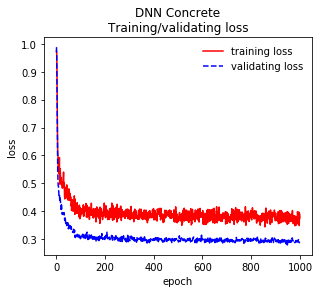

In [16]:
#----------------------------------------
# Summarize history for loss.

plt.figure('DNN Concrete loss', figsize = (4.8, 4.0))
plt.plot(history.history['loss'], "r-")
plt.plot(history.history['val_loss'], "b--")
plt.title('DNN Concrete' + '\n' + 'Training/validating loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validating loss'], loc = "best", frameon = False)
plt.show()


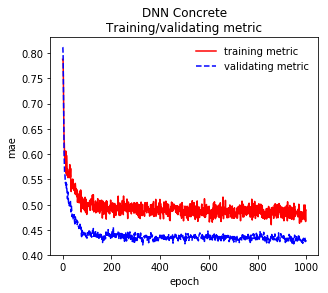

In [17]:
#----------------------------------------
# Summarize history for metric.

plt.figure('DNN Concrete metric', figsize = (4.8, 4.0))
plt.plot(history.history['mean_absolute_error'], "r-")
plt.plot(history.history['val_mean_absolute_error'], "b--")
plt.title('DNN Concrete' + '\n' + 'Training/validating metric')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['training metric', 'validating metric'], loc = "best", frameon = False)
plt.show()


In [18]:
#----------------------------------------
# Make prediction.

fitted = model.predict(X_train)
fitted = fitted[:, 0]

print(fitted.shape)
print(Y_train.shape)

# Plot

all = np.concatenate((Y_train, fitted))
draw_min = np.floor(np.min(all))
draw_max = np.ceil(np.max(all))


(1030,)
(1030,)


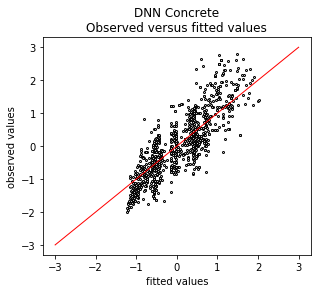

In [19]:
plt.figure('DNN Concrete', figsize = (4.8, 4.0))
plt.plot(fitted, Y_train, 'wo', markersize = 2, markeredgecolor = "black")
plt.plot([draw_min, draw_max], [draw_min, draw_max], '-', linewidth = 1, color = 'red')
plt.title('DNN Concrete' + '\n' + 'Observed versus fitted values')
plt.ylabel('observed values')
plt.xlabel('fitted values')
plt.show()
